In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
dataHP = pd.read_csv('train_HP.csv')
dataHP.shape

(1460, 81)

In [6]:
dataHP.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Tarea #1

In [7]:
'''Listado de columnas con NA datos'''

cols_con_na = [col for col in dataHP.columns if (dataHP[col].isnull().mean() > 0)]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [8]:
'''Total de columnas que poseen datos nulos'''

len(cols_con_na)

19

In [9]:
'''Tipo de datos con NA'''

dataHP[cols_con_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [10]:
'''
Tomando unicamente las columnas
que poseen nulos, hacemos un dataset
'''

dataset_tarea1 = dataHP.copy()
dataset_tarea1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [11]:
'''
Creamos una formula donde indentificamos los datos type'object'
e imputamos los datos con menos occurencias en los datos nulos
'''

def imputar_valores_nulos_object(dataset_tarea1):
  
    columnas_object = dataset_tarea1.select_dtypes(include=['object']).columns

    for columna in columnas_object:
        valor_menos_comun = dataset_tarea1[columna].value_counts().idxmin()
        dataset_tarea1[columna] = dataset_tarea1[columna].fillna(valor_menos_comun)

    return dataset_tarea1

In [12]:
dataHP_sin_nulos= imputar_valores_nulos_object(dataset_tarea1)
print(dataHP_sin_nulos)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  Pave      Reg   
1        2          20       RL         80.0     9600   Pave  Pave      Reg   
2        3          60       RL         68.0    11250   Pave  Pave      IR1   
3        4          70       RL         60.0     9550   Pave  Pave      IR1   
4        5          60       RL         84.0    14260   Pave  Pave      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave  Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave  Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave  Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave  Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave  Pave      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

### Comprobar si la funcional def imputar_valores_nulos_object

In [13]:
'''Cantidad de nulos en la columna MasVnrType'''
dataHP['MasVnrType'].isnull().sum()

8

In [14]:
'''Comprambamos como eran los datos antes de la imputacion de datos nulos'''
dataHP['MasVnrType'].value_counts().sort_values(ascending=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [15]:
'''Comprambamos como son los datos tras imputar los datos nulos utilizando el valor con menos datos'''
dataHP_sin_nulos['MasVnrType'].value_counts().sort_values(ascending=False)


None       864
BrkFace    445
Stone      128
BrkCmn      23
Name: MasVnrType, dtype: int64

### Conclusion: Existian 8 datos nulos de la columna MasVnrType. Estos fueron sustituidos por BrkCmn ya que este era el que poseia menos datos

### Imputacion de los valores Numericos 

In [16]:
'''
Creamos una formula donde indentificamos los datos type'float64'
e imputamos los datos con la media y mediana
'''

def imputar_valores_nulos_float(dataset_tarea1):
    # Obtener las columnas de tipo float64
    columnas_float = dataset_tarea1.select_dtypes(include=['float64']).columns

    # Calcular la media y mediana de las columnas float64
    medias = dataset_tarea1[columnas_float].mean()
    medianas = dataset_tarea1[columnas_float].median()

    # Imputar los valores nulos utilizando la media
    dataset_tarea1[columnas_float] = dataset_tarea1[columnas_float].fillna(medias)

    return dataset_tarea1

In [17]:
dataHP_sin_nulos2 = imputar_valores_nulos_float(dataHP_sin_nulos)
print(dataHP_sin_nulos2)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  Pave      Reg   
1        2          20       RL         80.0     9600   Pave  Pave      Reg   
2        3          60       RL         68.0    11250   Pave  Pave      IR1   
3        4          70       RL         60.0     9550   Pave  Pave      IR1   
4        5          60       RL         84.0    14260   Pave  Pave      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave  Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave  Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave  Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave  Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave  Pave      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

### Comprobar si funciona def imputar_valores_nulos_float

In [18]:
'''Cantidad de nulos en la columna GarageYrBlt'''
dataHP['GarageYrBlt'].isnull().sum()

81

In [19]:
'''Cantidad de nulos en la columna GarageYrBlt'''
dataHP_sin_nulos2['GarageYrBlt'].isnull().sum()

0

### Conclusion: Existian 81 datos nulos de la columna GarageYrBlt. Estos fueron sustituidos por la media y mediana y ahorra hay 0 nulos

# Converir las columnas de categoria('object') a tipo numerico

In [20]:
'''
De nuestro ultimo dataframe dataHP_sin_nulos2 (el cual ya no poseee nulos) tomamos las columnas type object.
Creamos un nuevo dataframe (tabla) el cual contendra el dato original de la tabla y su equivalencia a numerico. 
El dato numerico es igual al value_counts() del dato original
'''
def convertir_columnas_object_a_numerico(dataHP_sin_nulos2):
  
    columnas_object = dataHP_sin_nulos2.select_dtypes(include=['object']).columns

    tabla = pd.DataFrame(columns=['Dato_Object', 'Dato_Numerico'])

    for columna in columnas_object:
        frecuencia_mapper = dataHP_sin_nulos2[columna].value_counts().reset_index()
        frecuencia_mapper.columns = ['Dato_Object', 'Dato_Numerico']
        tabla = pd.concat([tabla, frecuencia_mapper])

    return tabla

In [21]:
tabla_conversion = convertir_columnas_object_a_numerico(dataHP_sin_nulos2)
print(tabla_conversion)

   Dato_Object Dato_Numerico
0           RL          1151
1           RM           218
2           FV            65
3           RH            16
4      C (all)            10
..         ...           ...
1      Partial           125
2      Abnorml           101
3       Family            20
4       Alloca            12
5      AdjLand             4

[252 rows x 2 columns]


# Tareas #2

## Se crea una copia del dataframe de la tarea anterior

In [22]:
df_tarea2 = dataHP_sin_nulos2.copy()
df_tarea2.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Pave      Reg   
1   2          20       RL         80.0     9600   Pave  Pave      Reg   
2   3          60       RL         68.0    11250   Pave  Pave      IR1   
3   4          70       RL         60.0     9550   Pave  Pave      IR1   
4   5          60       RL         84.0    14260   Pave  Pave      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     Ex  MnWw        TenC       0      2   
1         Lvl    AllPub  ...        0     Ex  MnWw        TenC       0      5   
2         Lvl    AllPub  ...        0     Ex  MnWw        TenC       0      9   
3         Lvl    AllPub  ...        0     Ex  MnWw        TenC       0      2   
4         Lvl    AllPub  ...        0     Ex  MnWw        TenC       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Se separan las columnas por categorias

In [23]:
def getColumnTypes(dataset):
    '''Descripcion: Esta funcion extrae el tipo de dominio de las columnas de un dataset 
    Entrada: Pandas Dataframe
    Salida: Tupla con arreglo que contiene nimbres de las columnas'''

    continuas = []
    discretas = []
    categoricas = []
    for col in dataHP.columns:
        if((dataset[col].dtype == 'int64') or(dataset[col].dtype =='float64')):
            if(len(dataset[col].unique())>30):
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)
    return continuas, discretas, categoricas

In [24]:
continuas, discretas, categoticas = getColumnTypes(df_tarea2)
print(continuas)
print(discretas)
print(categoticas) 

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gar

In [25]:
import scipy.stats as stats
import seaborn as sns

### (Funcion vista en clase) nos ayuda a generar un 3 graficas diferentes para ver como se comportan los datos

In [26]:
def plotDistBoxQQ(dataset, col):
    '''
    Descipcion: Muestra las graficas de Distribuicion, Boxplot y QQ-Plot para detectar Outliers
    input: dataset -> pandas dataframe, col -> string con nombres de columnas
    putput: Visualizacion de plots
    '''
    
    plt.figure(figsize = (20,6))

    plt.subplot(1,3,1)
    sns.distplot(dataset[col], bins =30)
    plt.title("Histograma y Densidad")

    plt.subplot(1,3,2)
    sns.boxplot(y=dataset[col])
    plt.title("Boxplot")

    plt.subplot(1,3,3)
    stats.probplot(dataset[col], dist='norm', plot=plt)
    plt.title("Q-Q Plot")

### Crear graficas para todas las columnas continuas antes de cualquier cambio a los limites o capping de datos

-----------Id------------
-----------LotFrontage------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------LotArea------------
-----------YearBuilt------------
-----------YearRemodAdd------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

-----------MasVnrArea------------
-----------BsmtFinSF1------------
-----------BsmtFinSF2------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

-----------BsmtUnfSF------------
-----------TotalBsmtSF------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

-----------1stFlrSF------------
-----------2ndFlrSF------------
-----------GrLivArea------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

-----------GarageYrBlt------------
-----------GarageArea------------
-----------WoodDeckSF------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

-----------OpenPorchSF------------
-----------EnclosedPorch------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------ScreenPorch------------
-----------SalePrice------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


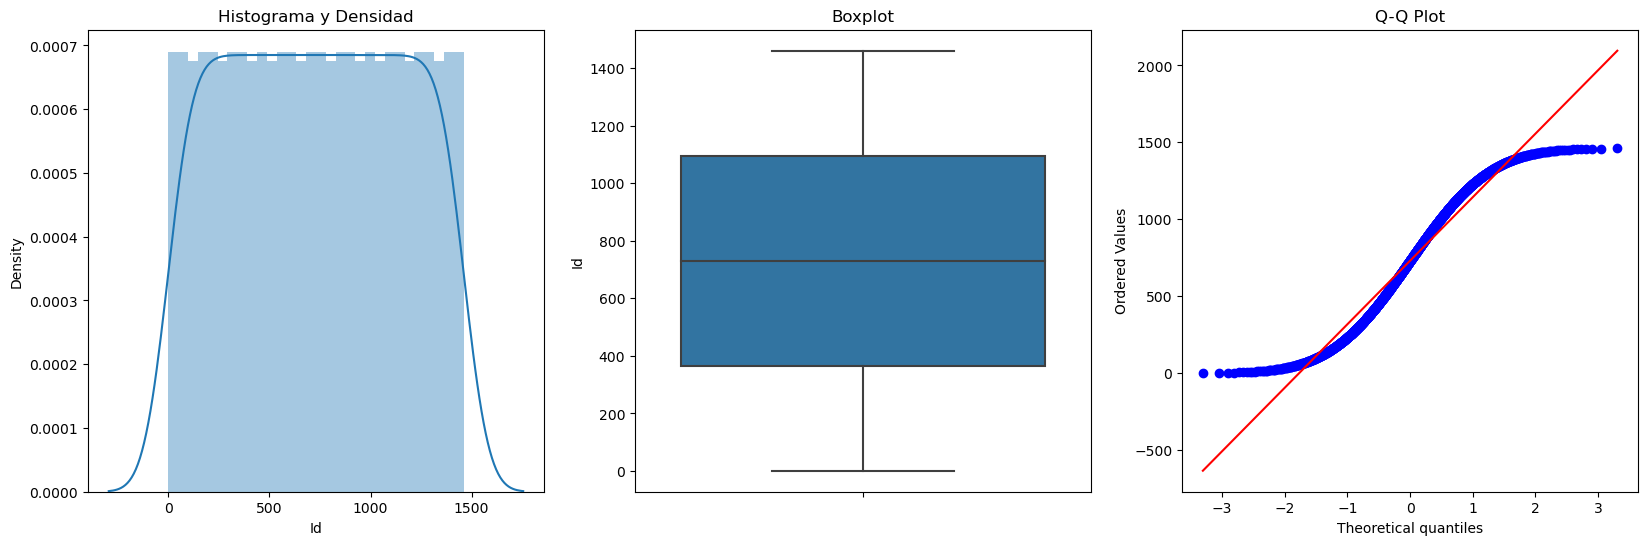

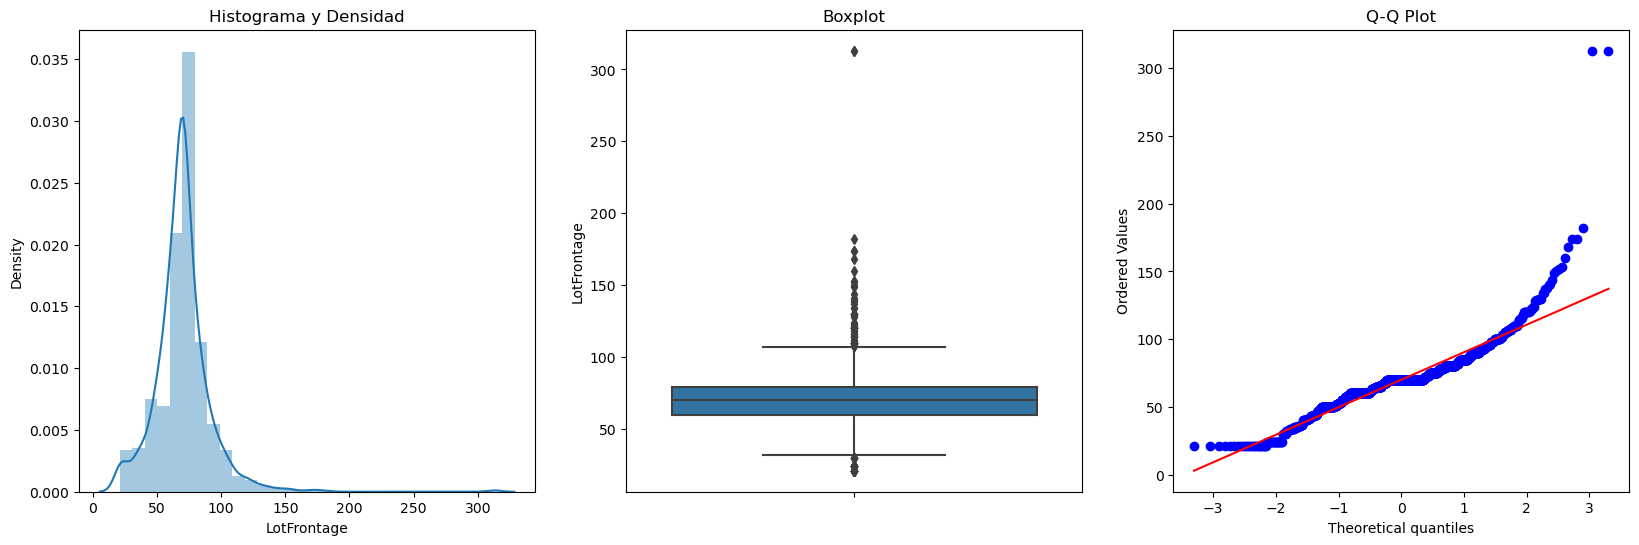

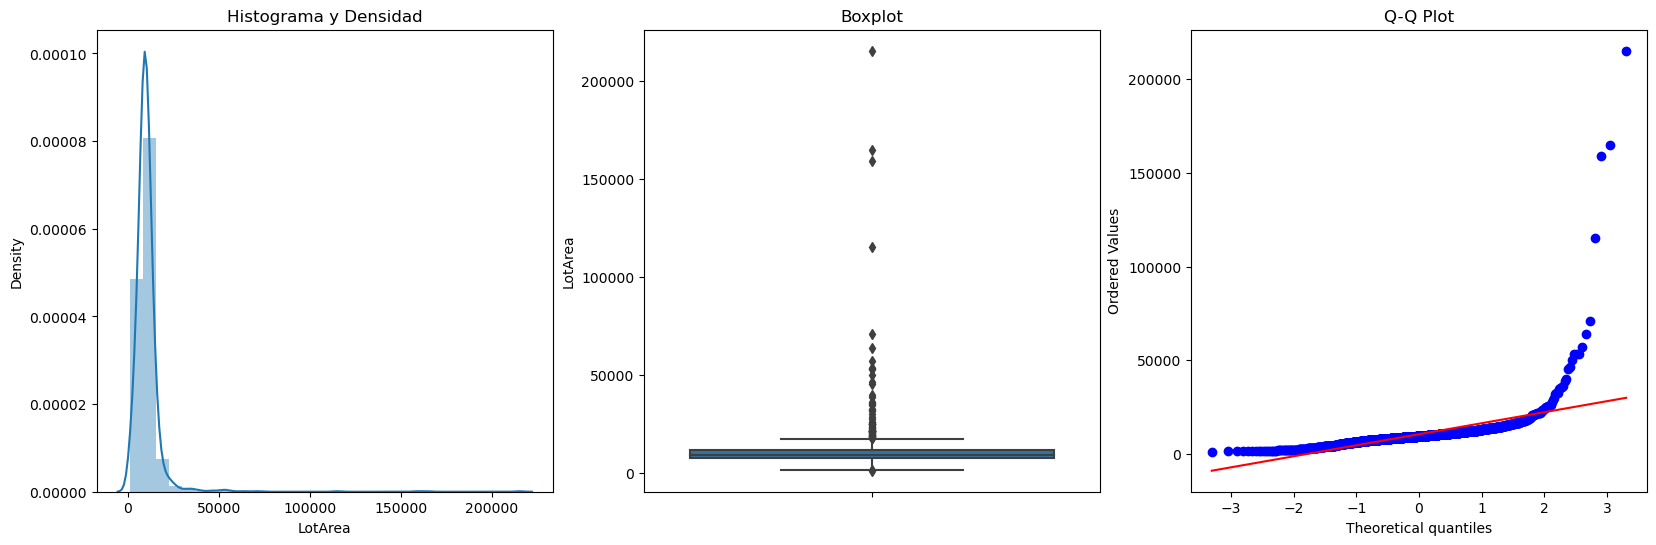

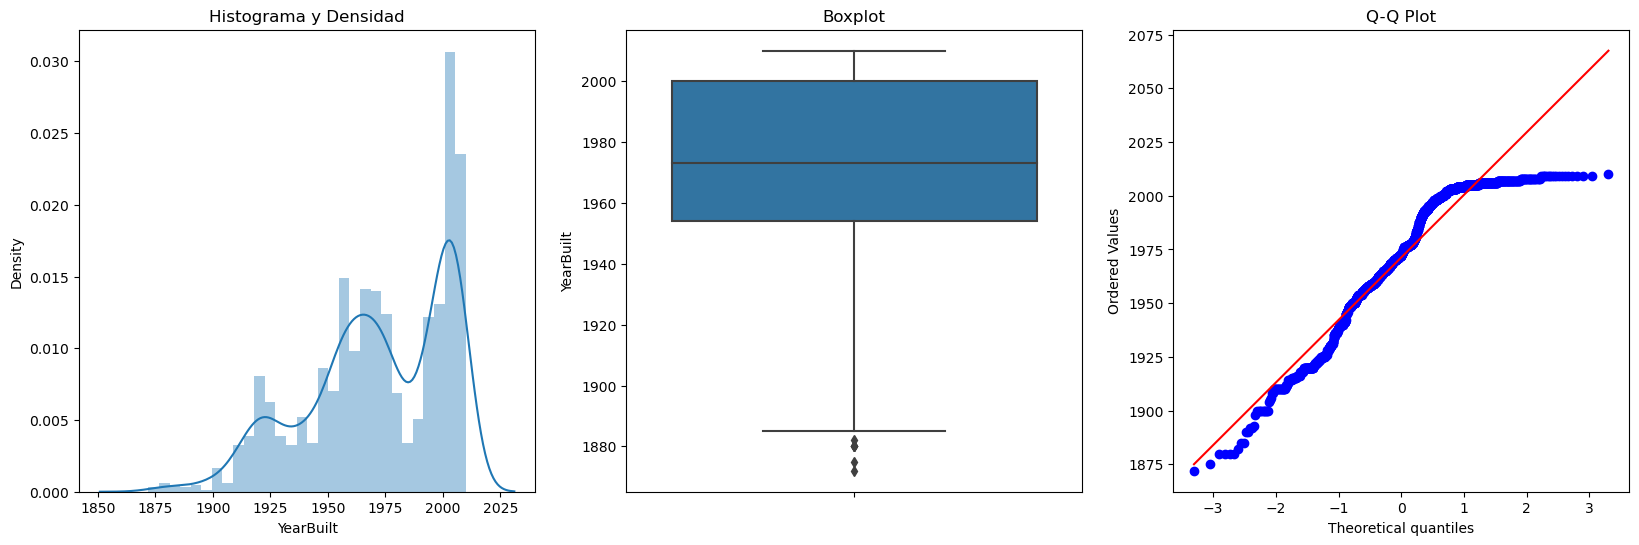

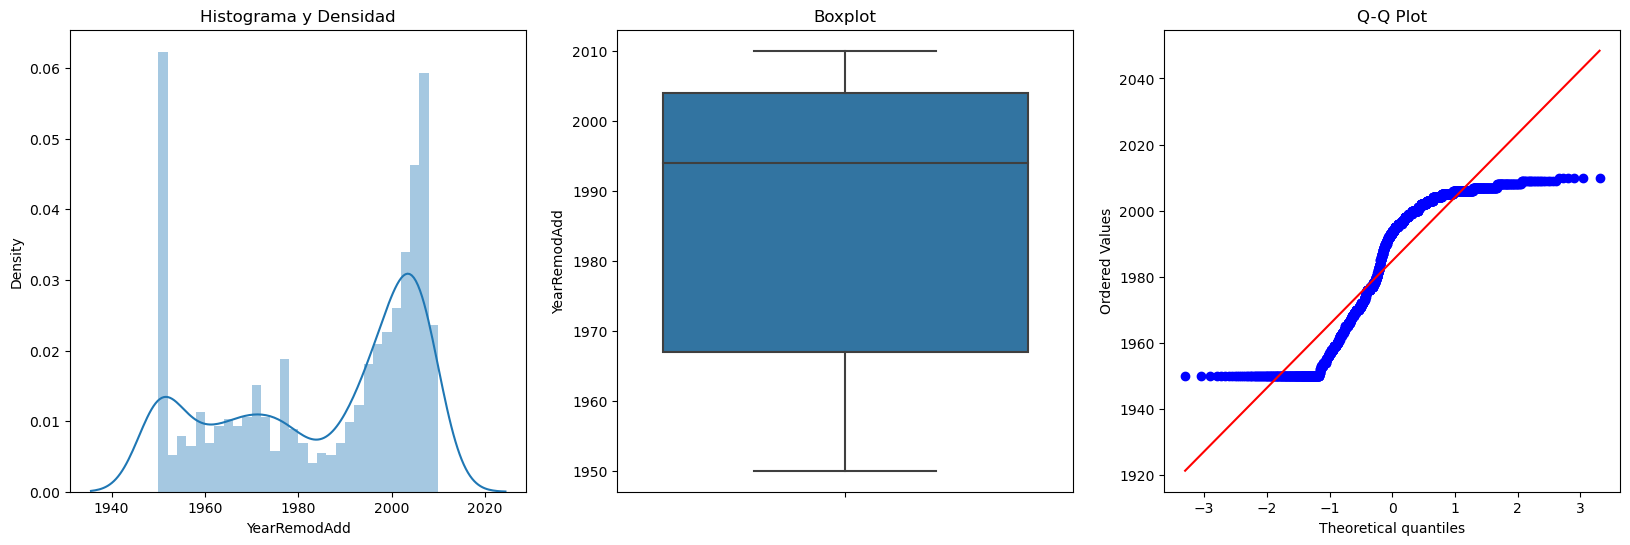

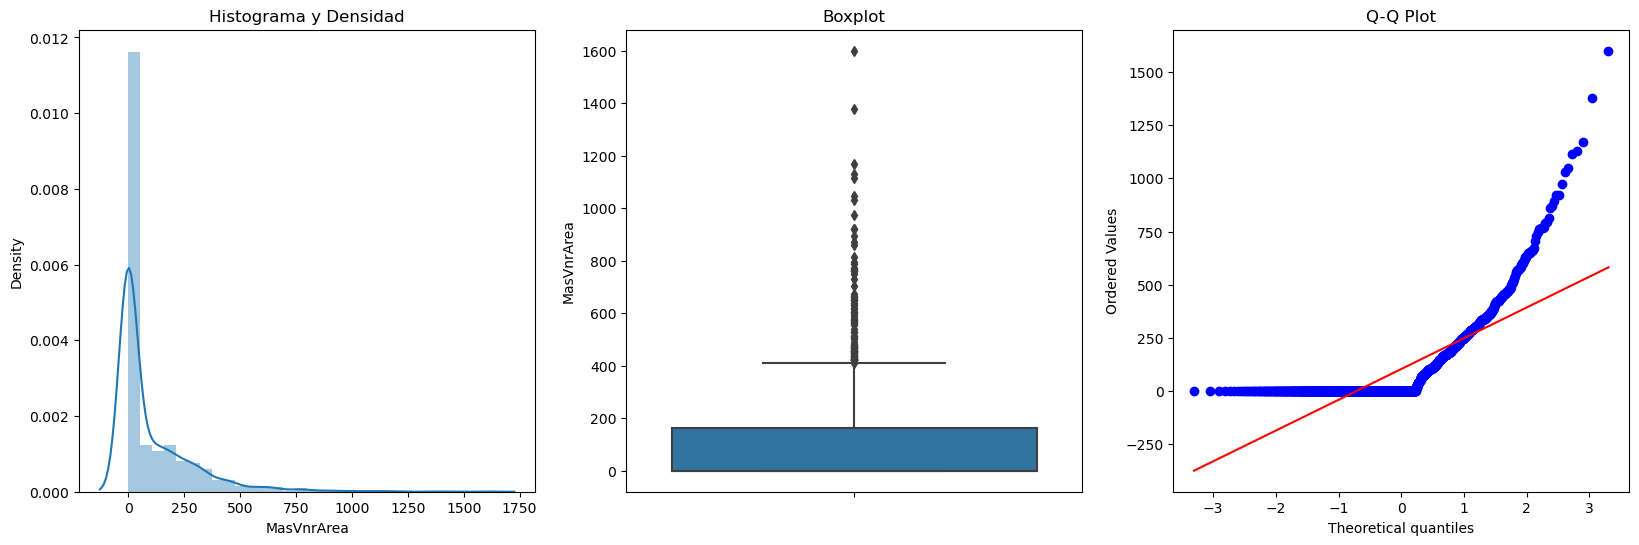

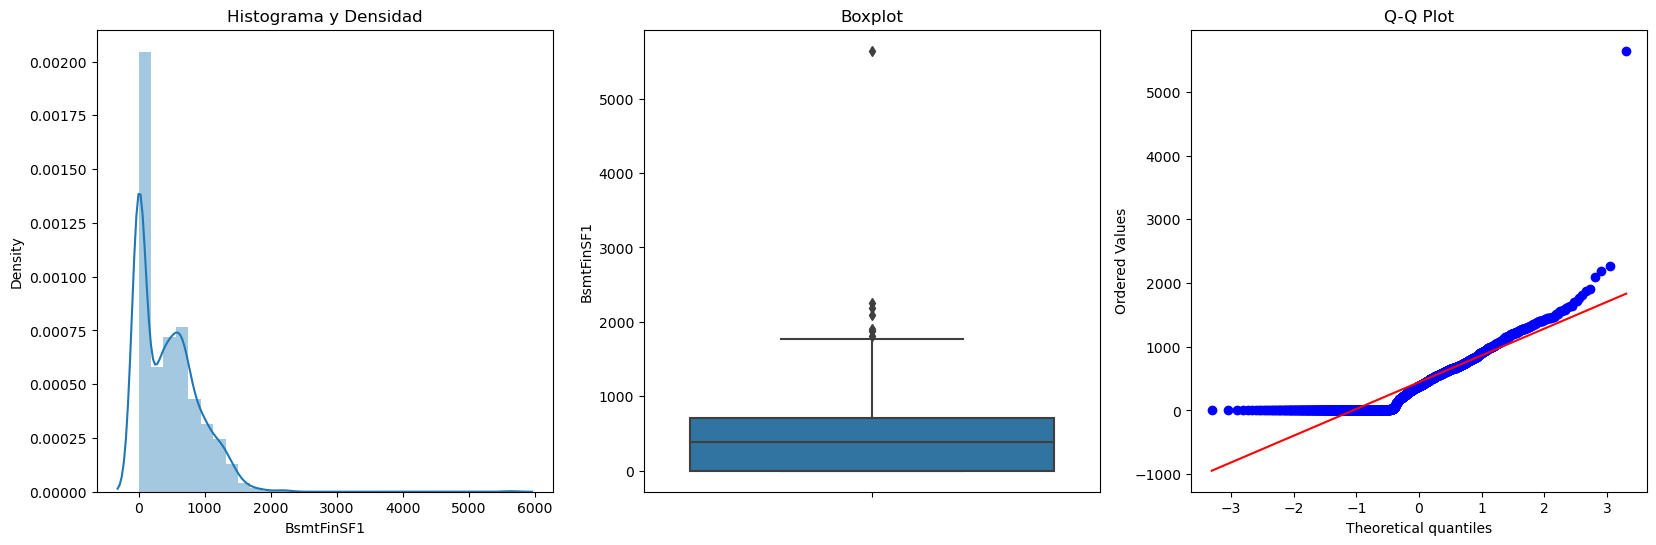

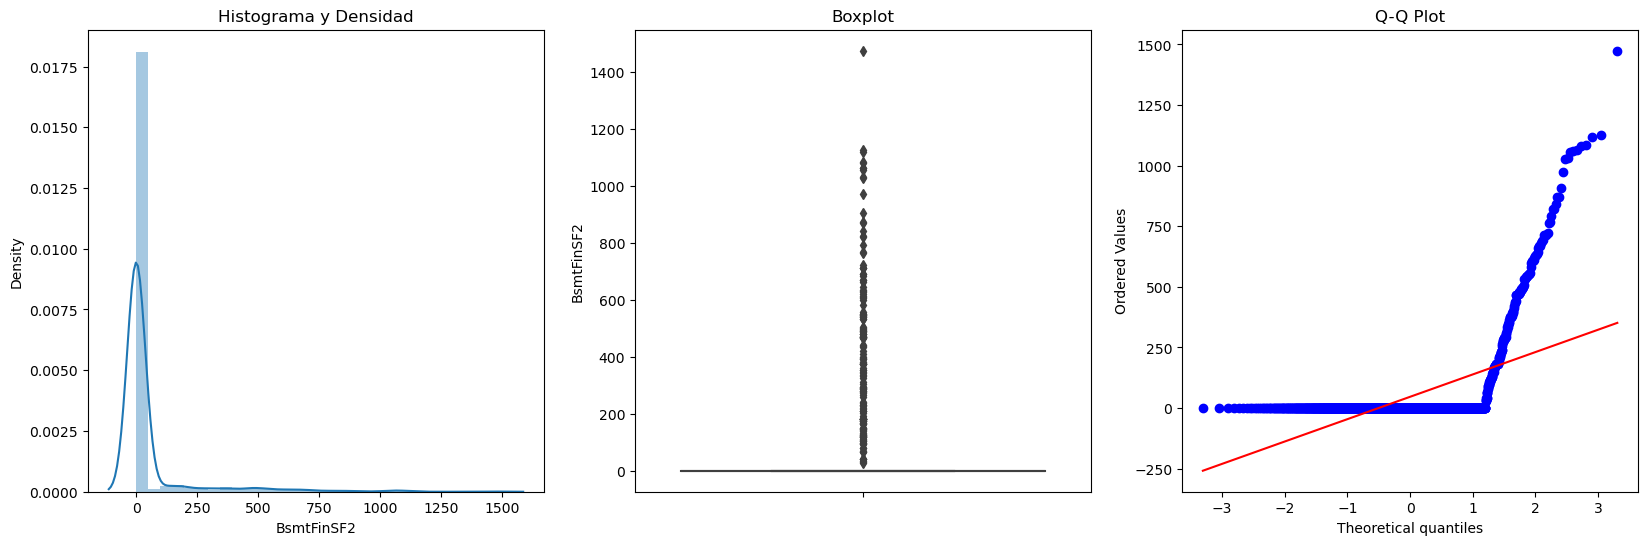

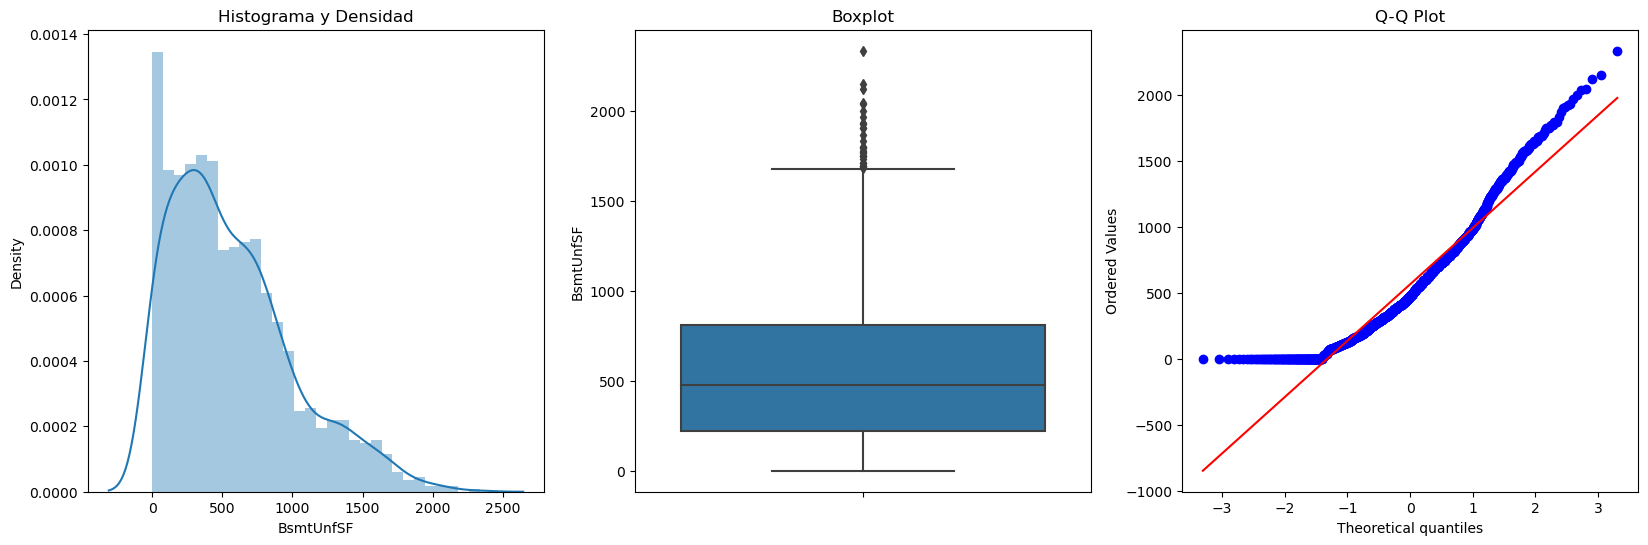

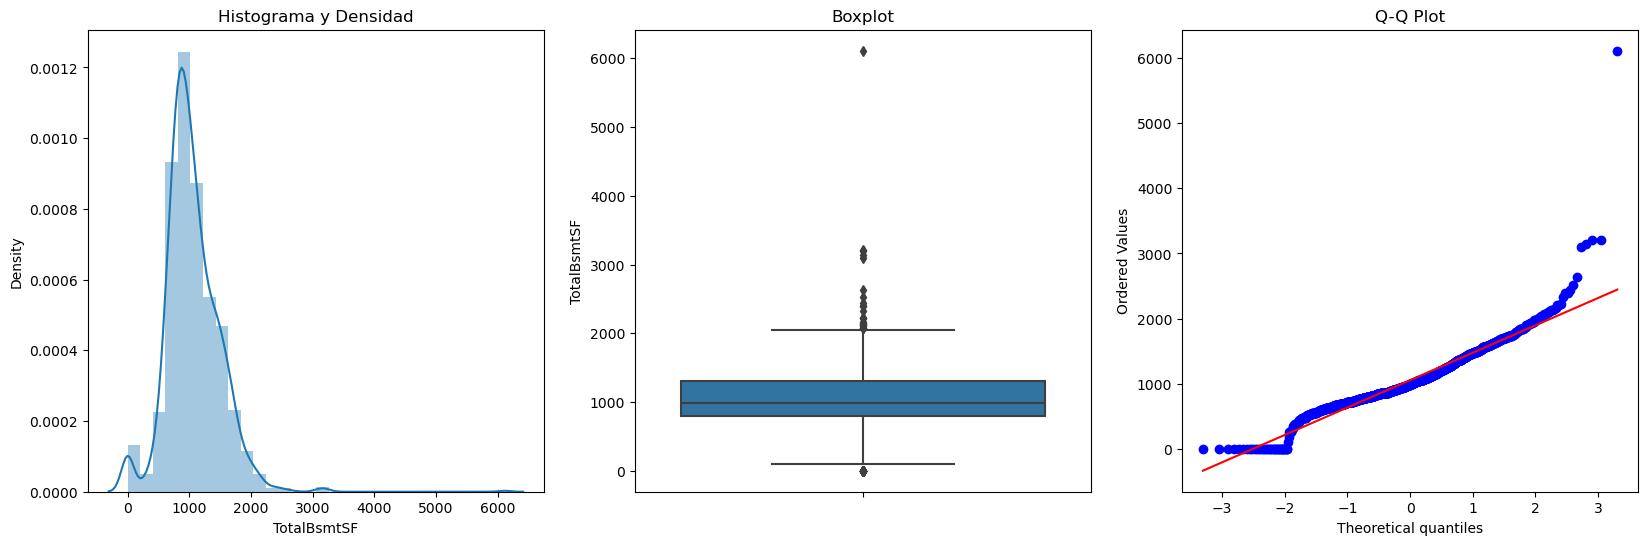

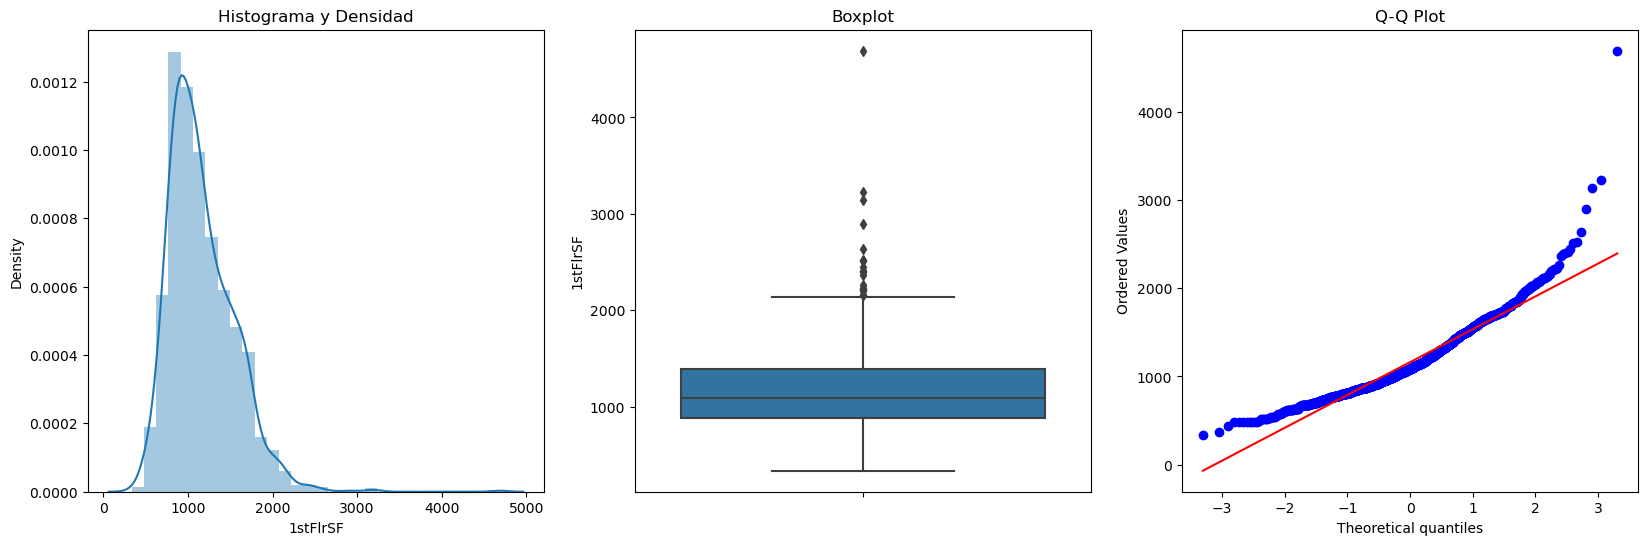

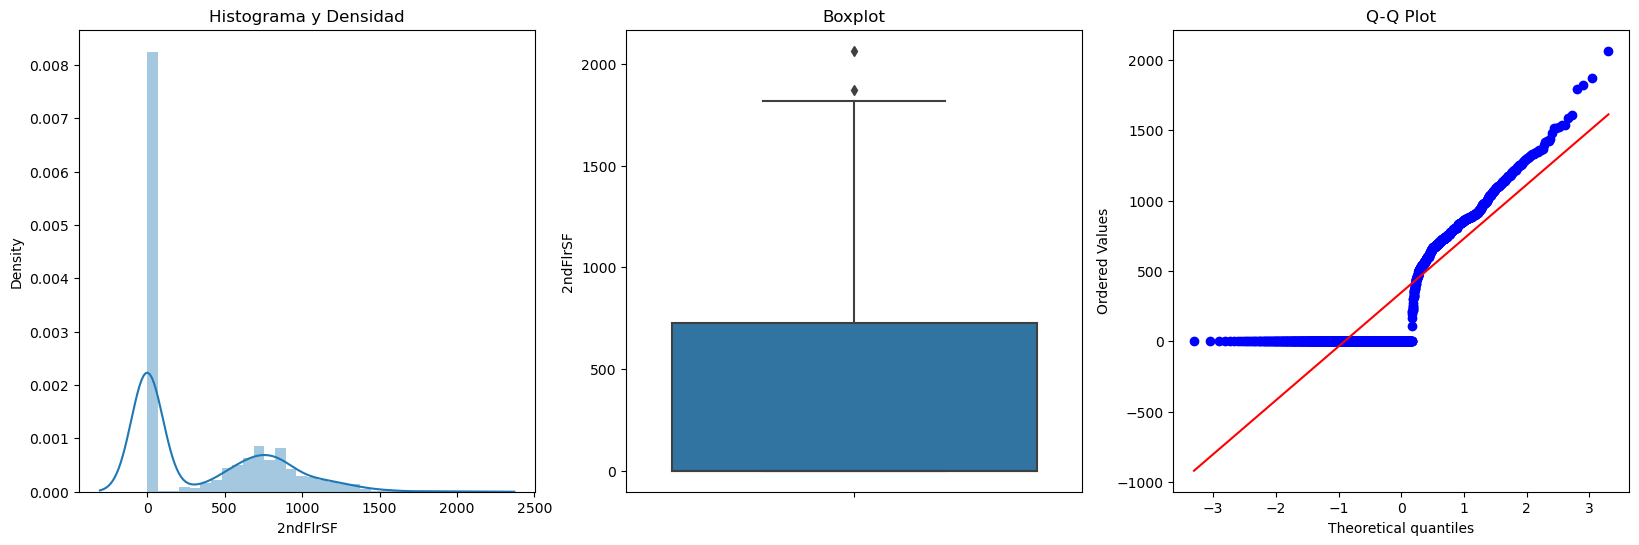

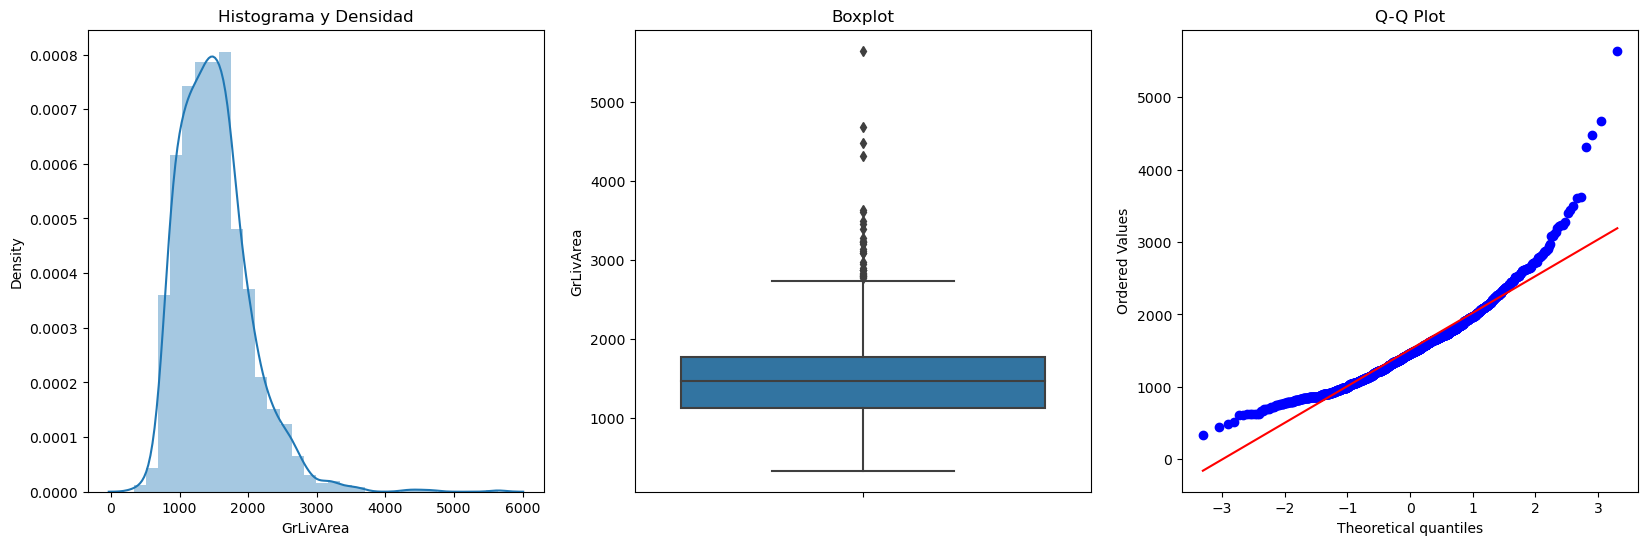

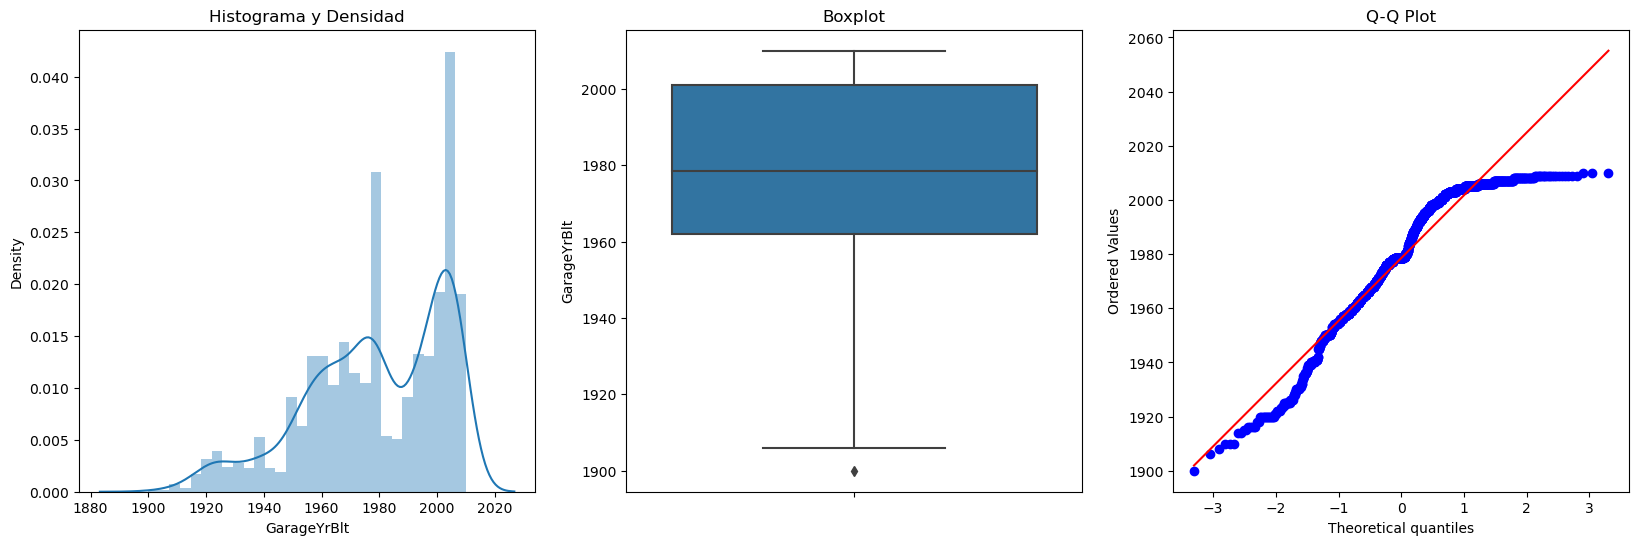

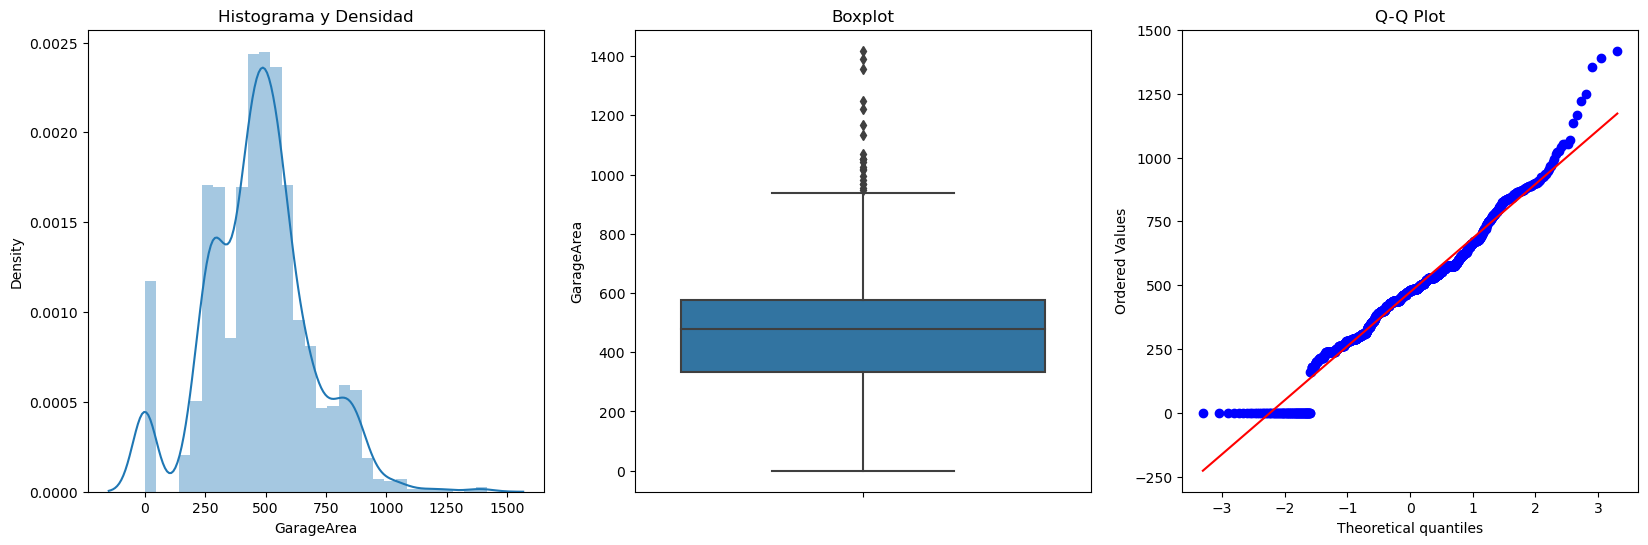

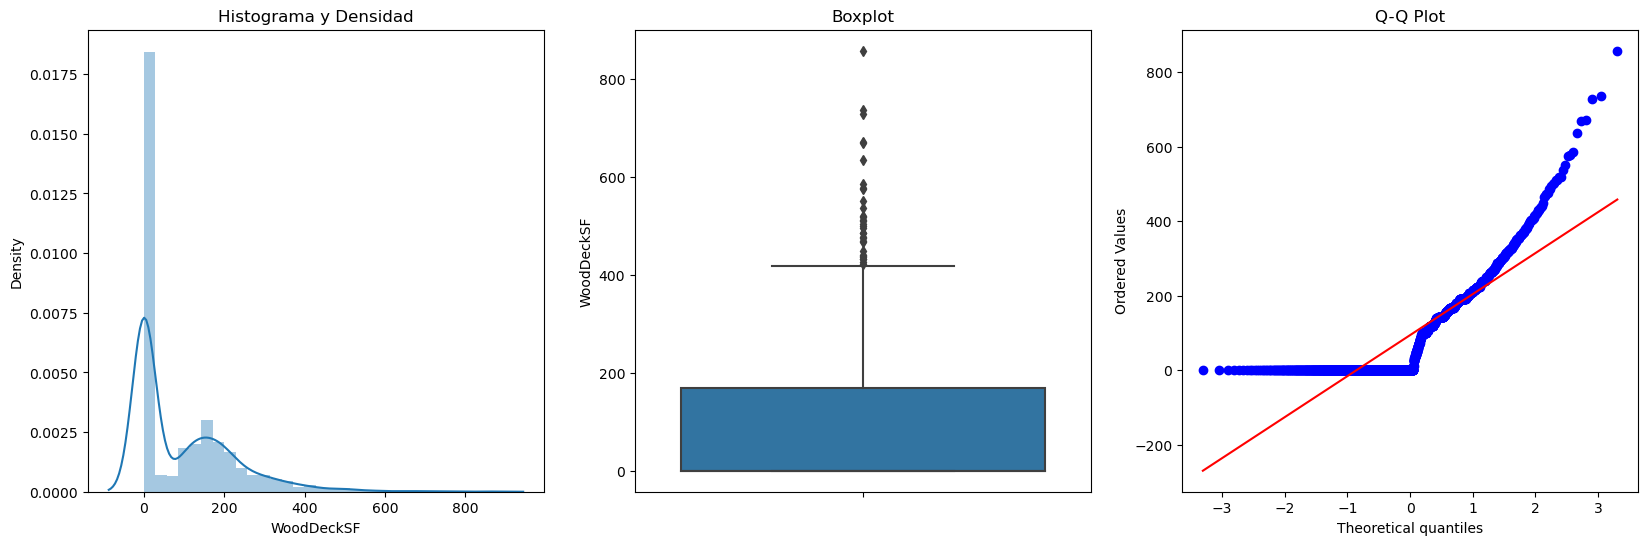

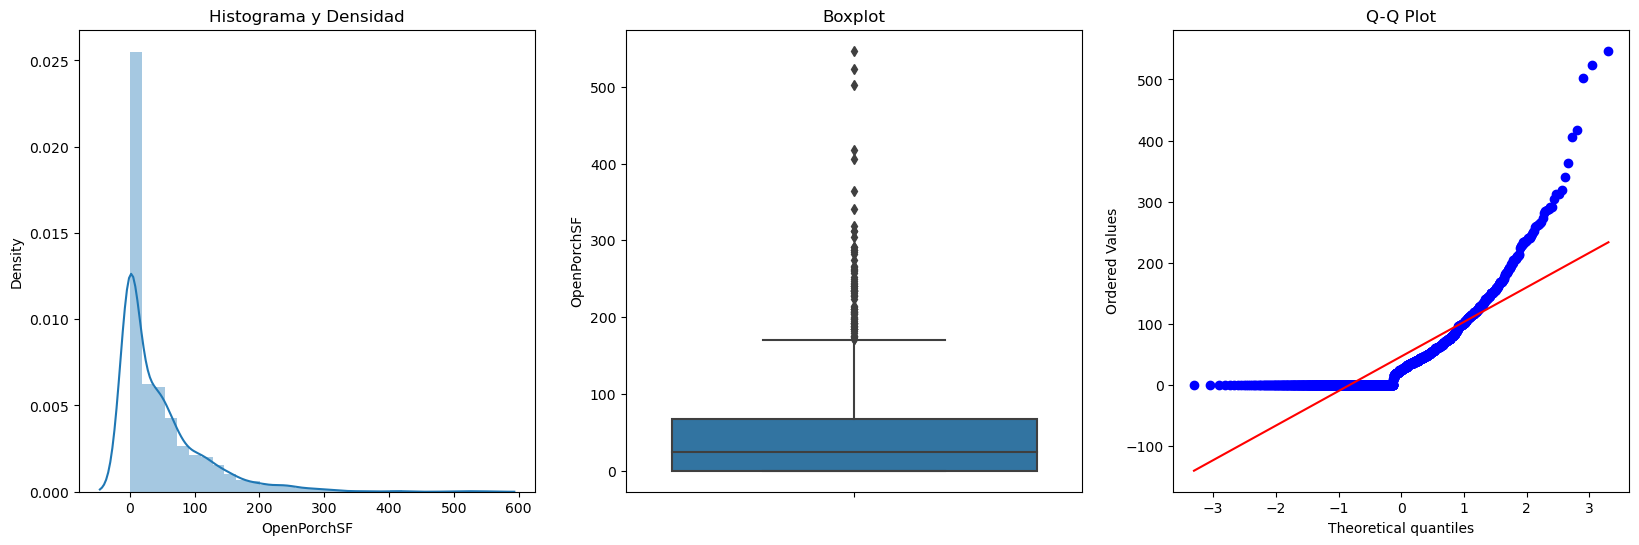

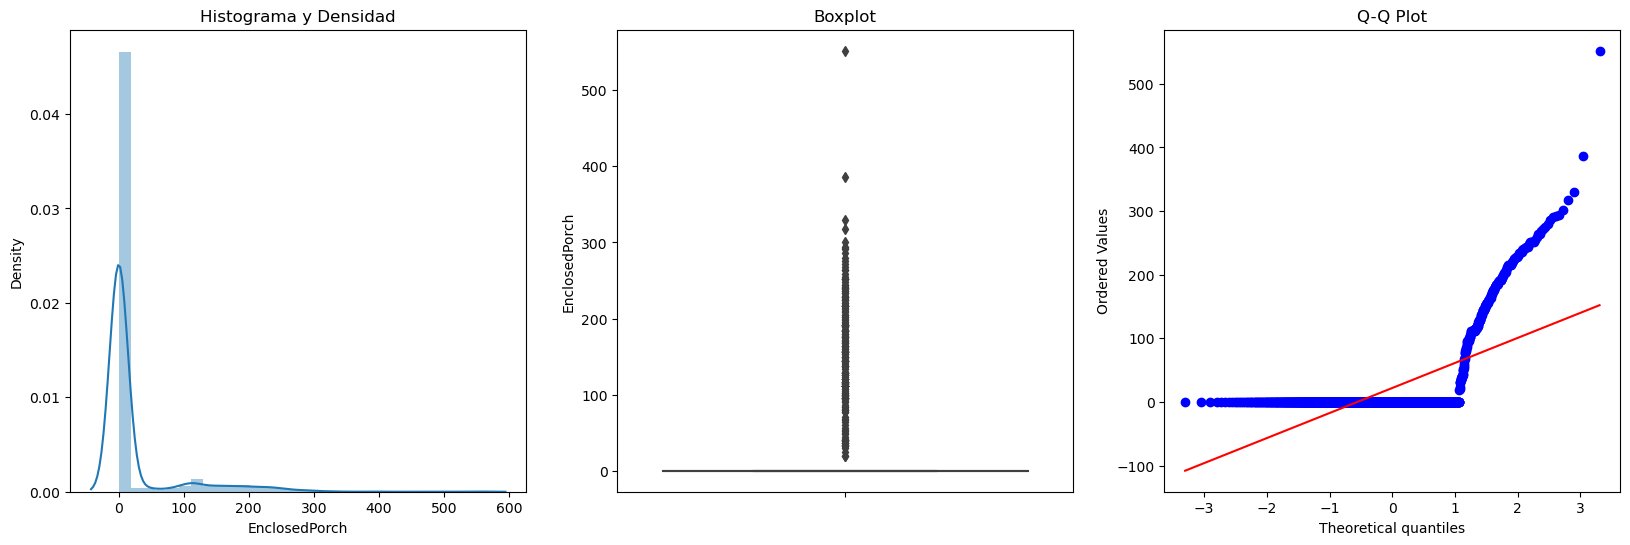

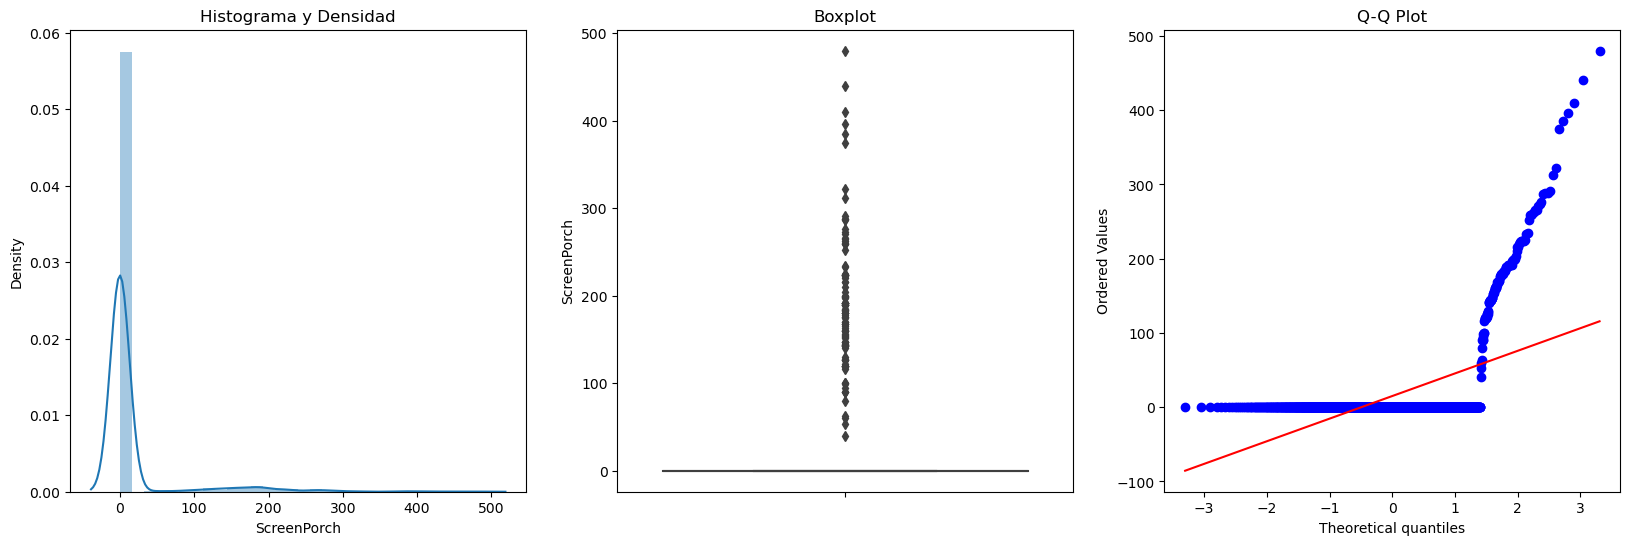

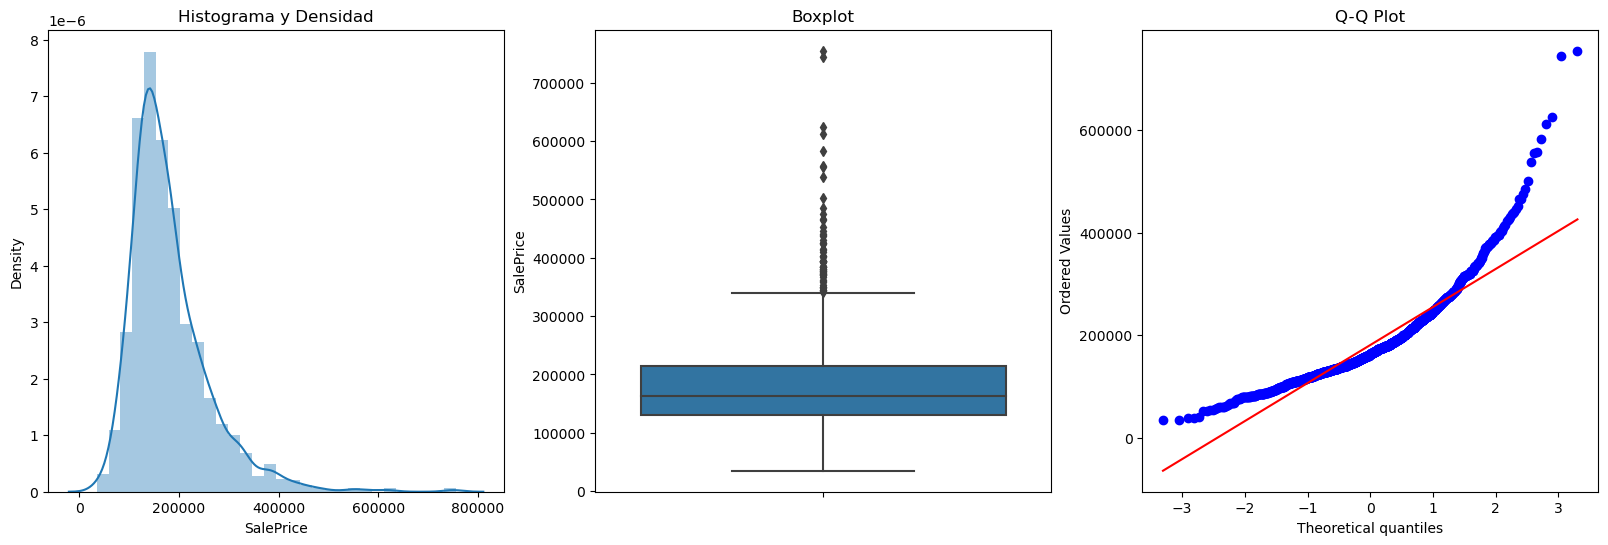

In [27]:
for col in continuas:
    print(f"-----------{col}------------")
    plotDistBoxQQ(df_tarea2, col) 

### Crear graficas para todas las columnas discretas antes de cualquier cambio a los limites o capping de datos

-----------MSSubClass------------
-----------OverallQual------------
-----------OverallCond------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

-----------LowQualFinSF------------
-----------BsmtFullBath------------
-----------BsmtHalfBath------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

-----------FullBath------------
-----------HalfBath------------
-----------BedroomAbvGr------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

-----------KitchenAbvGr------------
-----------TotRmsAbvGrd------------
-----------Fireplaces------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

-----------GarageCars------------
-----------3SsnPorch------------
-----------PoolArea------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

-----------MiscVal------------
-----------MoSold------------
-----------YrSold------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

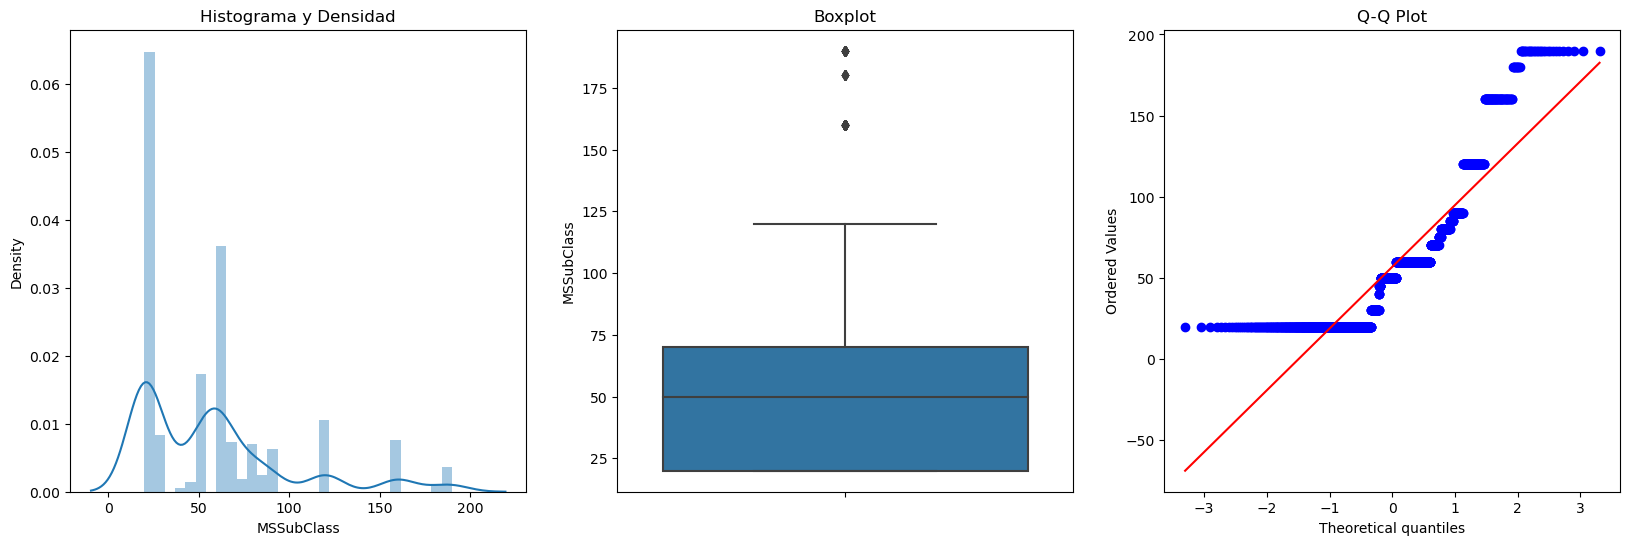

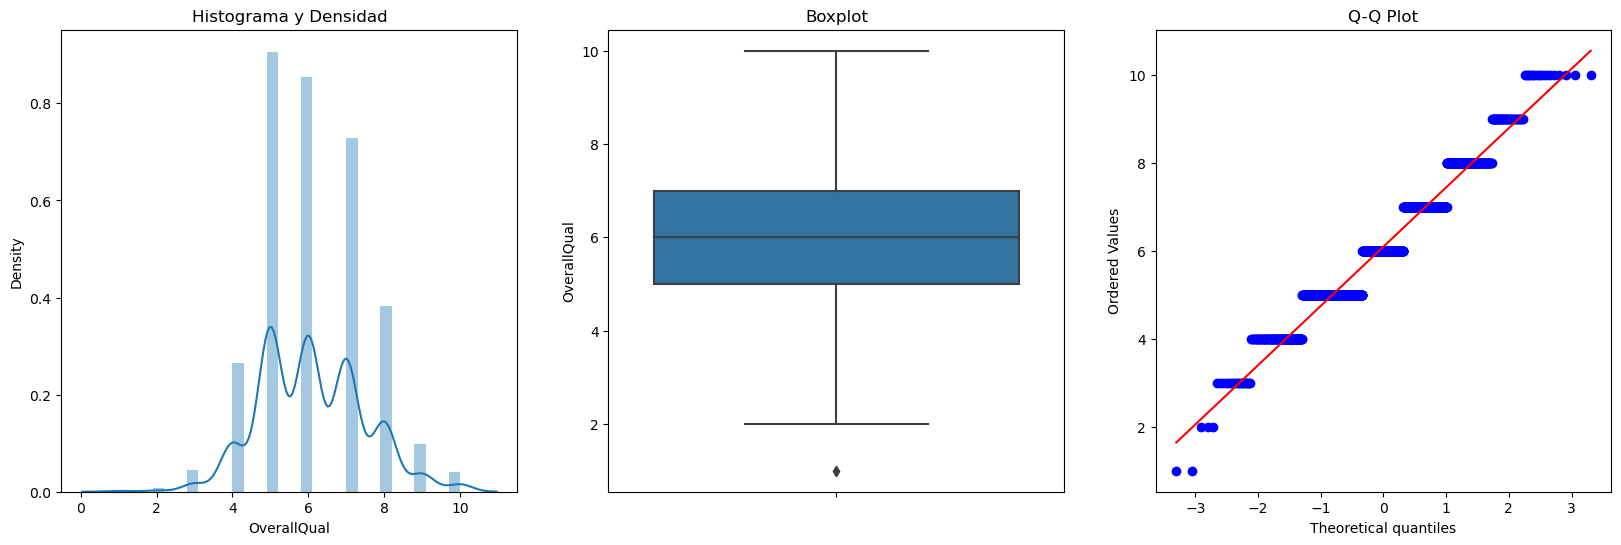

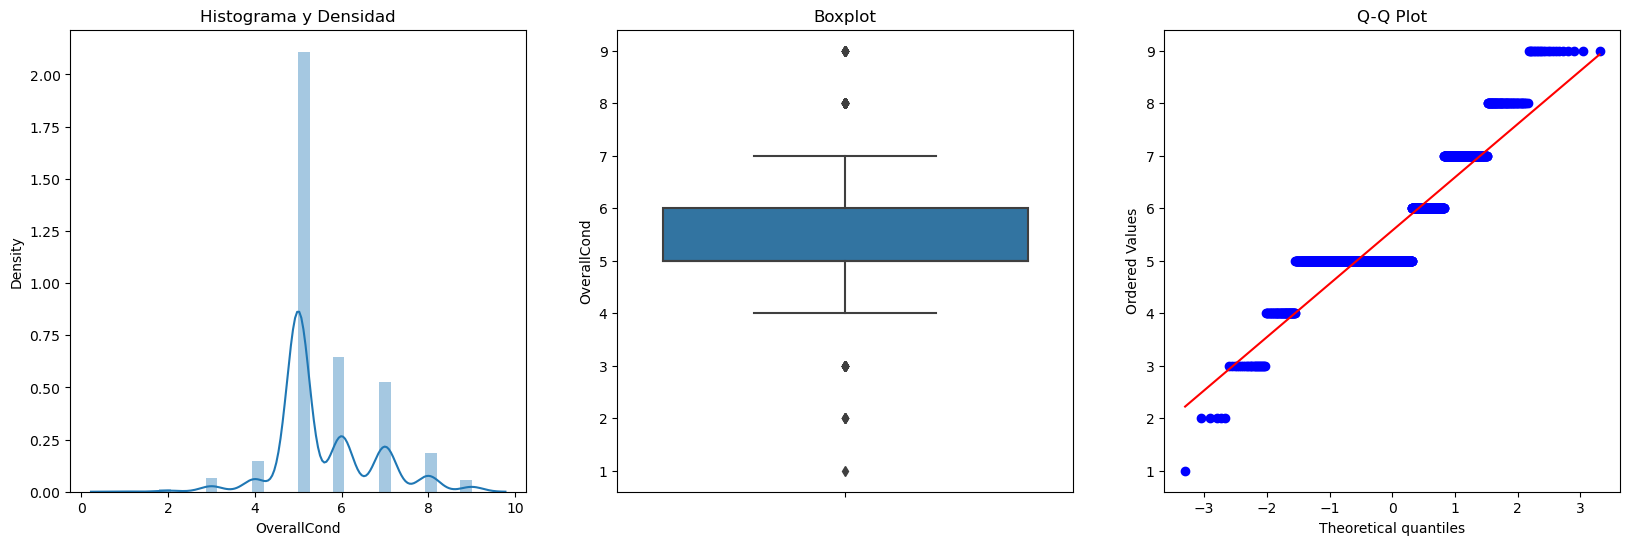

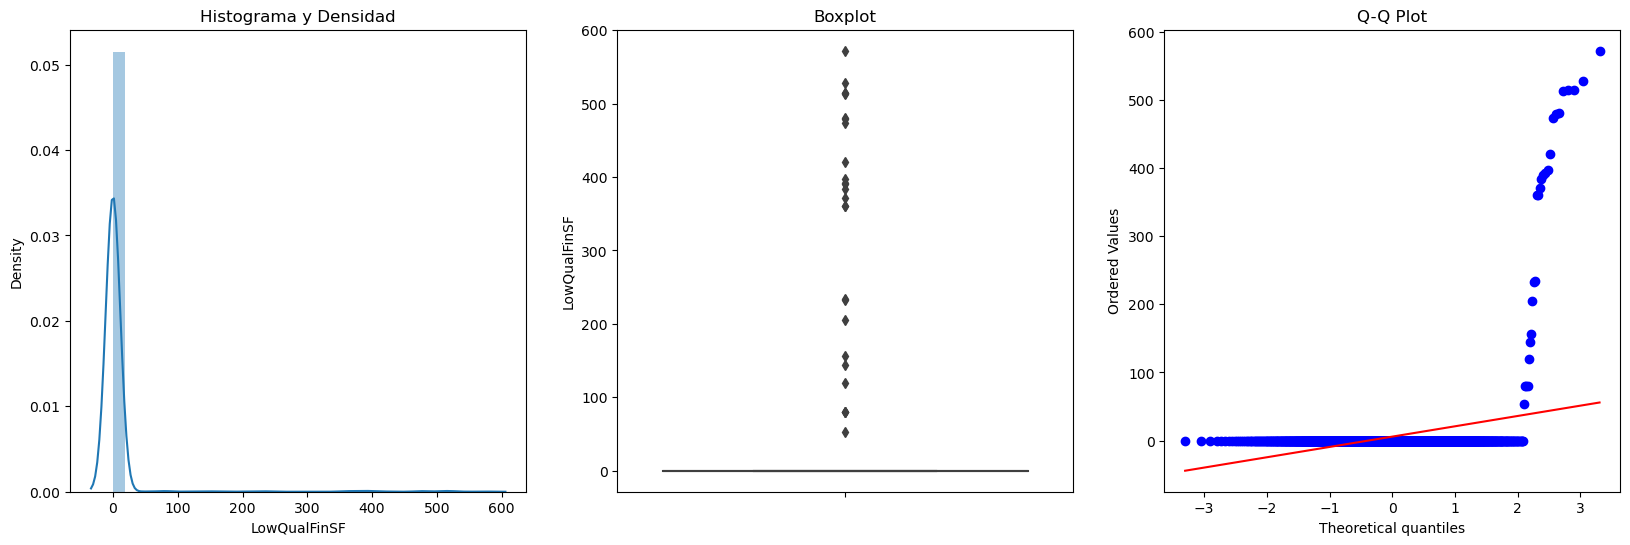

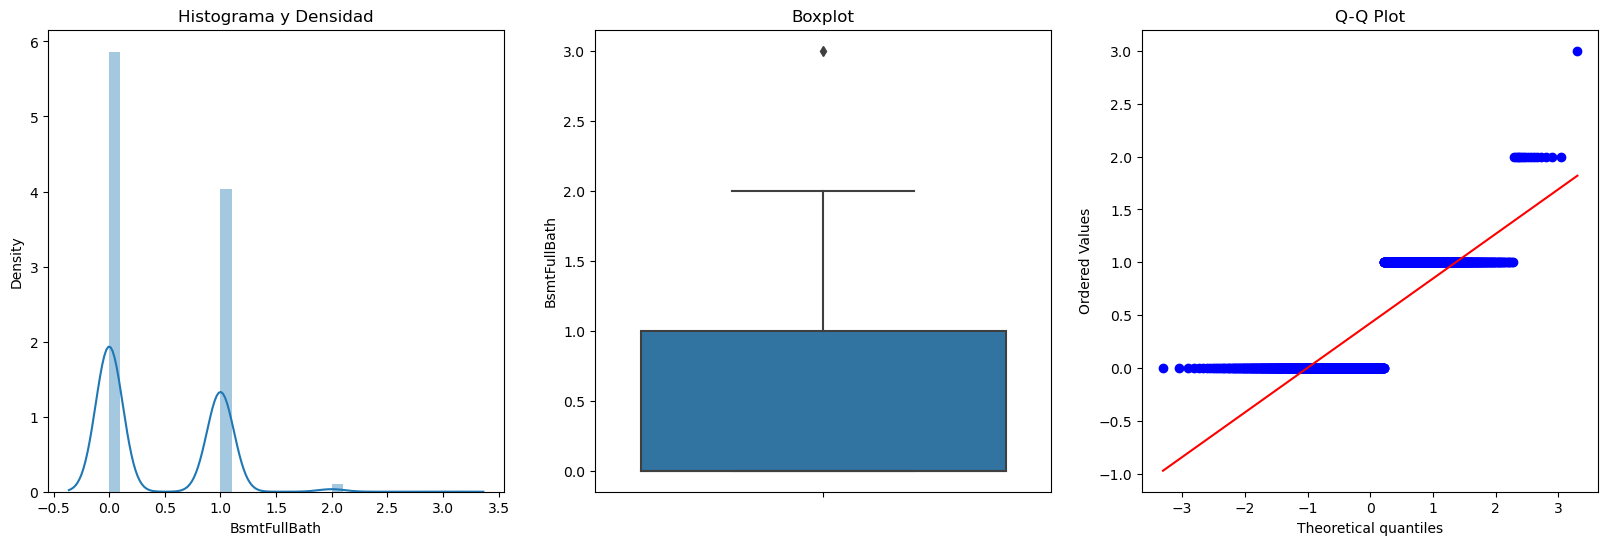

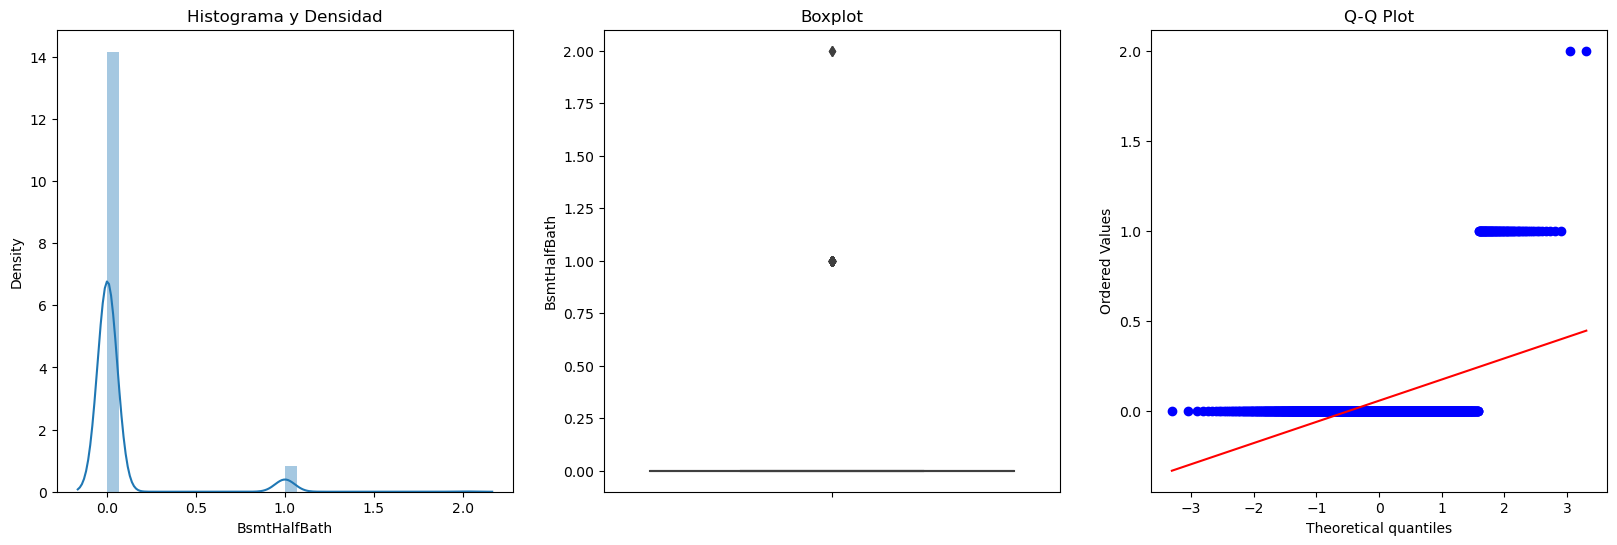

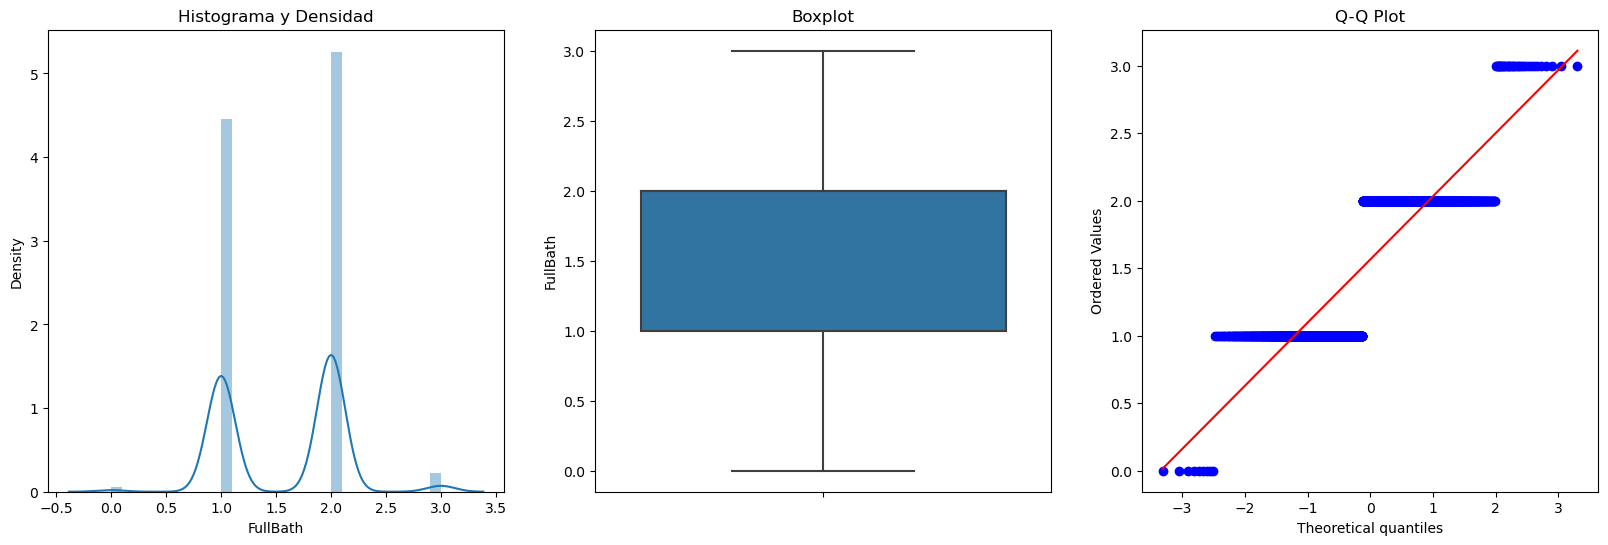

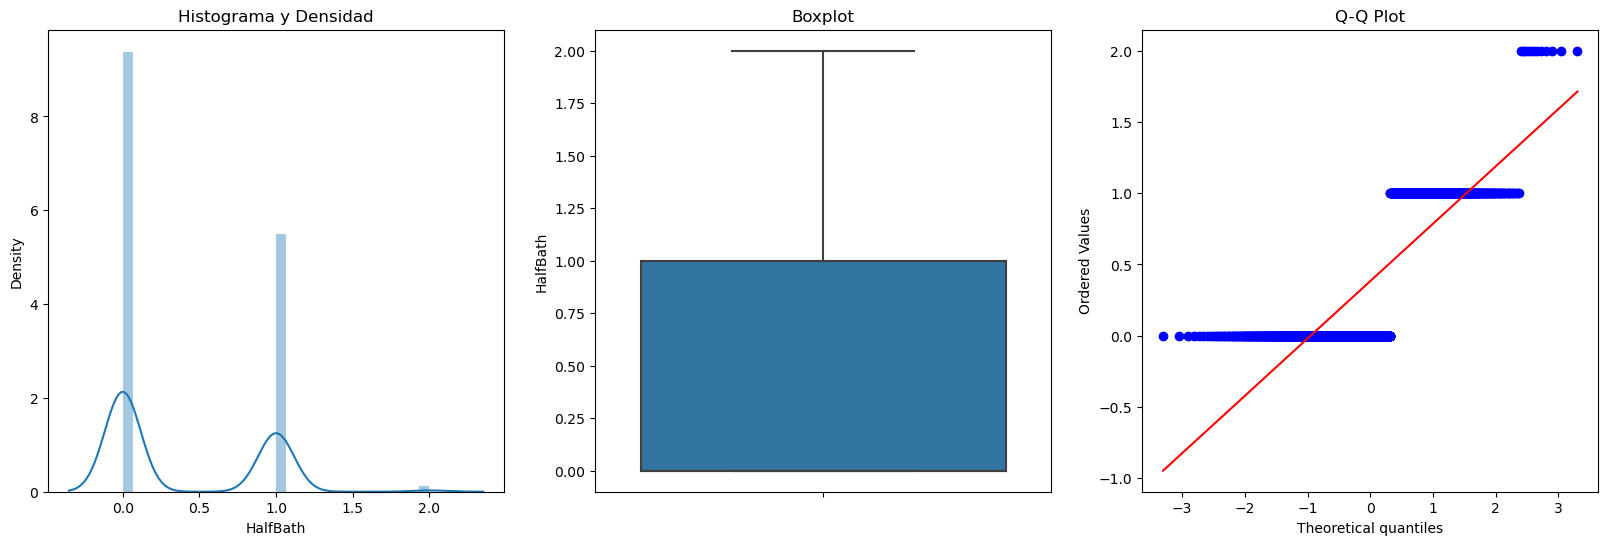

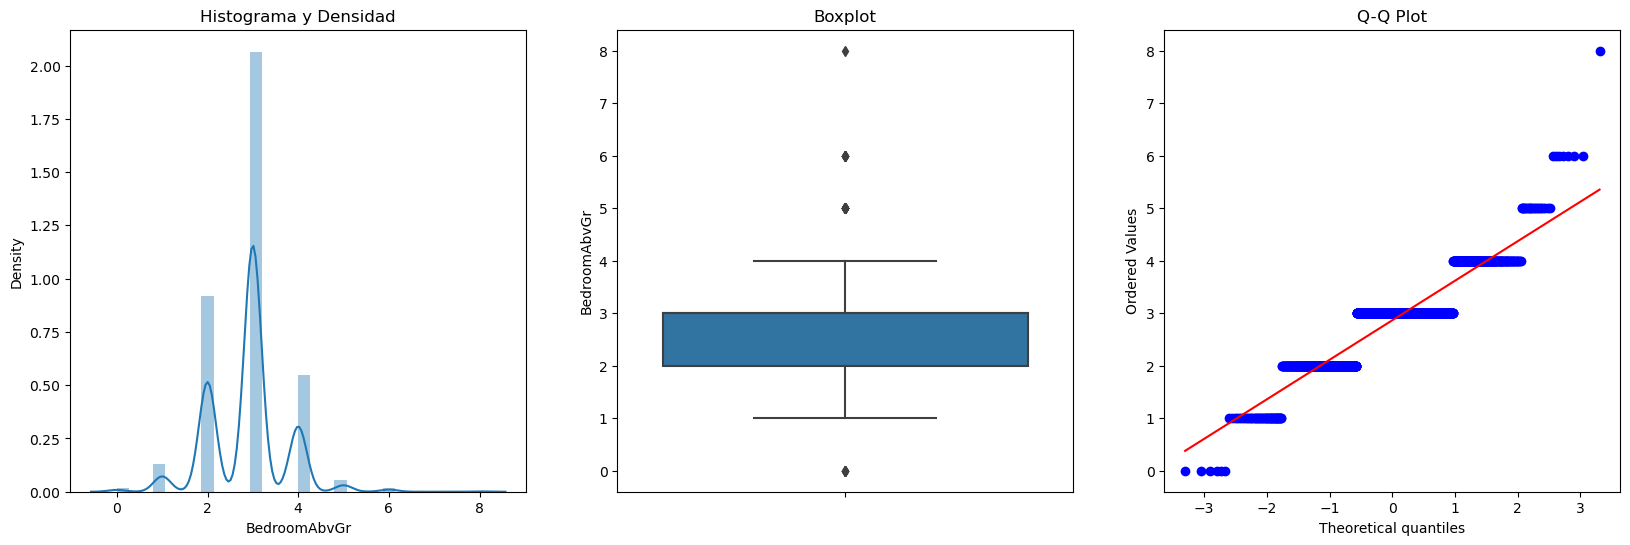

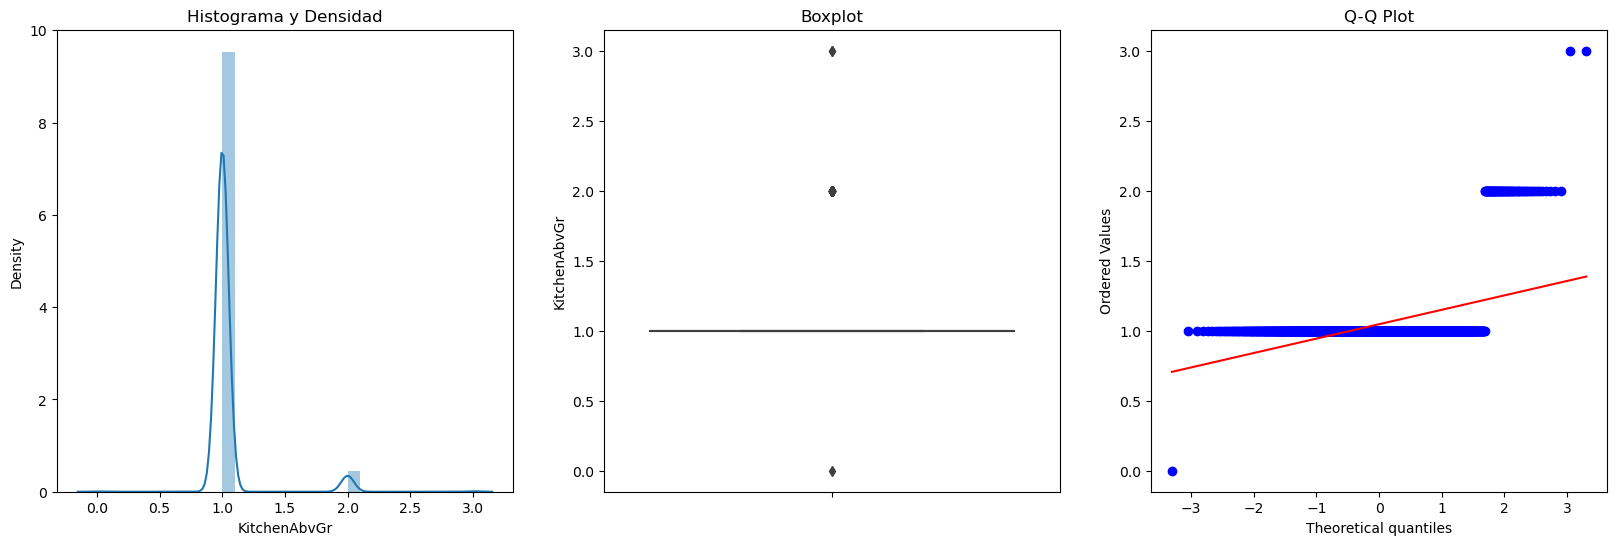

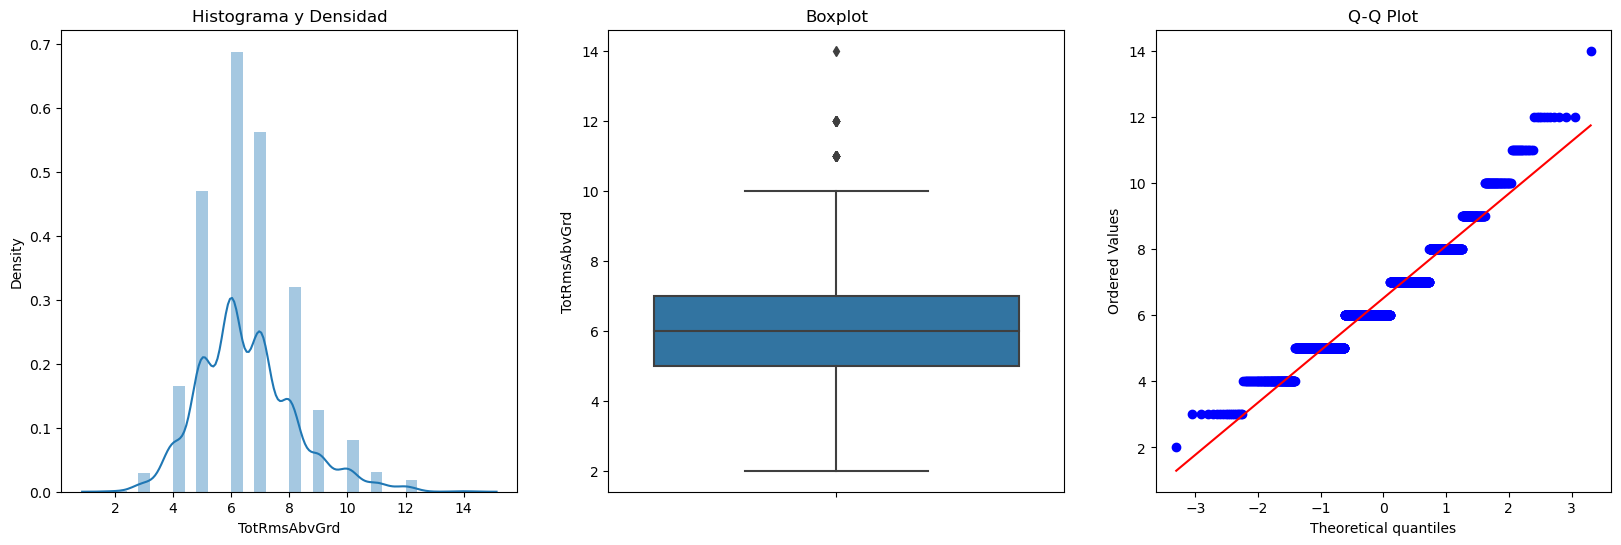

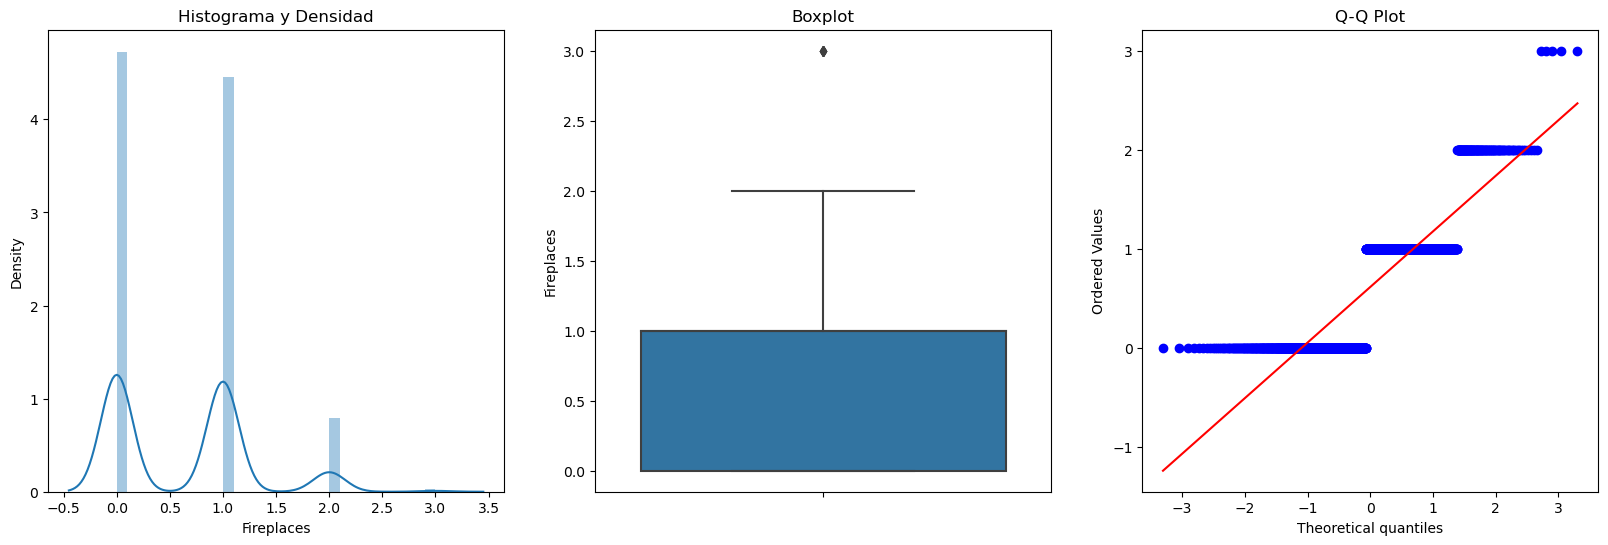

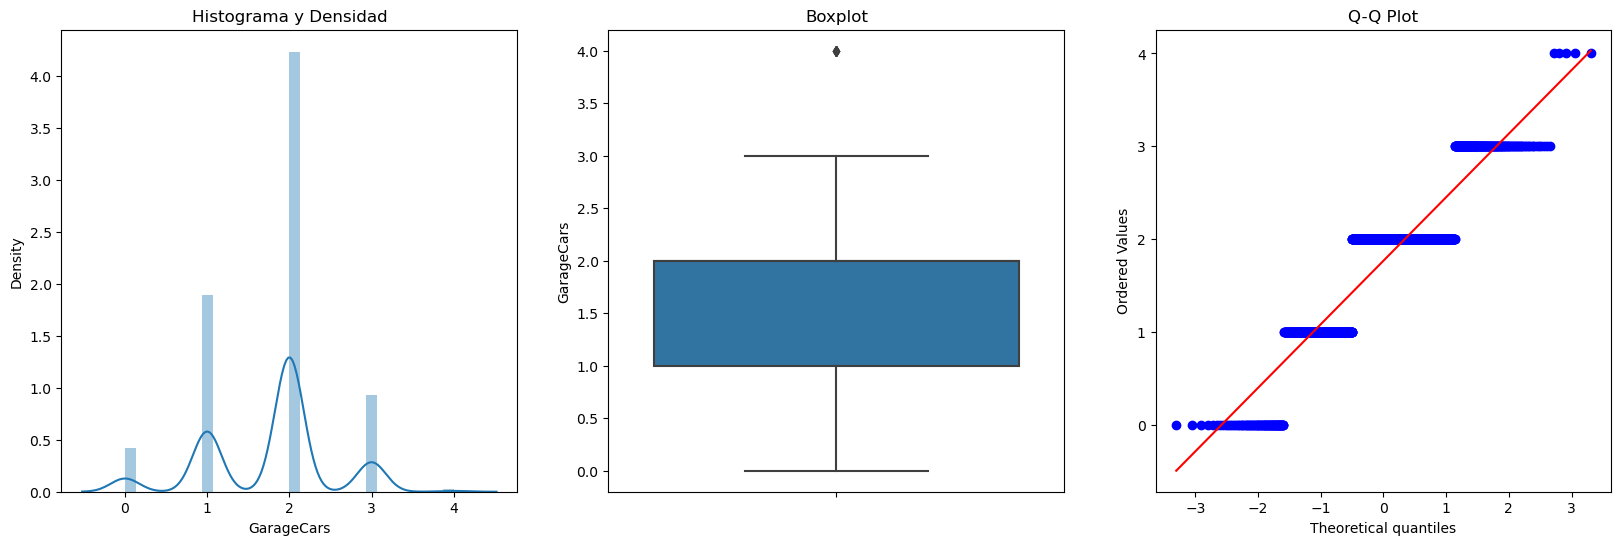

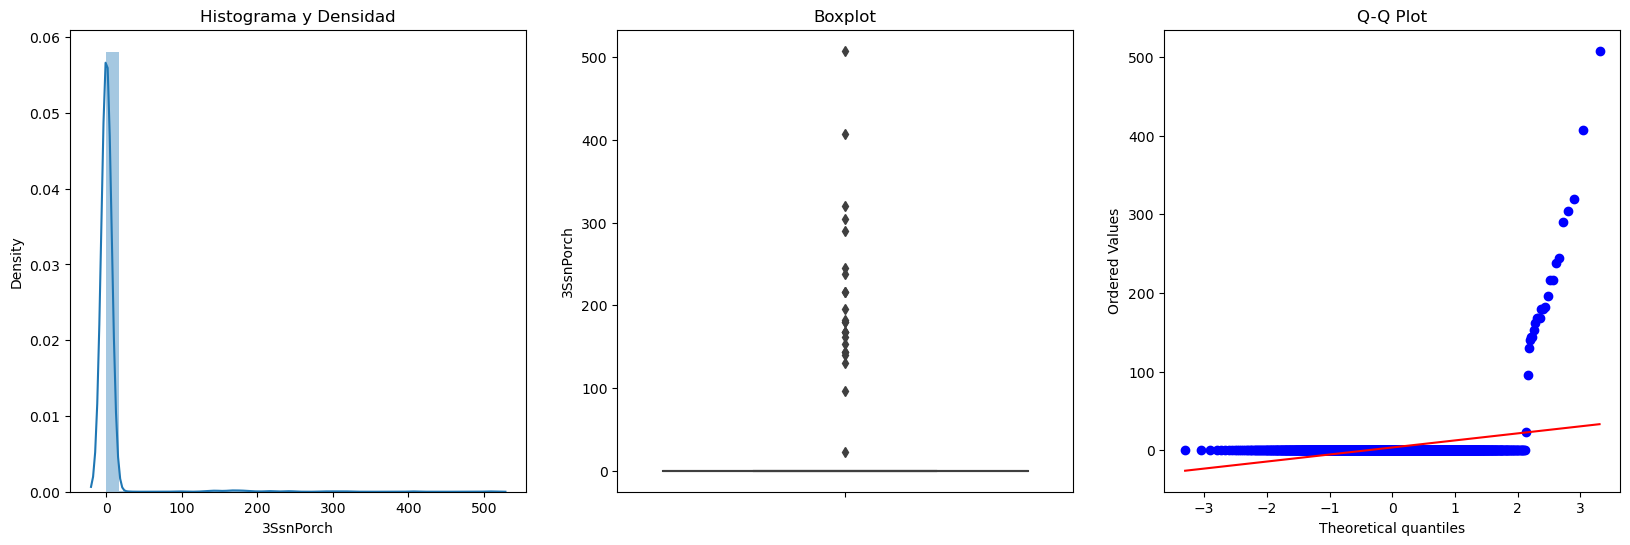

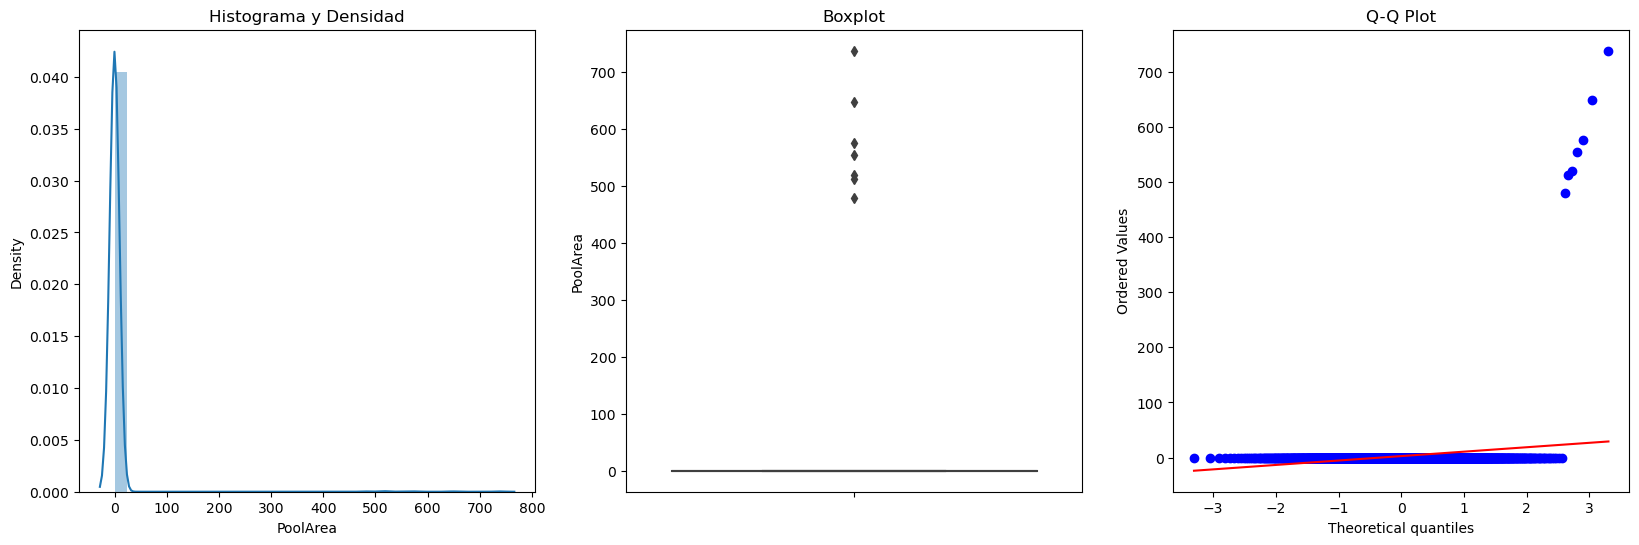

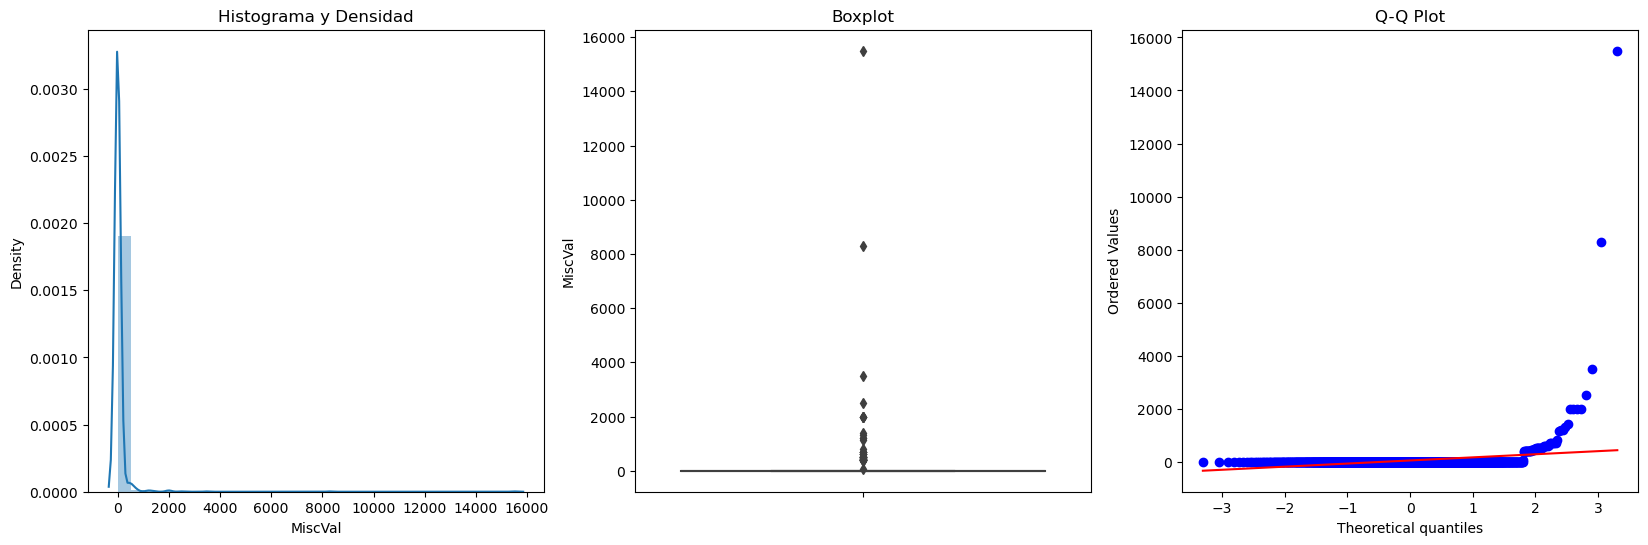

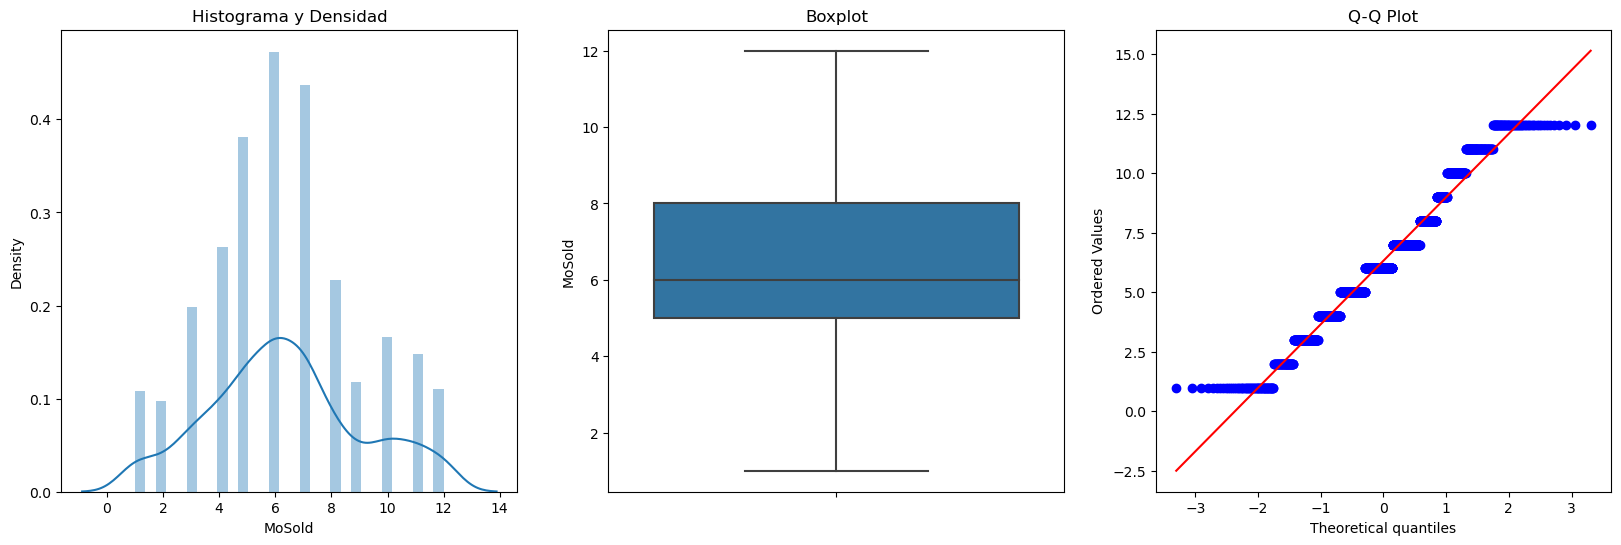

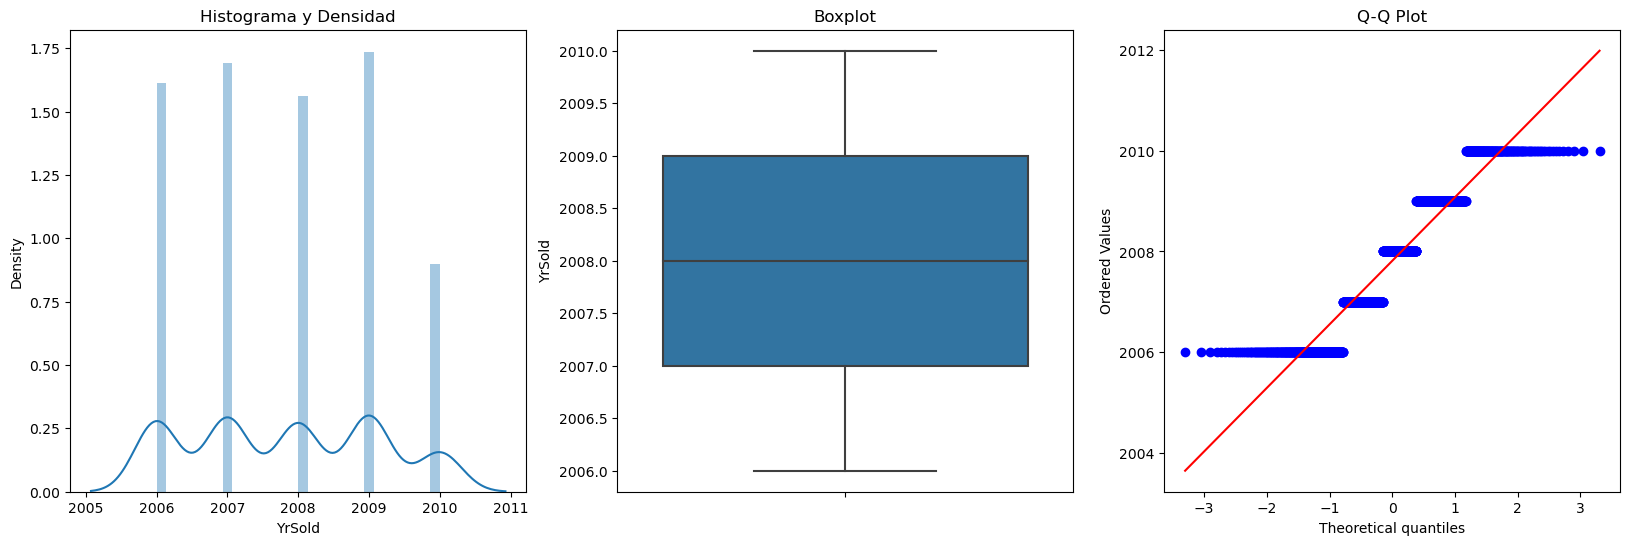

In [28]:
for col in discretas:
    print(f"-----------{col}------------")
    plotDistBoxQQ(df_tarea2, col) 

### La siguiente funcion nos permite obtener IQR, LI y LS

In [29]:
def detectar_outliers_limites(dataset, columnas):
    
    '''
    Descripcion: Calcula los limites superiores e inferiores para deteccion de outliers
    unput: dataset -> pandas dataframe, col -> sring nombre de columna
    Output: tupla de floats con los limites superior e inferior
    '''

    resultados = {}
    for col in columnas:
        IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
        LI = dataset[col].quantile(0.25) - (IQR * 1.5)
        LS = dataset[col].quantile(0.75) + (IQR * 1.5)
        resultados[col] = (LI, LS)
        
    return resultados

### Outliers para continuas

In [30]:
resultados = detectar_outliers_limites(df_tarea2, continuas)
for col, limits in resultados.items():
    print(f"Límites para {col}: {limits}")

Límites para Id: (-728.5, 2189.5)
Límites para LotFrontage: (31.5, 107.5)
Límites para LotArea: (1481.5, 17673.5)
Límites para YearBuilt: (1885.0, 2069.0)
Límites para YearRemodAdd: (1911.5, 2059.5)
Límites para MasVnrArea: (-246.375, 410.625)
Límites para BsmtFinSF1: (-1068.375, 1780.625)
Límites para BsmtFinSF2: (0.0, 0.0)
Límites para BsmtUnfSF: (-654.5, 1685.5)
Límites para TotalBsmtSF: (42.0, 2052.0)
Límites para 1stFlrSF: (118.125, 2155.125)
Límites para 2ndFlrSF: (-1092.0, 1820.0)
Límites para GrLivArea: (158.625, 2747.625)
Límites para GarageYrBlt: (1903.5, 2059.5)
Límites para GarageArea: (-27.75, 938.25)
Límites para WoodDeckSF: (-252.0, 420.0)
Límites para OpenPorchSF: (-102.0, 170.0)
Límites para EnclosedPorch: (0.0, 0.0)
Límites para ScreenPorch: (0.0, 0.0)
Límites para SalePrice: (3937.5, 340037.5)


### Outliers para discretas

In [31]:
resultados = detectar_outliers_limites(df_tarea2, discretas)
for col, limits in resultados.items():
    print(f"Límites para {col}: {limits}")

Límites para MSSubClass: (-55.0, 145.0)
Límites para OverallQual: (2.0, 10.0)
Límites para OverallCond: (3.5, 7.5)
Límites para LowQualFinSF: (0.0, 0.0)
Límites para BsmtFullBath: (-1.5, 2.5)
Límites para BsmtHalfBath: (0.0, 0.0)
Límites para FullBath: (-0.5, 3.5)
Límites para HalfBath: (-1.5, 2.5)
Límites para BedroomAbvGr: (0.5, 4.5)
Límites para KitchenAbvGr: (1.0, 1.0)
Límites para TotRmsAbvGrd: (2.0, 10.0)
Límites para Fireplaces: (-1.5, 2.5)
Límites para GarageCars: (-0.5, 3.5)
Límites para 3SsnPorch: (0.0, 0.0)
Límites para PoolArea: (0.0, 0.0)
Límites para MiscVal: (0.0, 0.0)
Límites para MoSold: (0.5, 12.5)
Límites para YrSold: (2004.0, 2012.0)


### Eliminacion de negativos para los outliers

In [32]:
def detectar_outliers_limites(dataset, columnas):
    resultados = {}
    for col in columnas:
        IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
        LI = max(0, dataset[col].quantile(0.25) - (IQR * 1.5)) #Colocamos que el maximo para el limite inferior es 0
        LS = dataset[col].quantile(0.75) + (IQR * 1.5)
        resultados[col] = (LI, LS)
    return resultados

### Outliers para continuas sin negativos

In [33]:
resultados = detectar_outliers_limites(df_tarea2, continuas)
for col, limits in resultados.items():
    print(f"Límites para {col}: {limits}")

Límites para Id: (0, 2189.5)
Límites para LotFrontage: (31.5, 107.5)
Límites para LotArea: (1481.5, 17673.5)
Límites para YearBuilt: (1885.0, 2069.0)
Límites para YearRemodAdd: (1911.5, 2059.5)
Límites para MasVnrArea: (0, 410.625)
Límites para BsmtFinSF1: (0, 1780.625)
Límites para BsmtFinSF2: (0, 0.0)
Límites para BsmtUnfSF: (0, 1685.5)
Límites para TotalBsmtSF: (42.0, 2052.0)
Límites para 1stFlrSF: (118.125, 2155.125)
Límites para 2ndFlrSF: (0, 1820.0)
Límites para GrLivArea: (158.625, 2747.625)
Límites para GarageYrBlt: (1903.5, 2059.5)
Límites para GarageArea: (0, 938.25)
Límites para WoodDeckSF: (0, 420.0)
Límites para OpenPorchSF: (0, 170.0)
Límites para EnclosedPorch: (0, 0.0)
Límites para ScreenPorch: (0, 0.0)
Límites para SalePrice: (3937.5, 340037.5)


### Outliers para discretas sin negativos

In [34]:
resultados = detectar_outliers_limites(df_tarea2, discretas)
for col, limits in resultados.items():
    print(f"Límites para {col}: {limits}")

Límites para MSSubClass: (0, 145.0)
Límites para OverallQual: (2.0, 10.0)
Límites para OverallCond: (3.5, 7.5)
Límites para LowQualFinSF: (0, 0.0)
Límites para BsmtFullBath: (0, 2.5)
Límites para BsmtHalfBath: (0, 0.0)
Límites para FullBath: (0, 3.5)
Límites para HalfBath: (0, 2.5)
Límites para BedroomAbvGr: (0.5, 4.5)
Límites para KitchenAbvGr: (1.0, 1.0)
Límites para TotRmsAbvGrd: (2.0, 10.0)
Límites para Fireplaces: (0, 2.5)
Límites para GarageCars: (0, 3.5)
Límites para 3SsnPorch: (0, 0.0)
Límites para PoolArea: (0, 0.0)
Límites para MiscVal: (0, 0.0)
Límites para MoSold: (0.5, 12.5)
Límites para YrSold: (2004.0, 2012.0)


### Formula para hacer capping a los datos outliers

In [35]:
def limitar_valores(dataset, columnas, limites):
    for col in columnas:
        LI, LS = limites[col]
        dataset[col] = np.where(dataset[col] > LS, LS, 
                                np.where(dataset[col] < LI, LI, dataset[col]))
    return dataset

### Utilizar formula anterior y hacer capping a las variables continuas

In [36]:
limites = detectar_outliers_limites(df_tarea2, continuas)
df_limitado = limitar_valores(df_tarea2, continuas, limites)
print(df_limitado)

          Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1.0          60       RL         65.0   8450.0   Pave  Pave      Reg   
1        2.0          20       RL         80.0   9600.0   Pave  Pave      Reg   
2        3.0          60       RL         68.0  11250.0   Pave  Pave      IR1   
3        4.0          70       RL         60.0   9550.0   Pave  Pave      IR1   
4        5.0          60       RL         84.0  14260.0   Pave  Pave      IR1   
...      ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456.0          60       RL         62.0   7917.0   Pave  Pave      Reg   
1456  1457.0          20       RL         85.0  13175.0   Pave  Pave      Reg   
1457  1458.0          70       RL         66.0   9042.0   Pave  Pave      Reg   
1458  1459.0          20       RL         68.0   9717.0   Pave  Pave      Reg   
1459  1460.0          20       RL         75.0   9937.0   Pave  Pave      Reg   

     LandContour Utilities 

### graficas de las variables continuas tras hacer capping

-----------Id------------
-----------LotFrontage------------
-----------LotArea------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

-----------YearBuilt------------
-----------YearRemodAdd------------
-----------MasVnrArea------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

-----------BsmtFinSF1------------
-----------BsmtFinSF2------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


-----------BsmtUnfSF------------
-----------TotalBsmtSF------------
-----------1stFlrSF------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

-----------2ndFlrSF------------
-----------GrLivArea------------
-----------GarageYrBlt------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

-----------GarageArea------------
-----------WoodDeckSF------------
-----------OpenPorchSF------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

-----------EnclosedPorch------------
-----------ScreenPorch------------
-----------SalePrice------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distribution

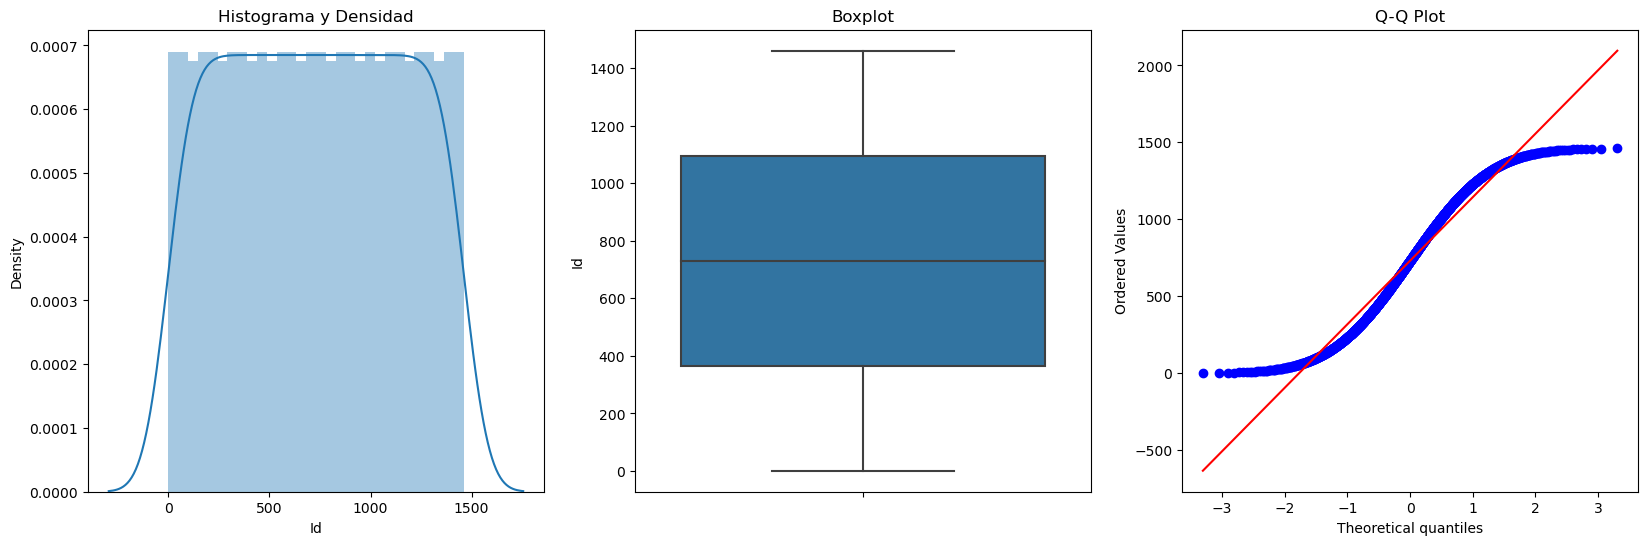

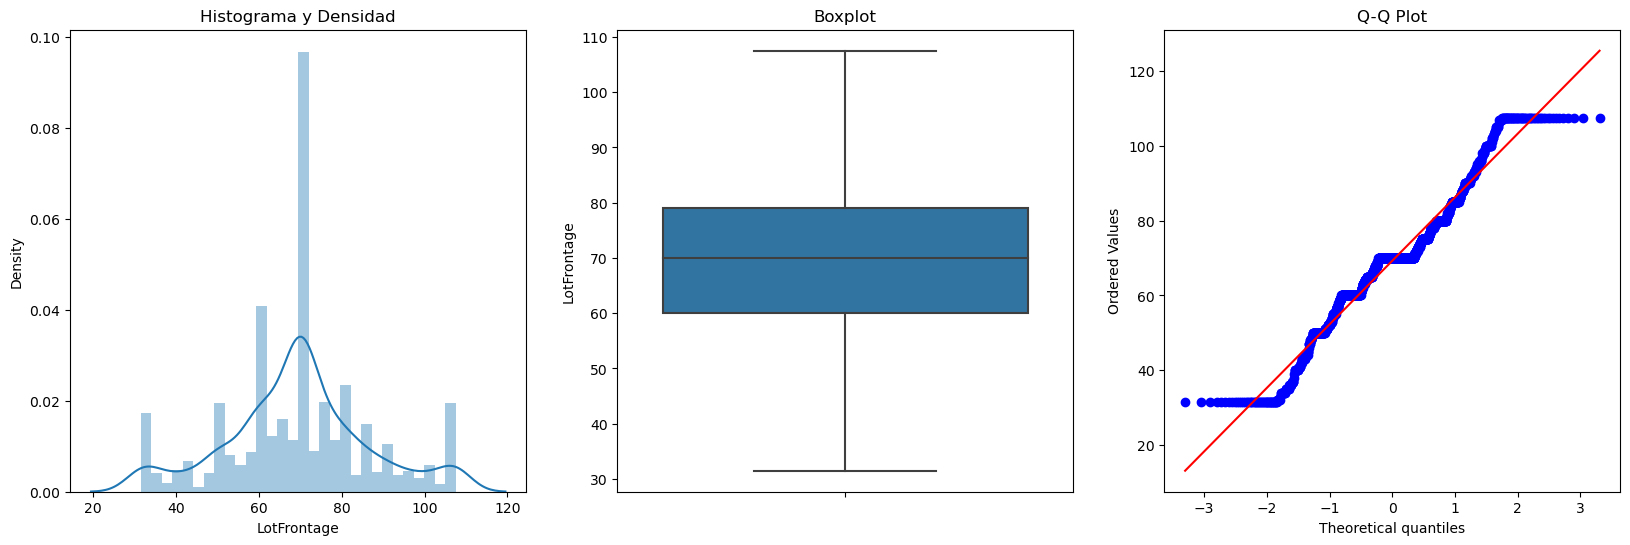

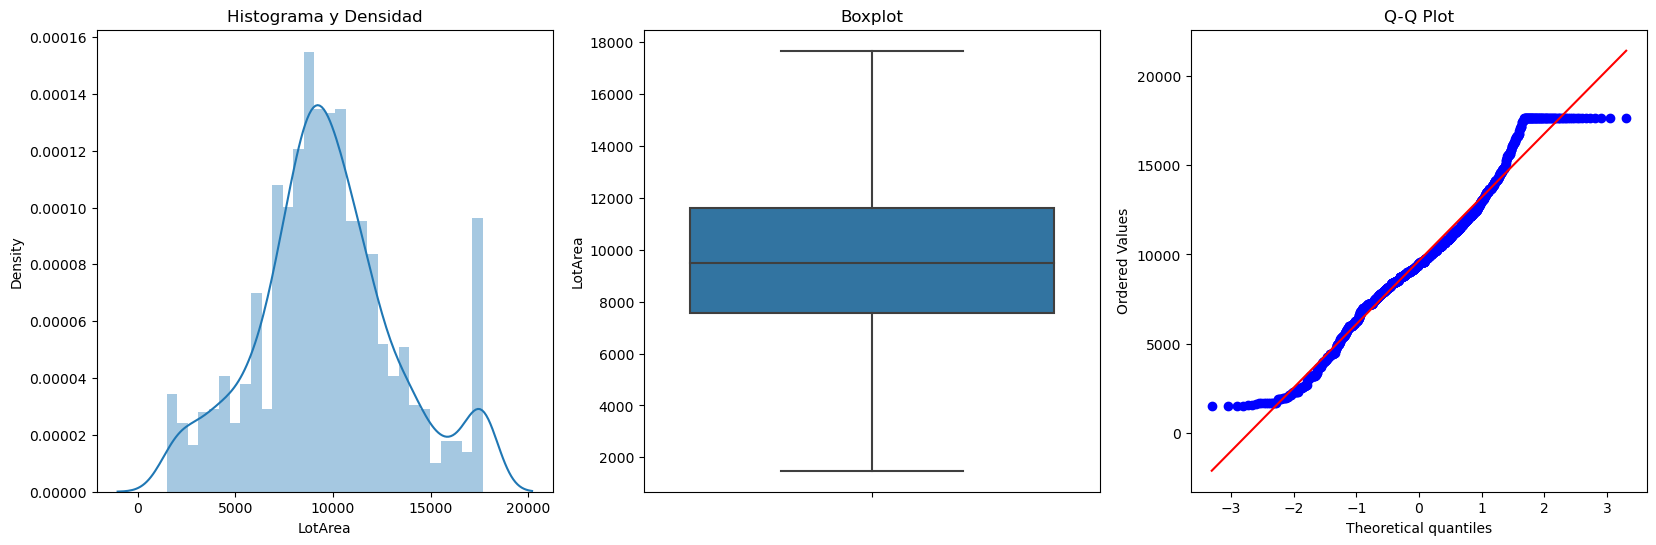

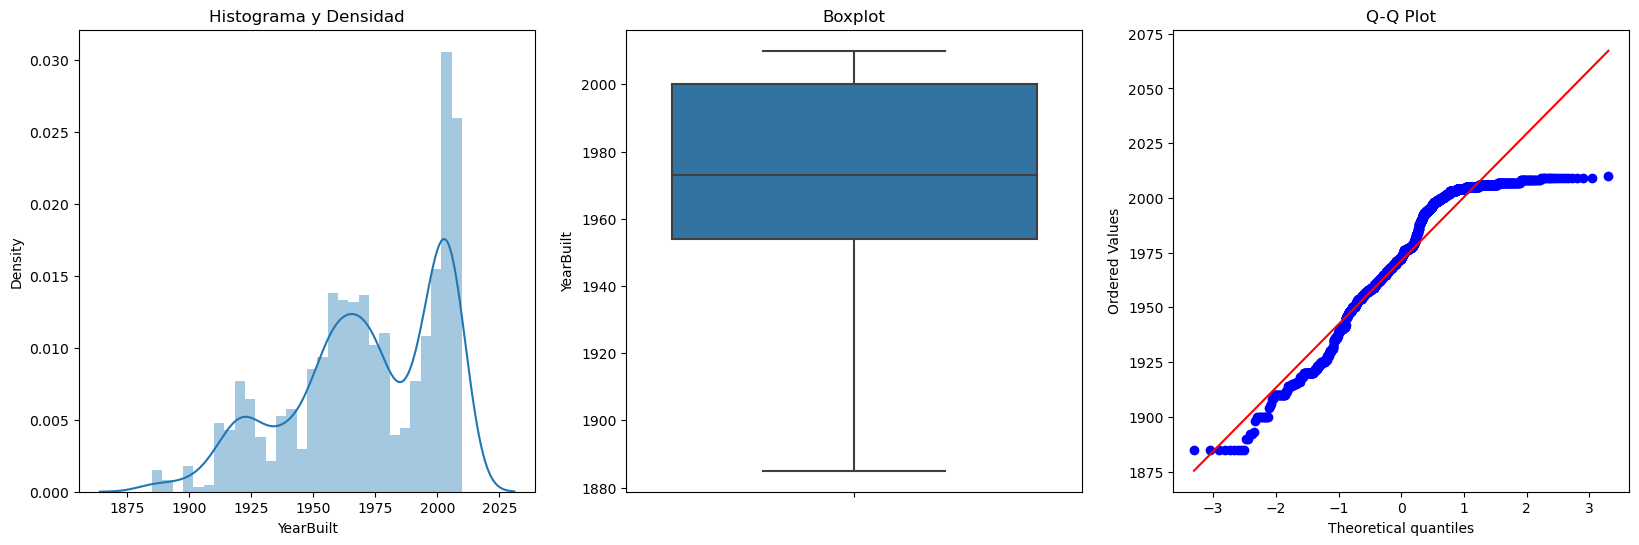

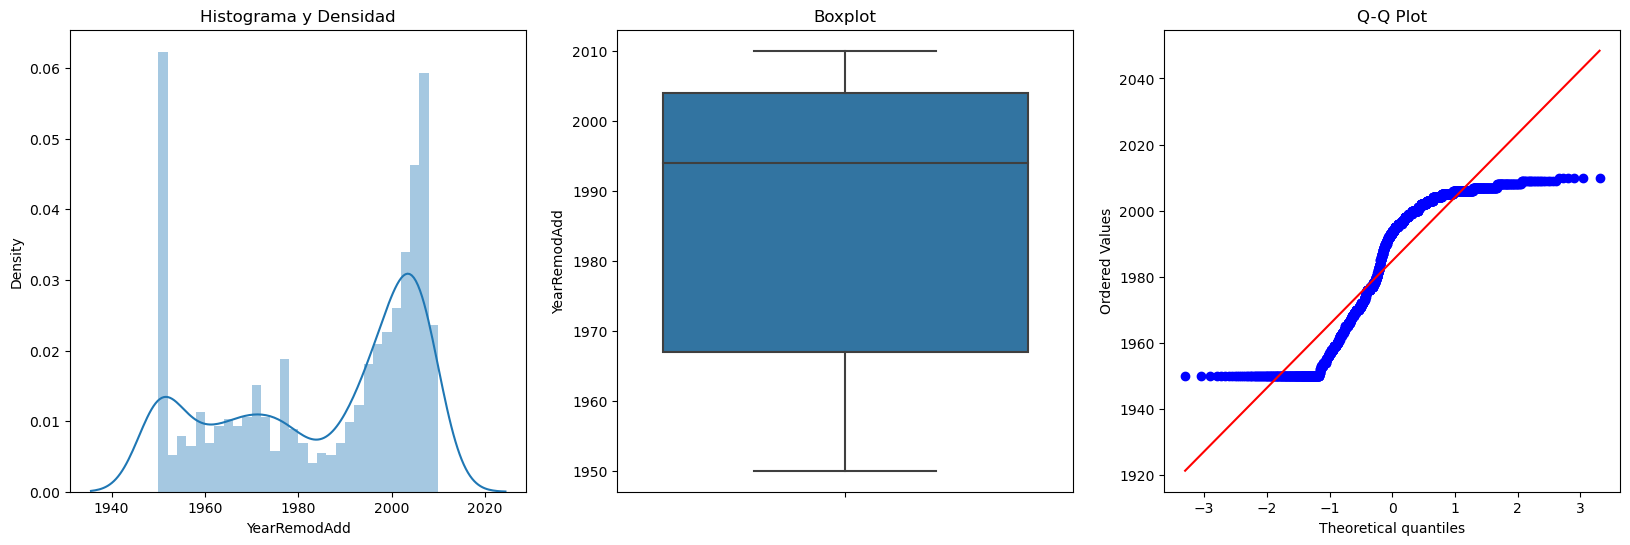

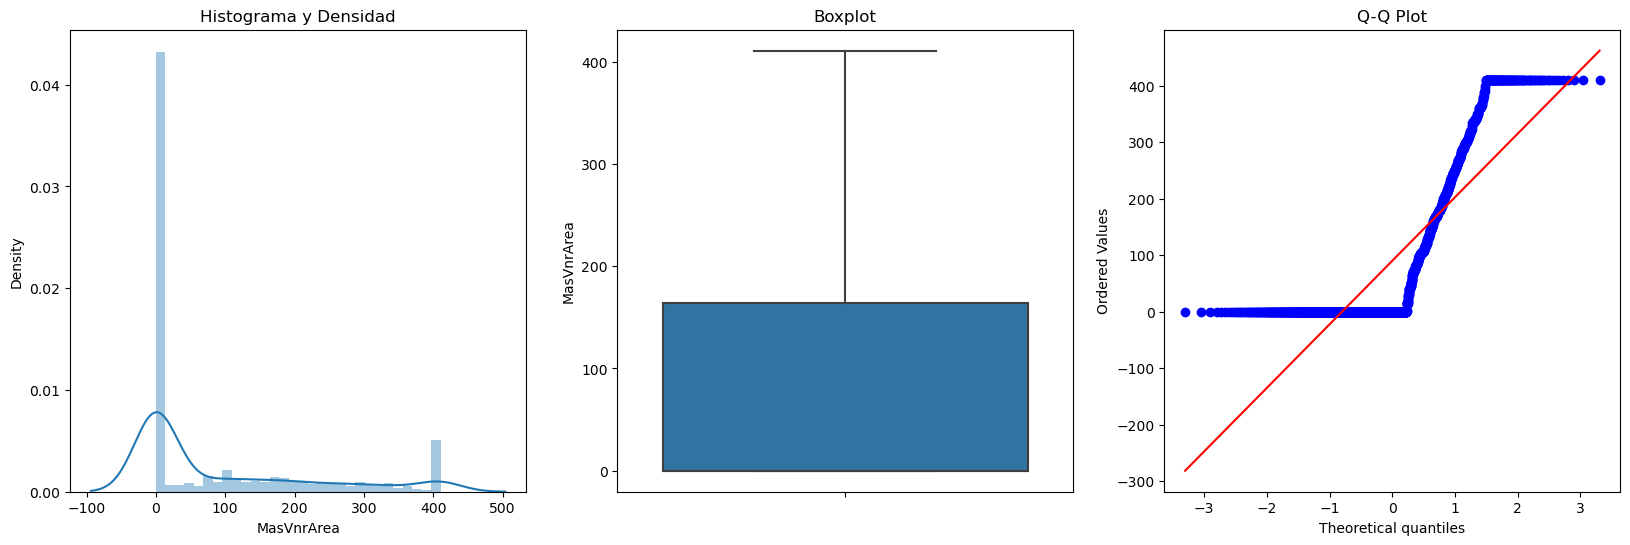

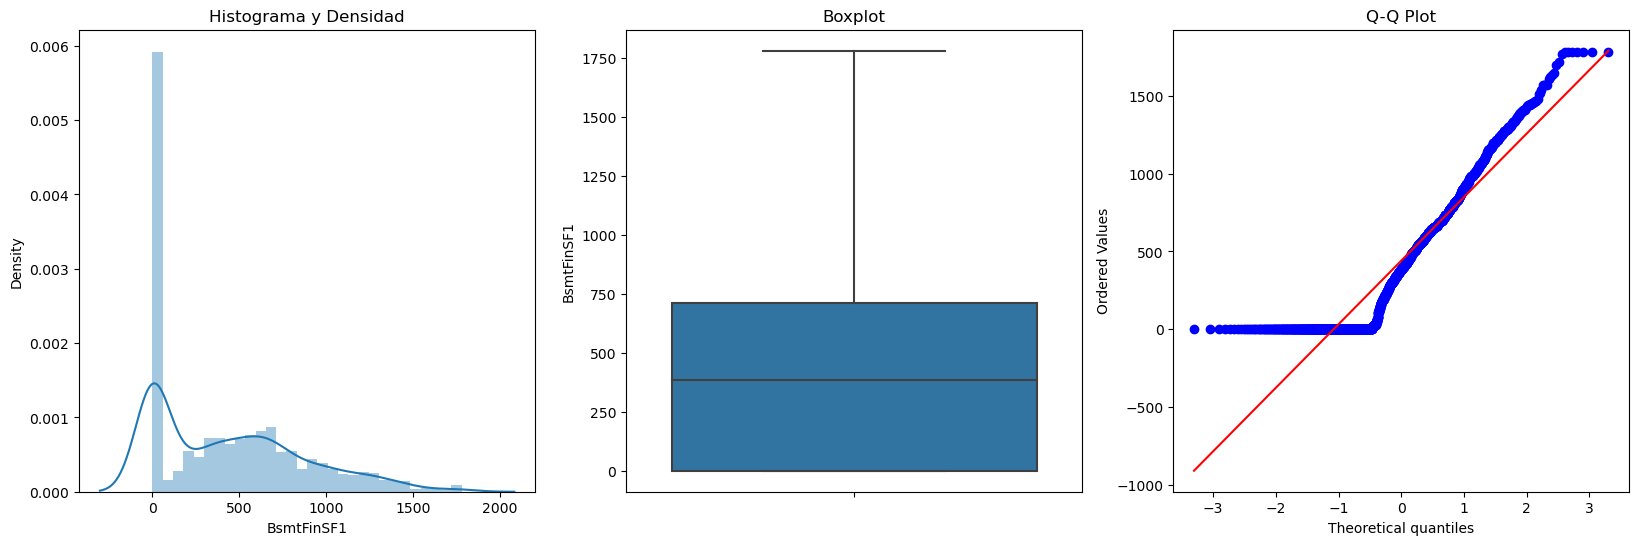

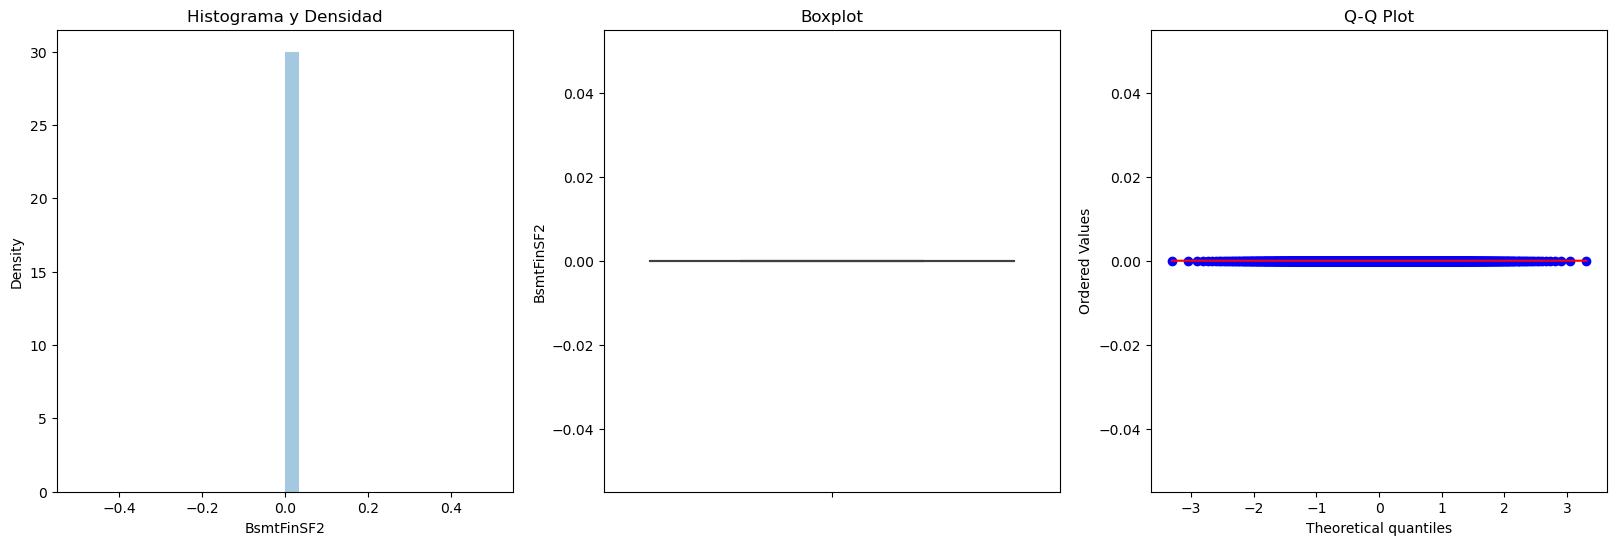

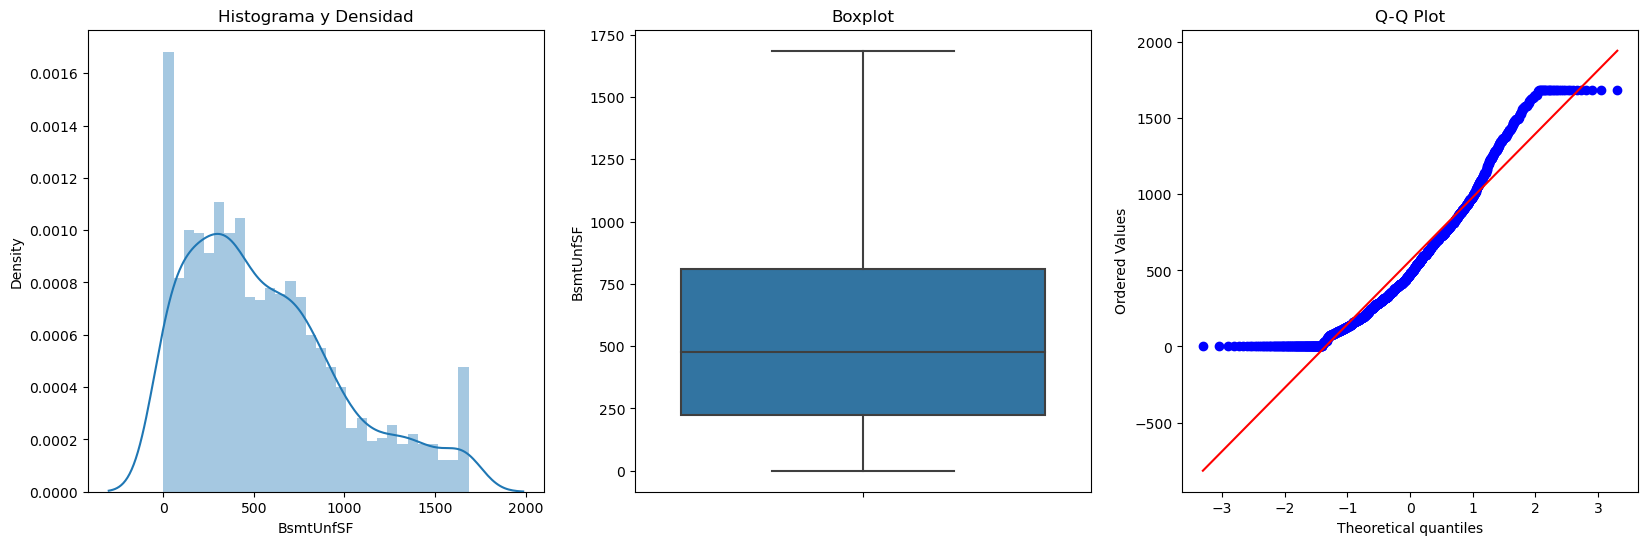

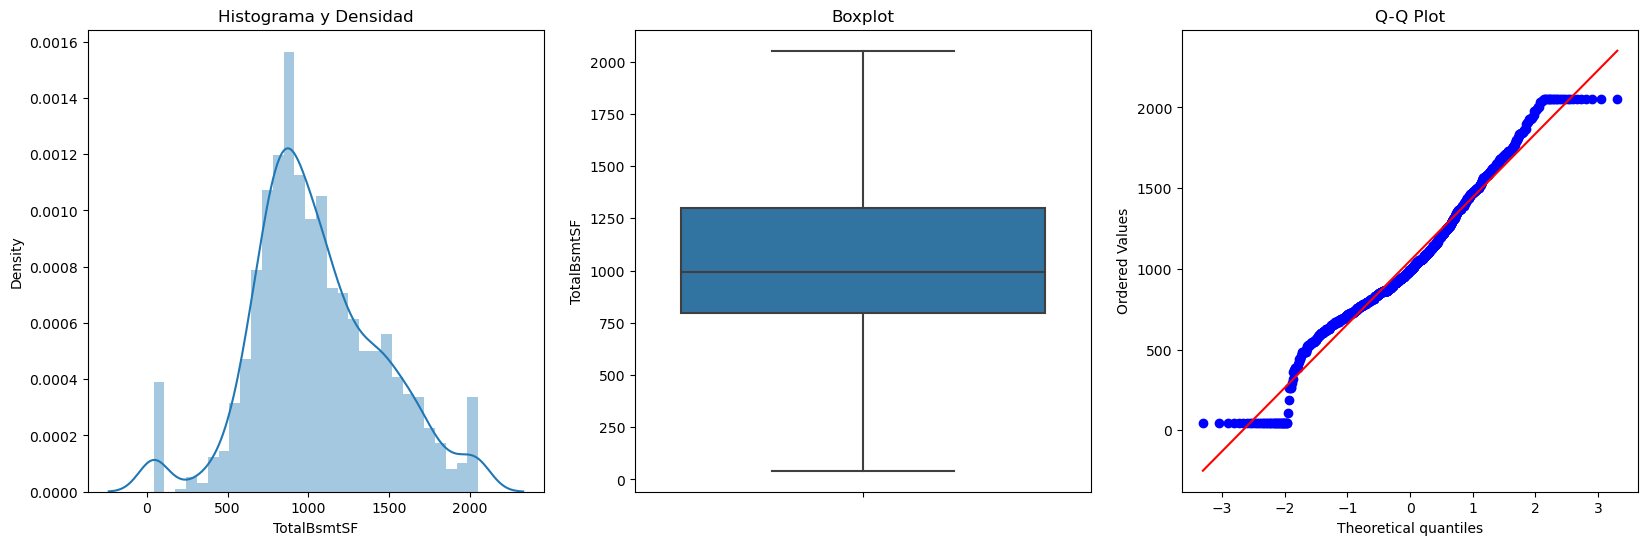

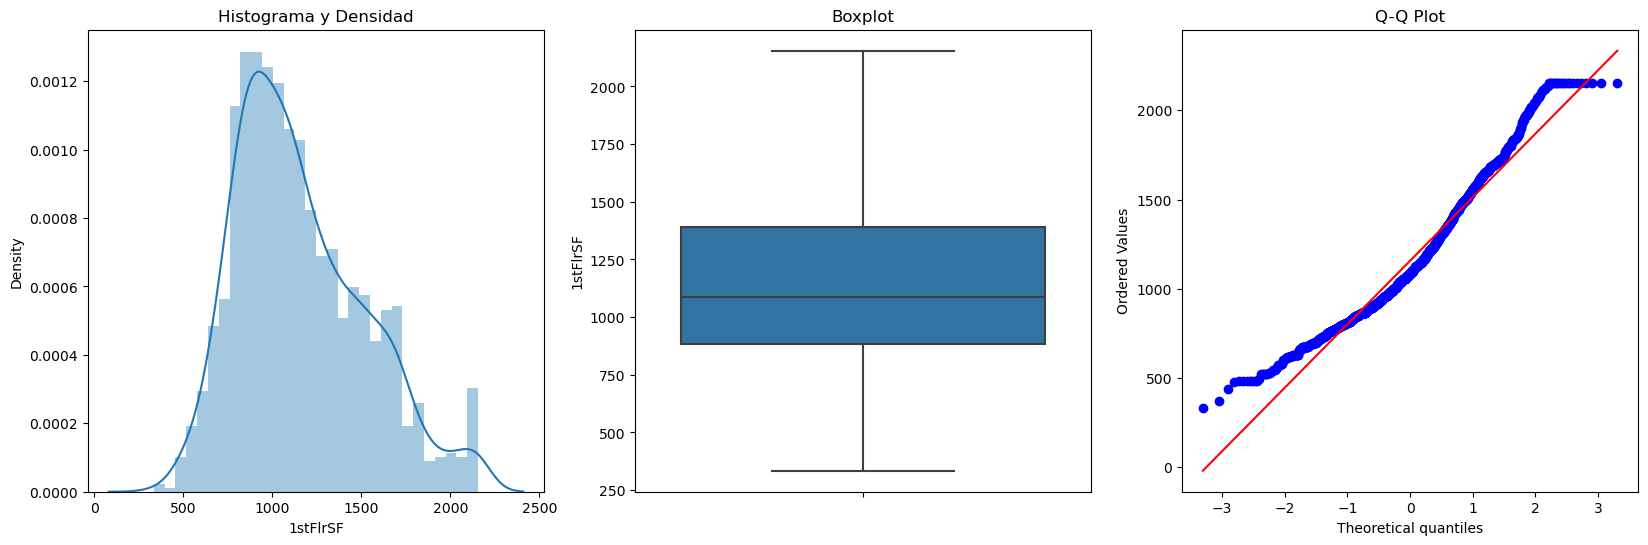

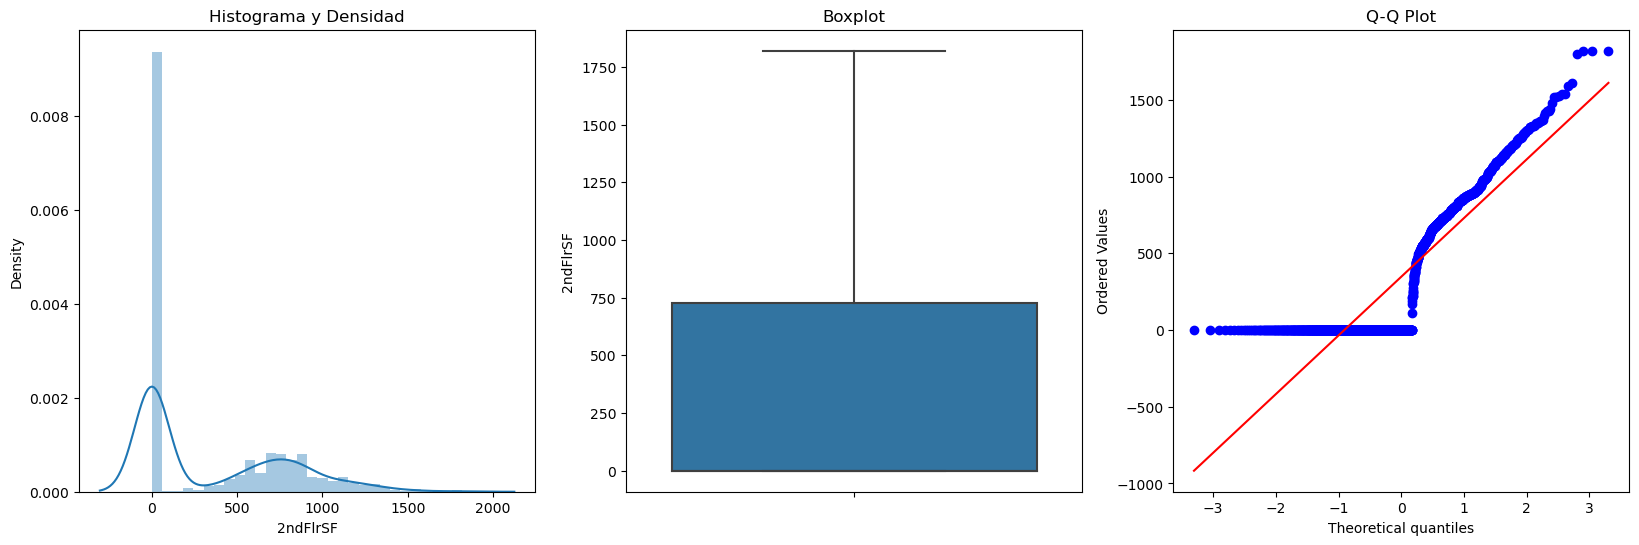

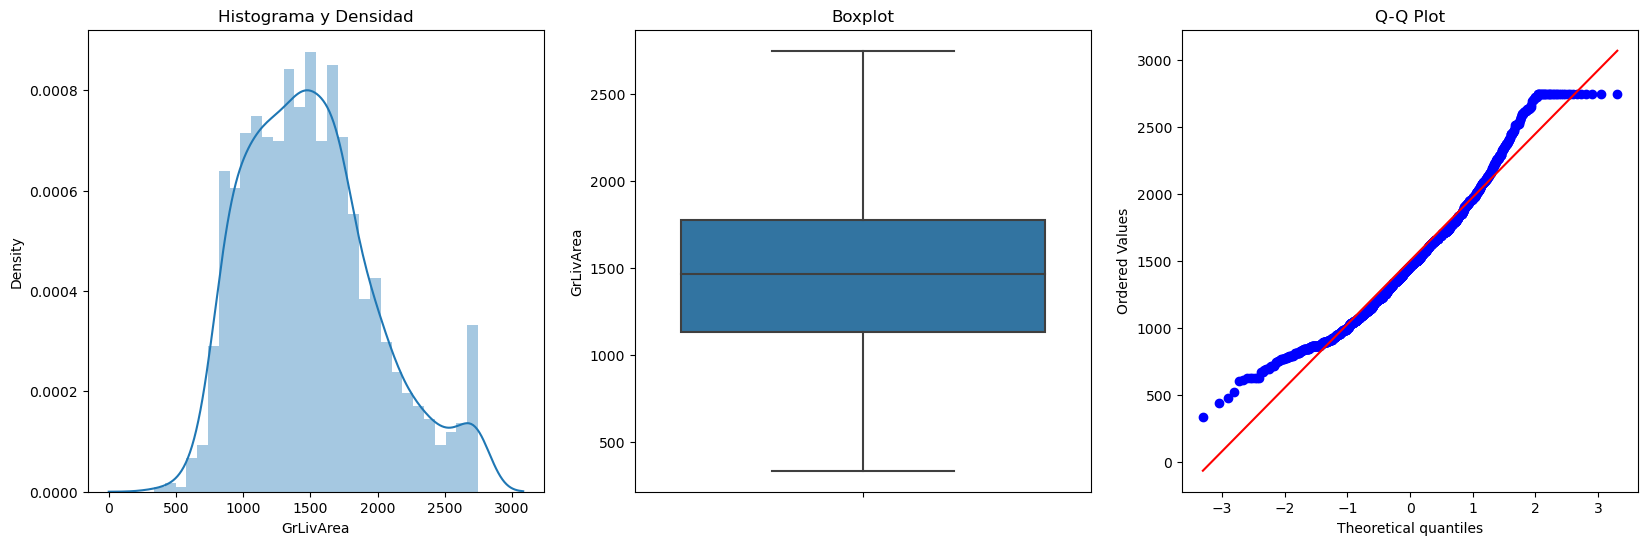

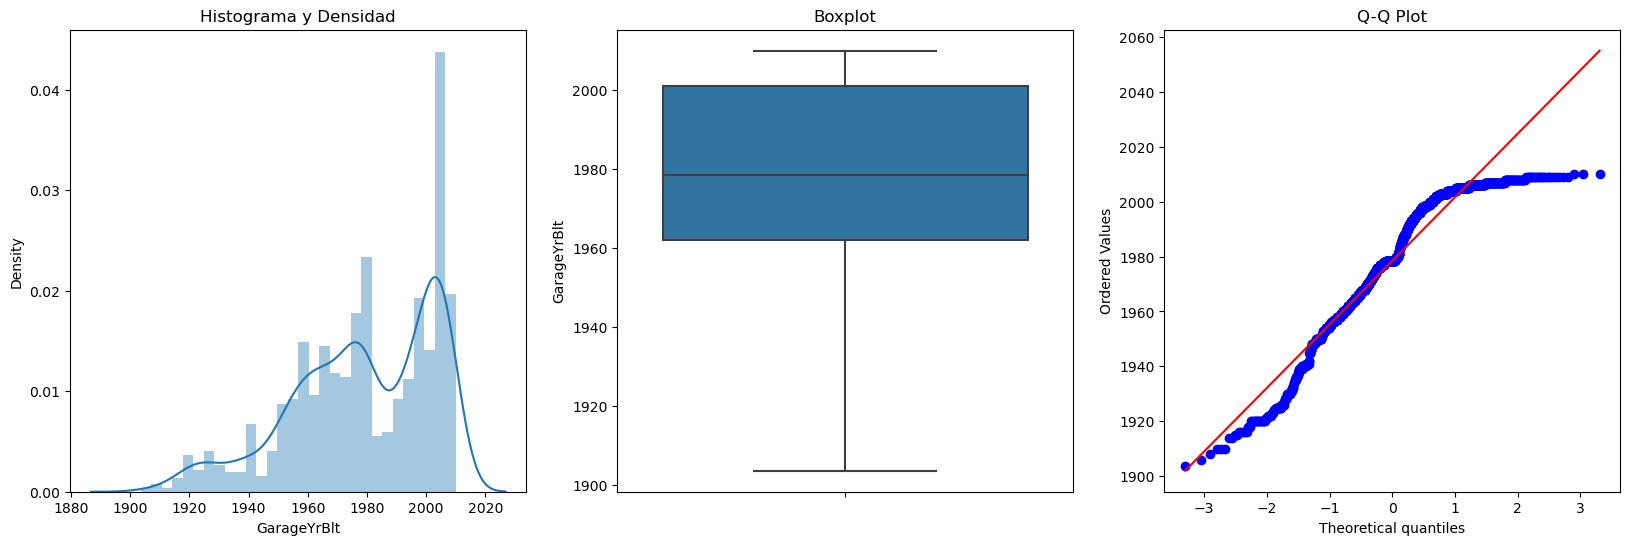

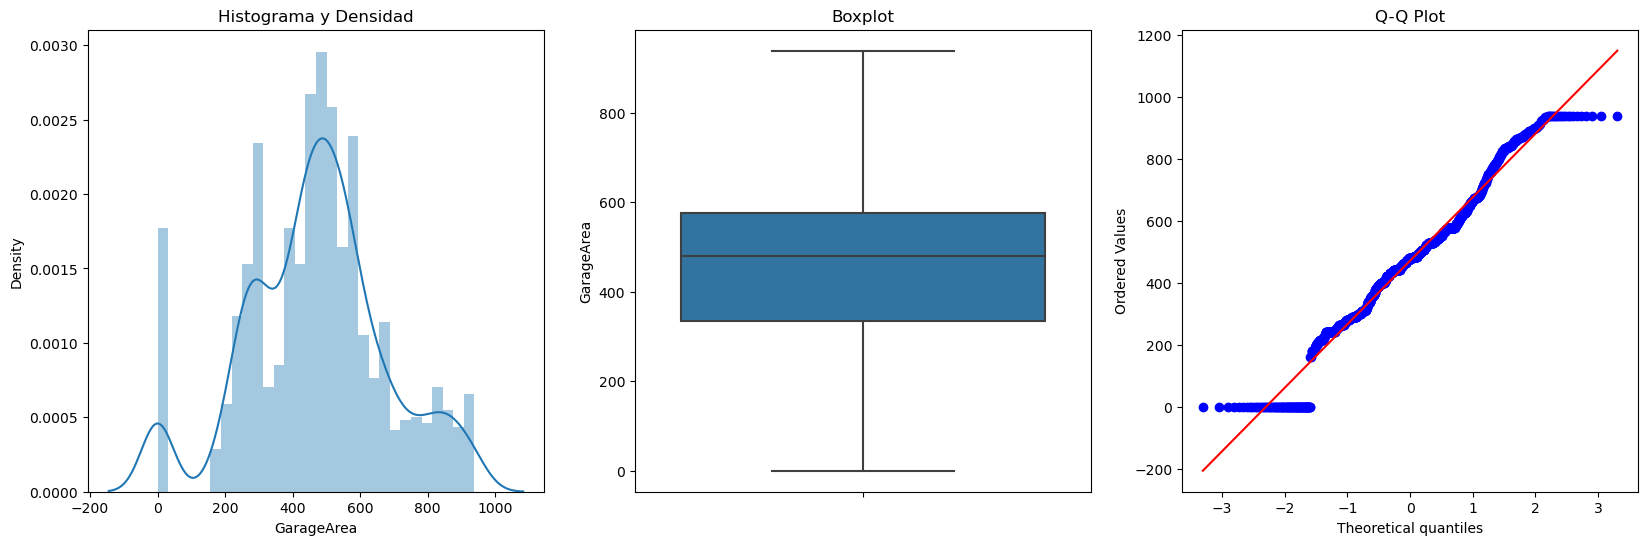

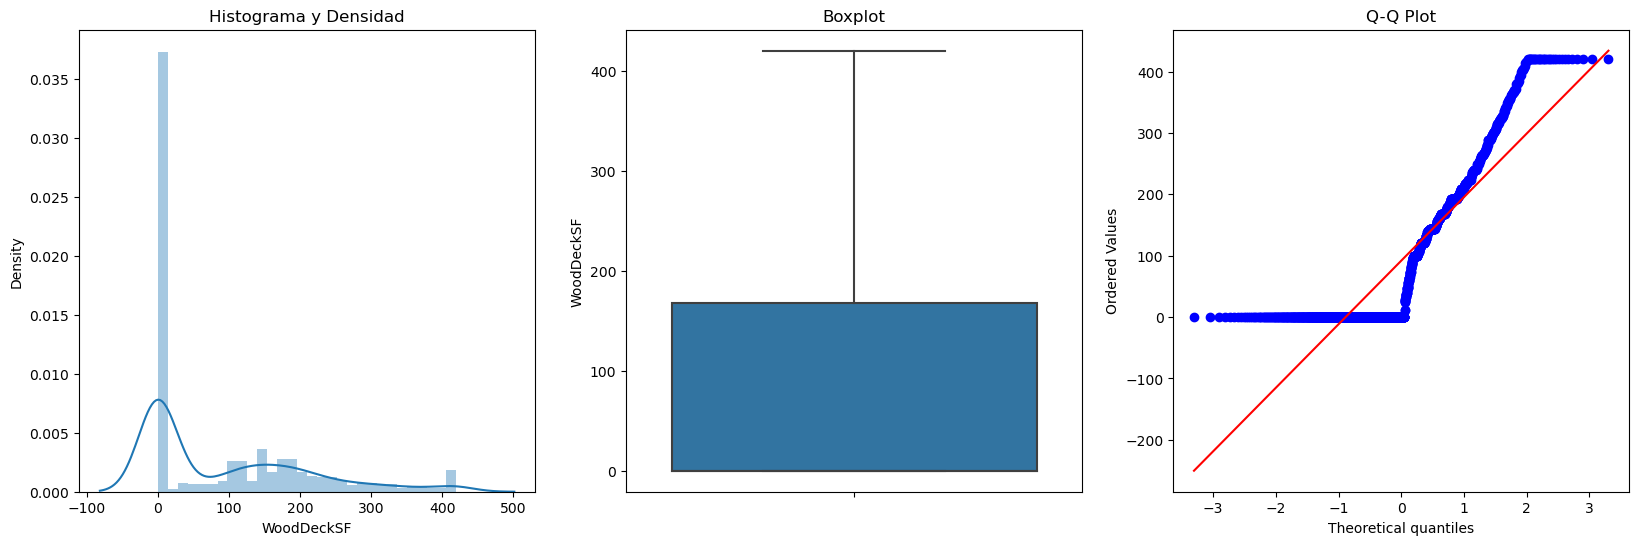

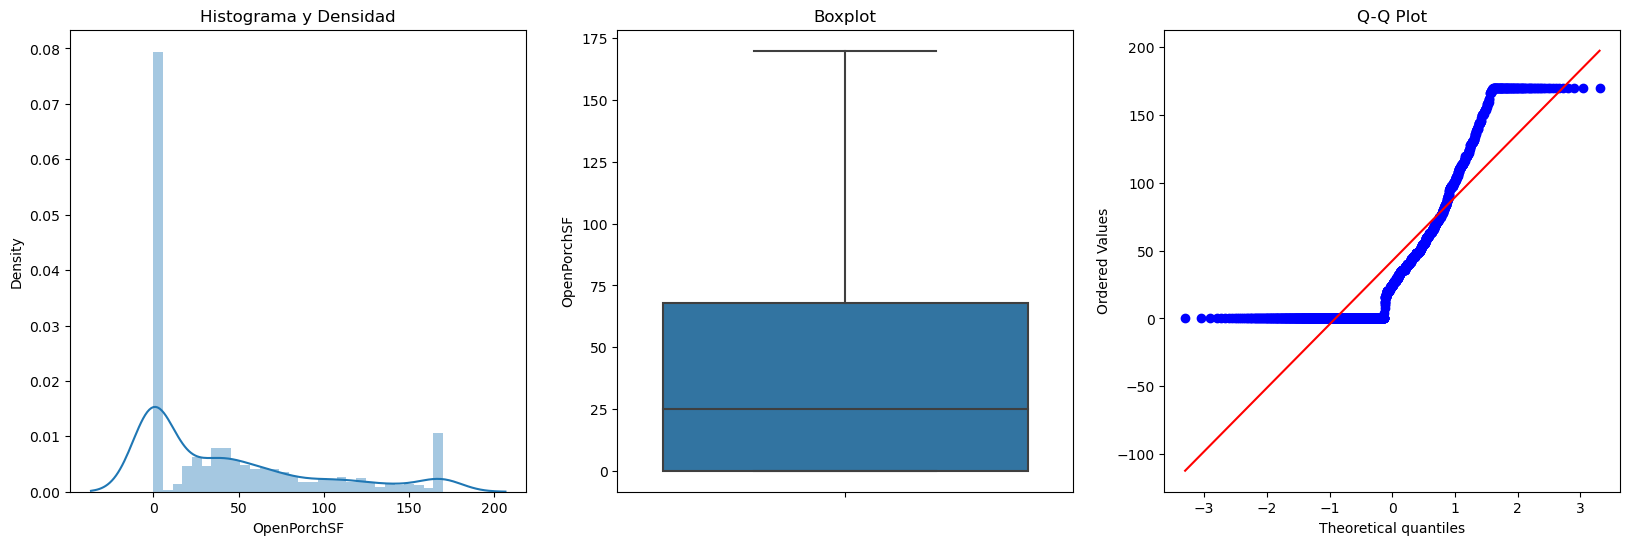

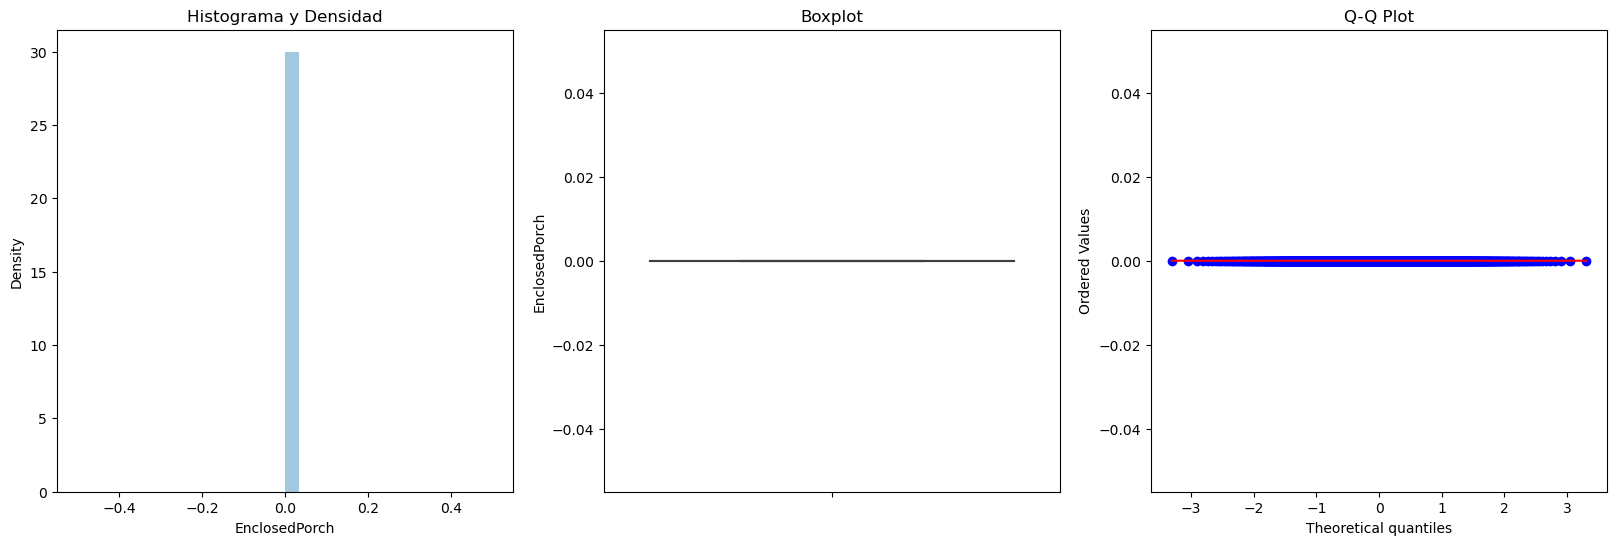

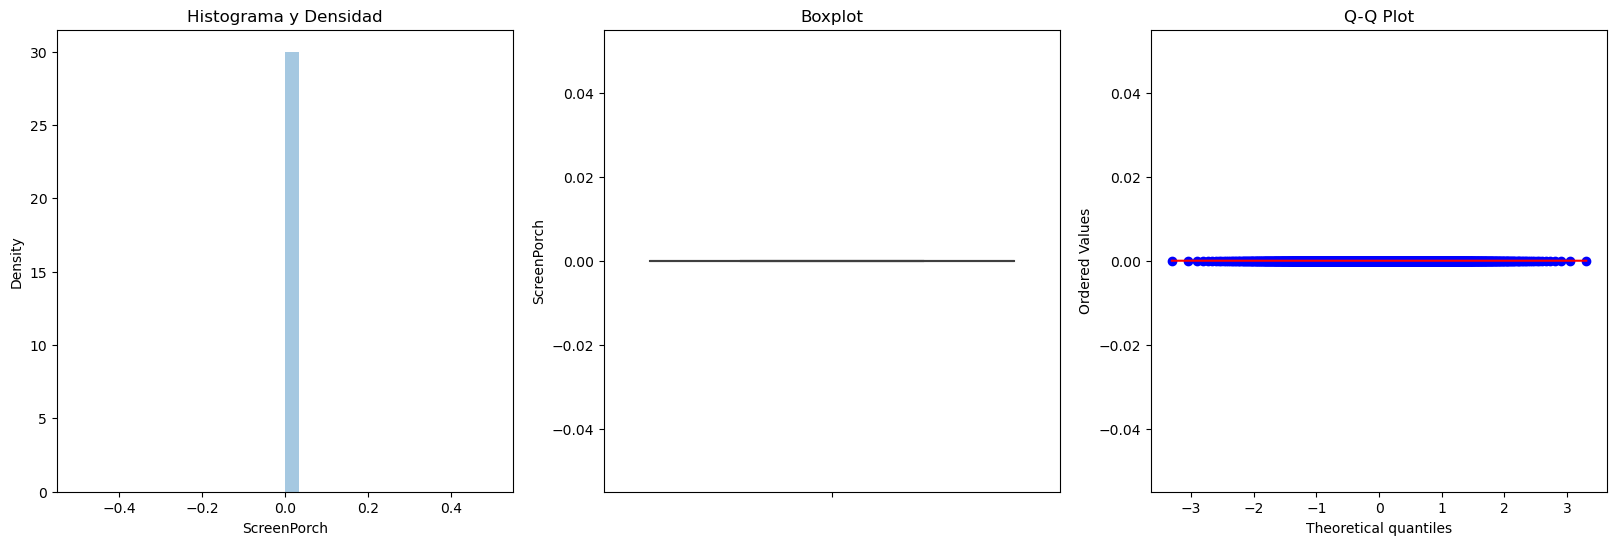

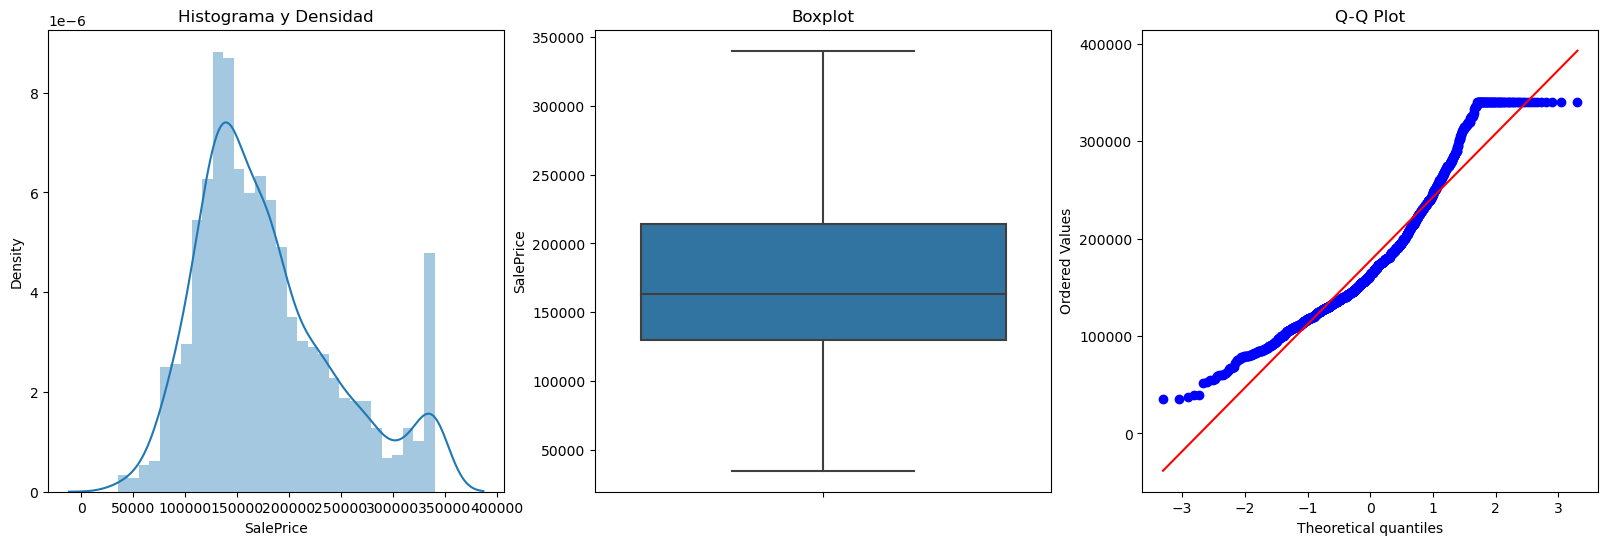

In [37]:
# Descripcion: Crear graficas para todas las columnas continuas

for col in continuas:
    print(f"-----------{col}------------")
    plotDistBoxQQ(df_limitado, col) 

### Conclusion: Varias columnas obtuvieron una mejora en la distribucion de datos gracias al capping pero hubieron columnas que obtuvieron una segunda Moda

### misma formula para hacer capping a las variables discretas

In [38]:
def limitar_valores(dataset, columnas, limites):
    for col in columnas:
        LI, LS = limites[col]
        dataset[col] = np.where(dataset[col] > LS, LS, 
                                np.where(dataset[col] < LI, LI, dataset[col]))
    return dataset

### Utilizar formula anterior y hacer capping a las variables discretas

In [39]:
limites = detectar_outliers_limites(df_tarea2, discretas)
df_limitado = limitar_valores(df_tarea2, discretas, limites)
print(df_limitado)

          Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1.0        60.0       RL         65.0   8450.0   Pave  Pave      Reg   
1        2.0        20.0       RL         80.0   9600.0   Pave  Pave      Reg   
2        3.0        60.0       RL         68.0  11250.0   Pave  Pave      IR1   
3        4.0        70.0       RL         60.0   9550.0   Pave  Pave      IR1   
4        5.0        60.0       RL         84.0  14260.0   Pave  Pave      IR1   
...      ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456.0        60.0       RL         62.0   7917.0   Pave  Pave      Reg   
1456  1457.0        20.0       RL         85.0  13175.0   Pave  Pave      Reg   
1457  1458.0        70.0       RL         66.0   9042.0   Pave  Pave      Reg   
1458  1459.0        20.0       RL         68.0   9717.0   Pave  Pave      Reg   
1459  1460.0        20.0       RL         75.0   9937.0   Pave  Pave      Reg   

     LandContour Utilities 

### Crear graficas para todas las varibles discretas discretas tras hacer capping

-----------MSSubClass------------
-----------OverallQual------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------OverallCond------------
-----------LowQualFinSF------------
-----------BsmtFullBath------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distribution

-----------BsmtHalfBath------------
-----------FullBath------------
-----------HalfBath------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distribution

-----------BedroomAbvGr------------
-----------KitchenAbvGr------------
-----------TotRmsAbvGrd------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distribution

-----------Fireplaces------------
-----------GarageCars------------
-----------3SsnPorch------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

-----------PoolArea------------
-----------MiscVal------------
-----------MoSold------------
-----------YrSold------------


c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jose L\anaconda3\lib\site-packages\seaborn\distribution

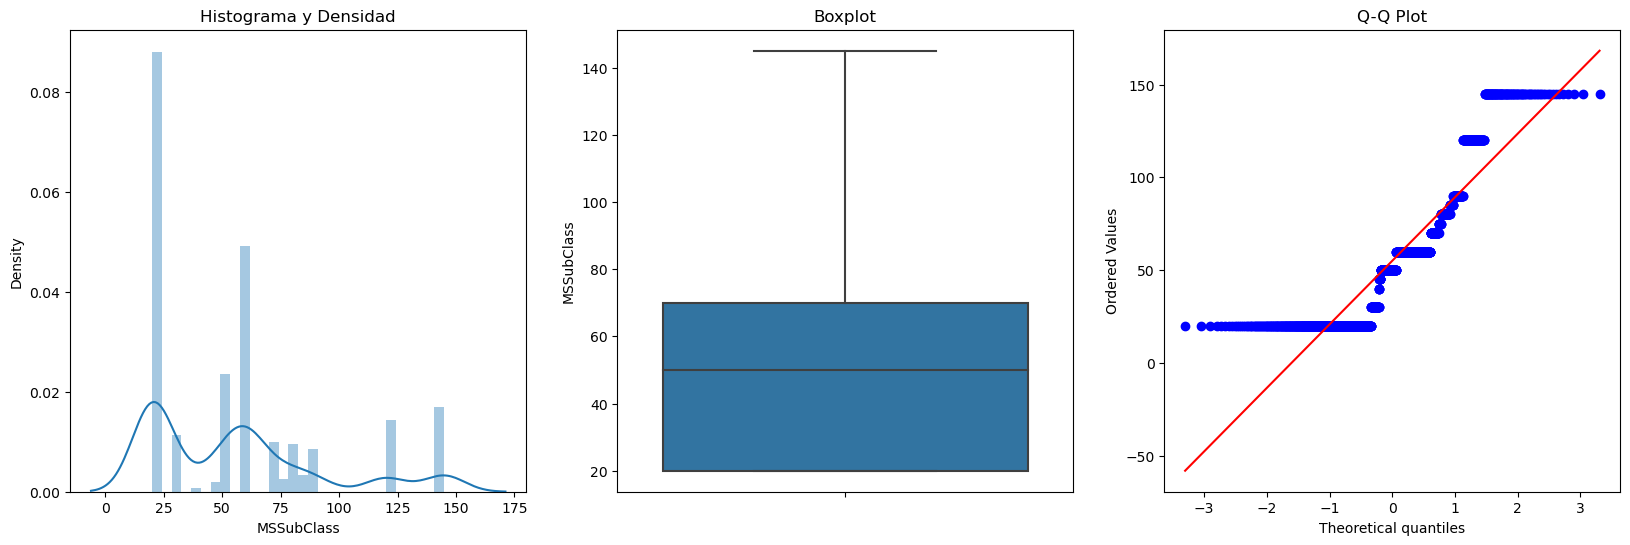

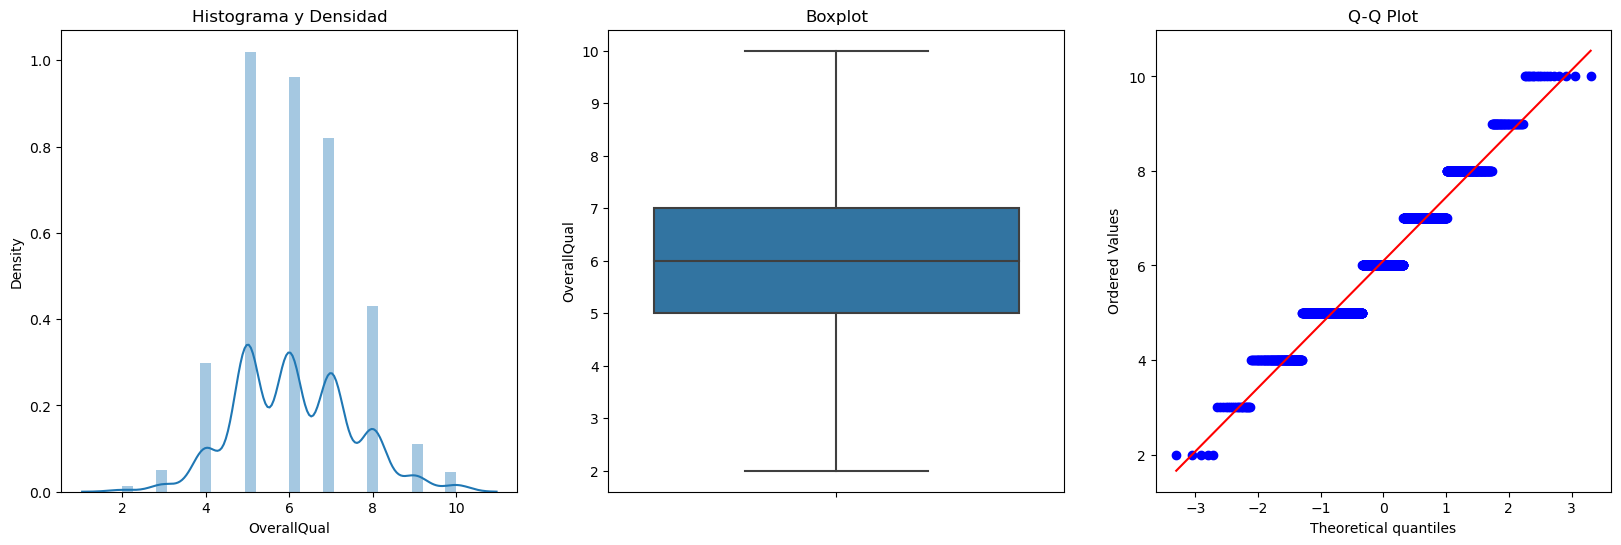

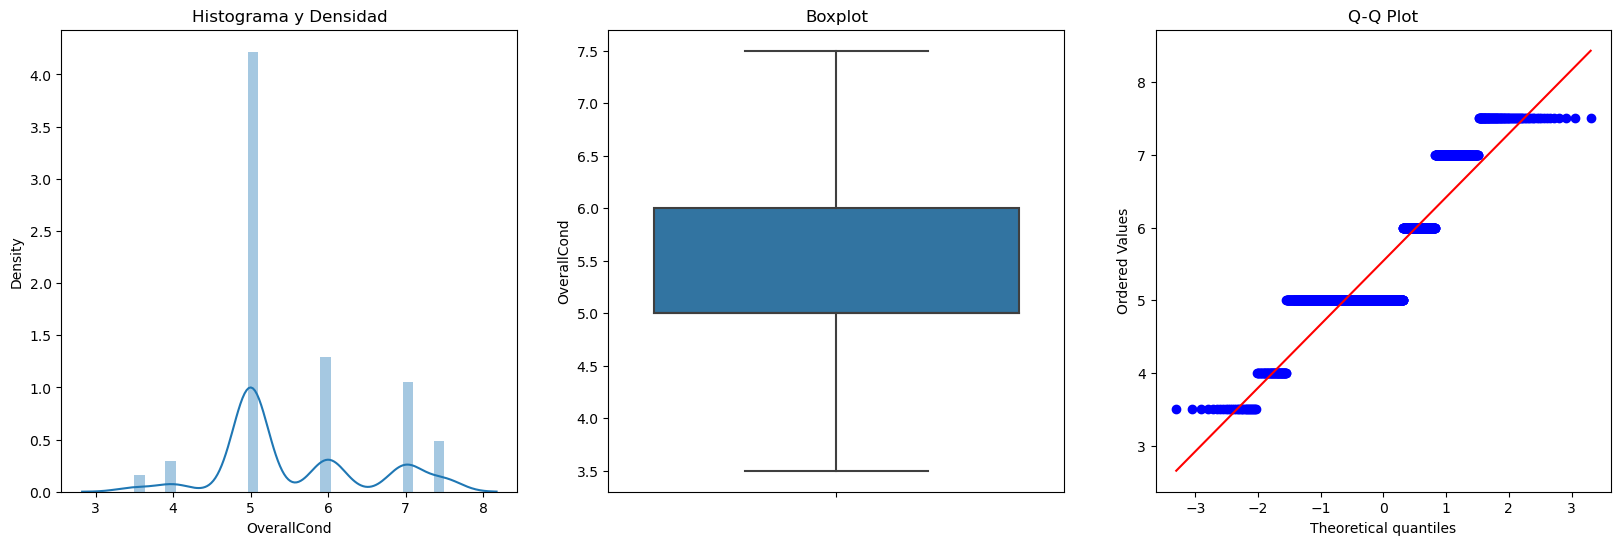

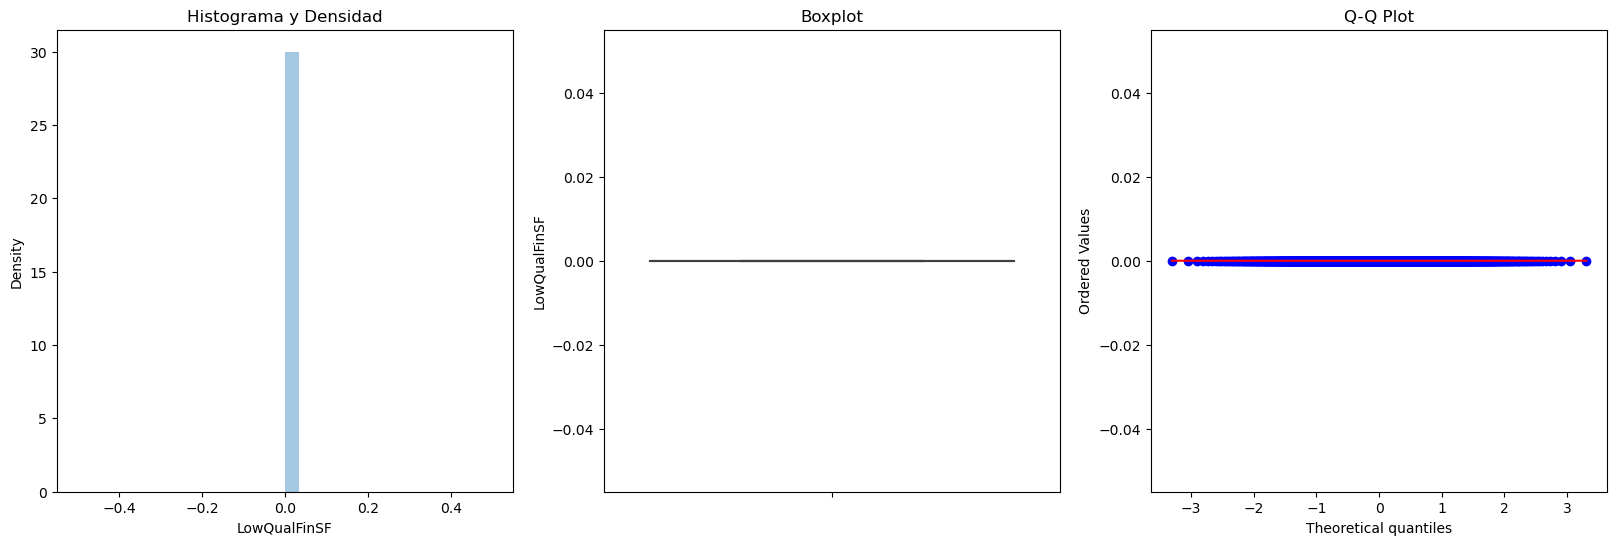

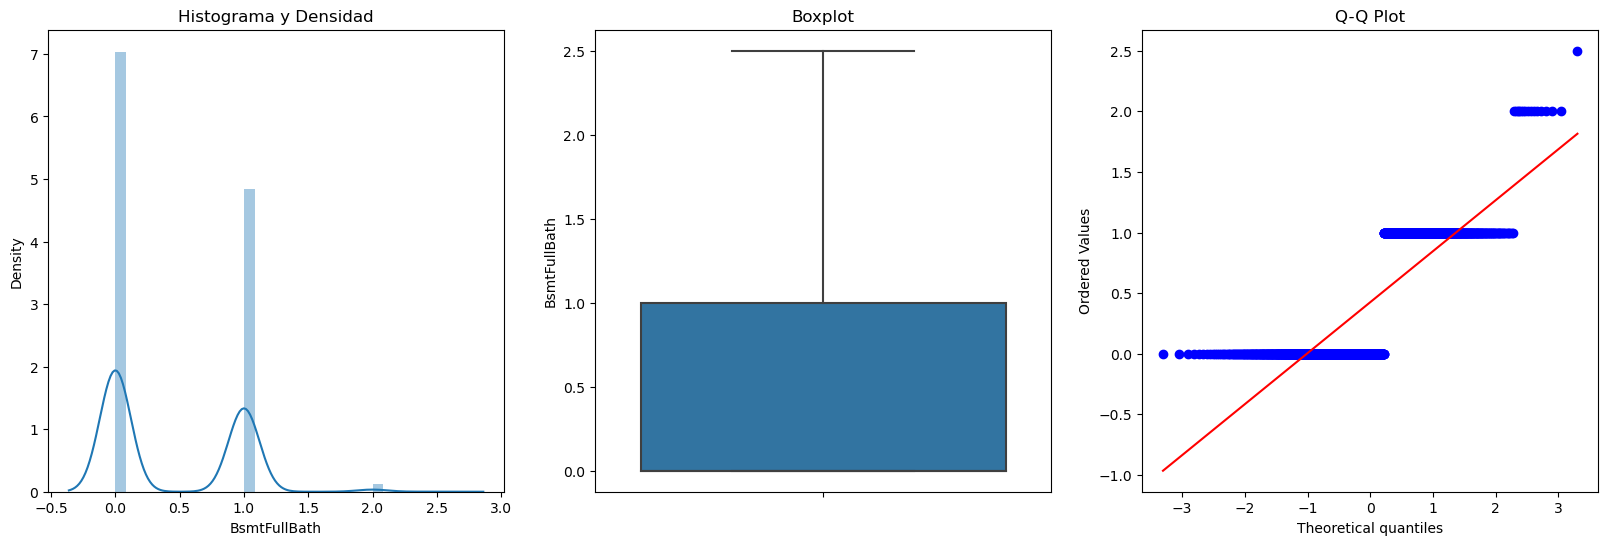

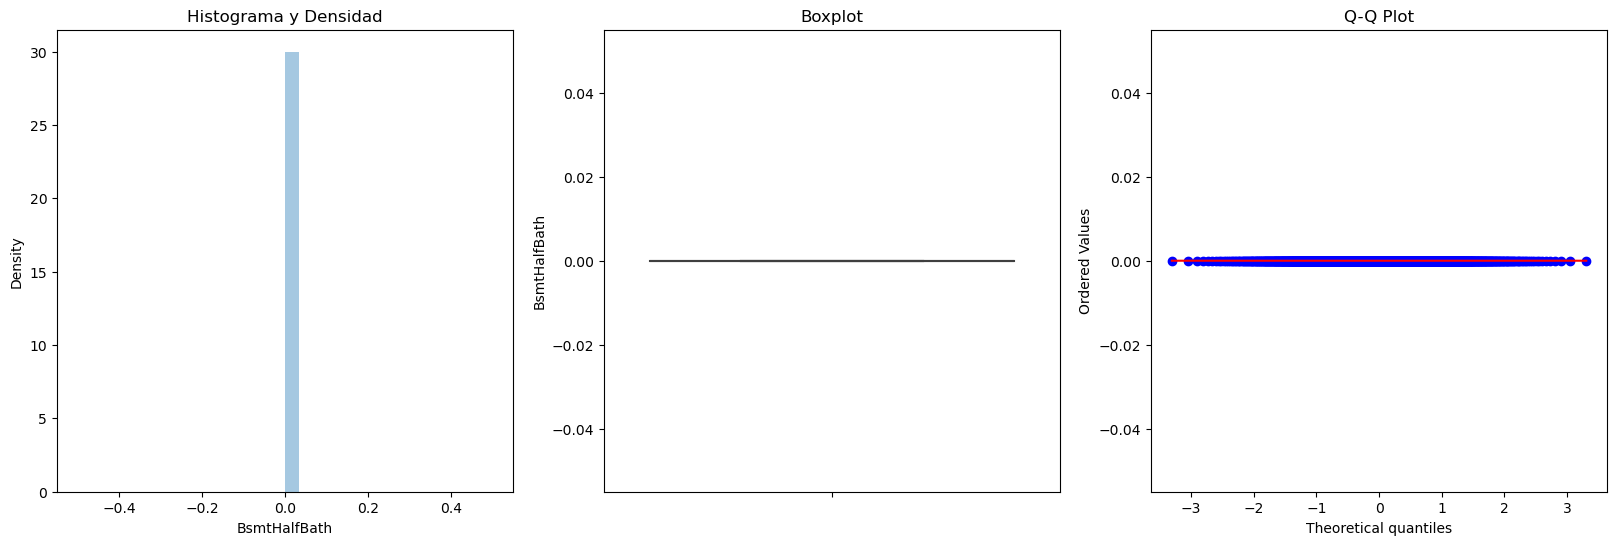

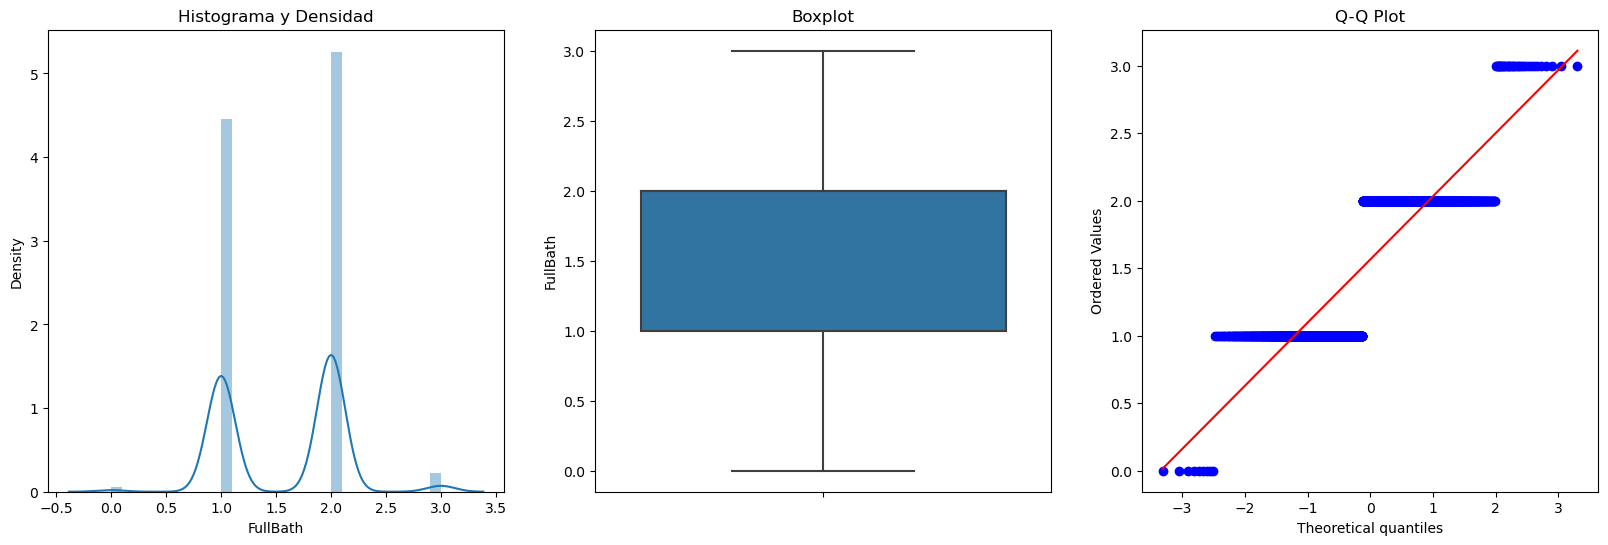

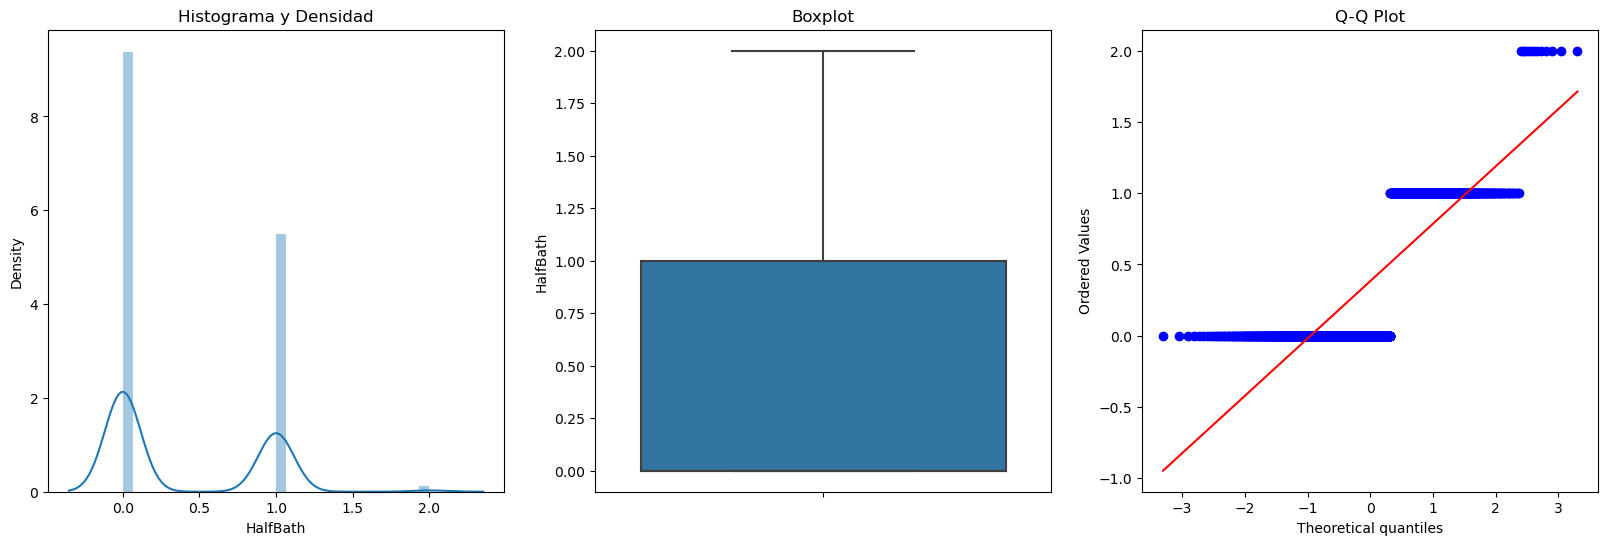

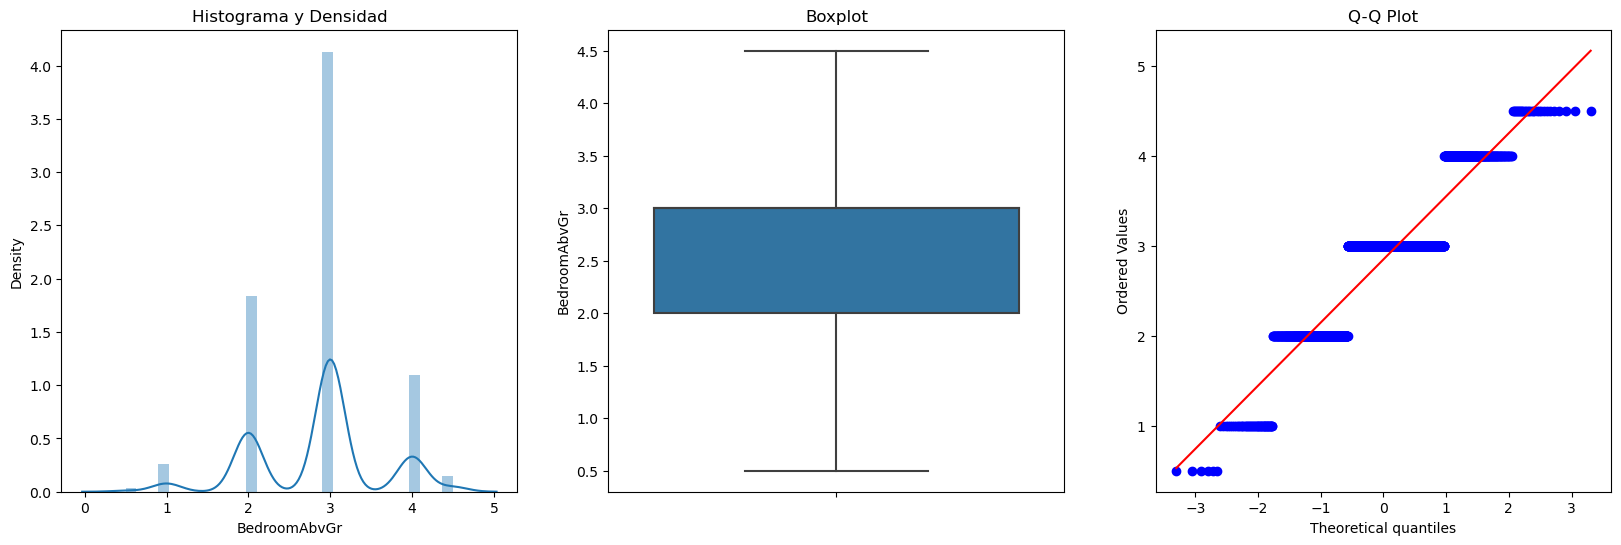

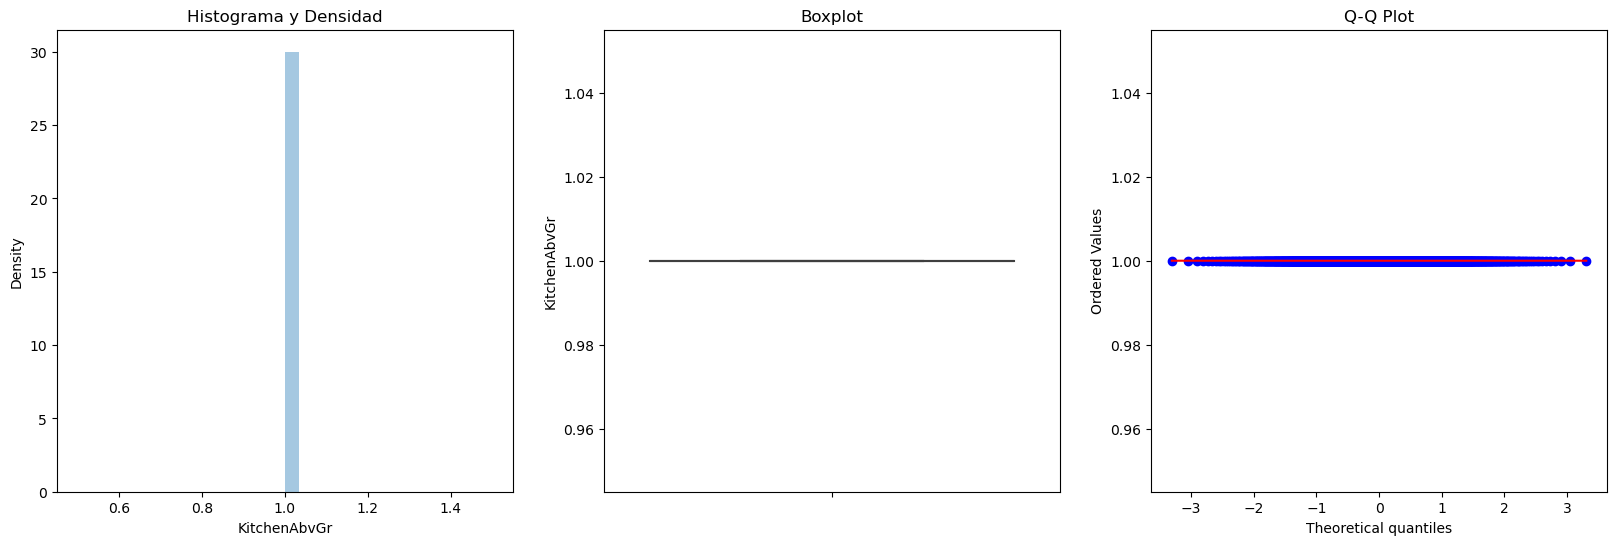

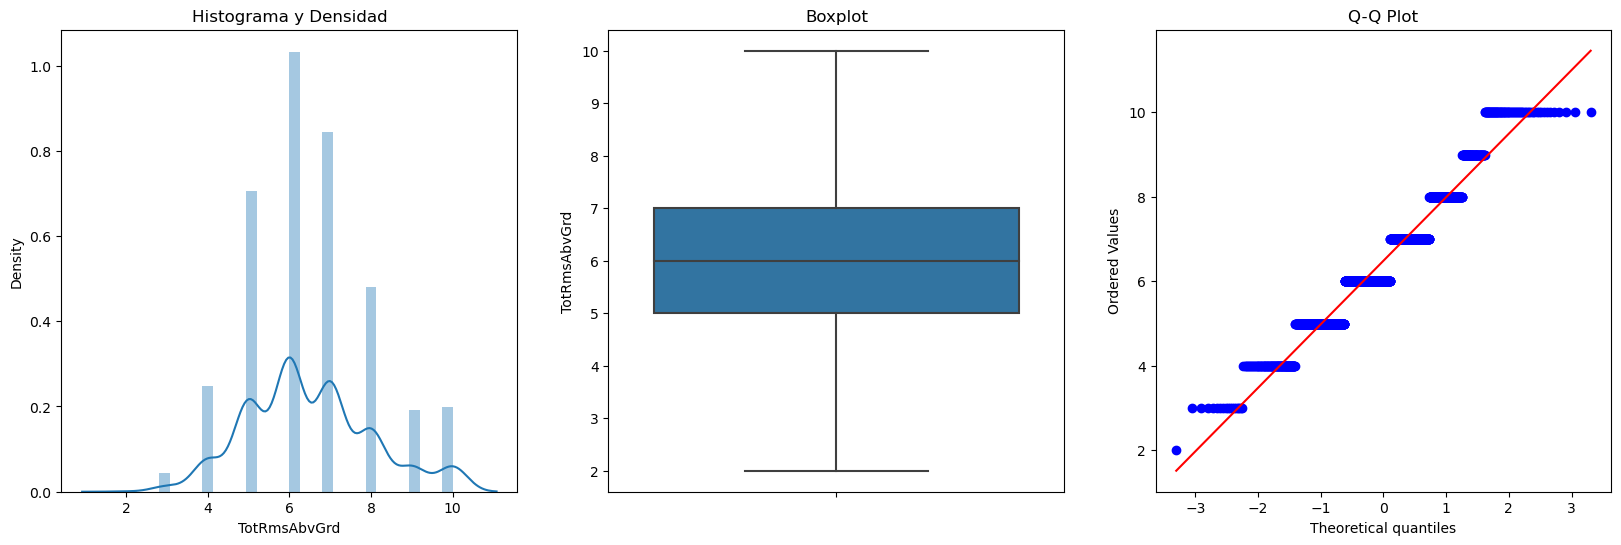

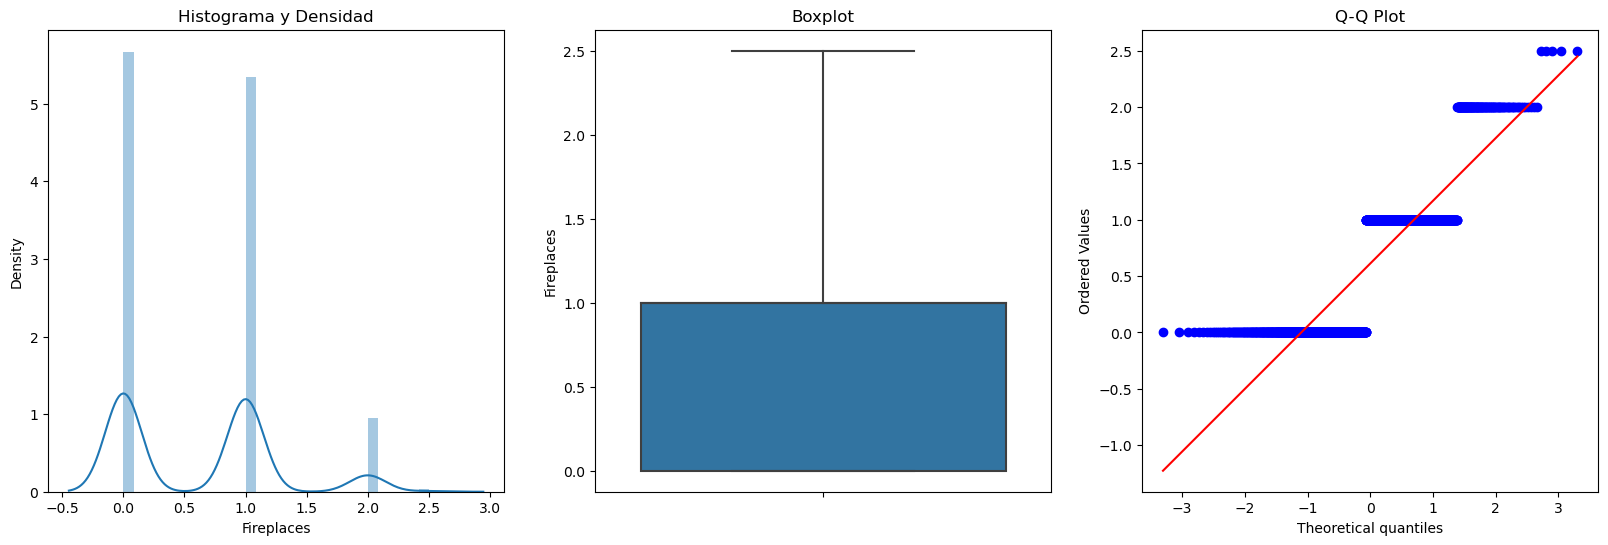

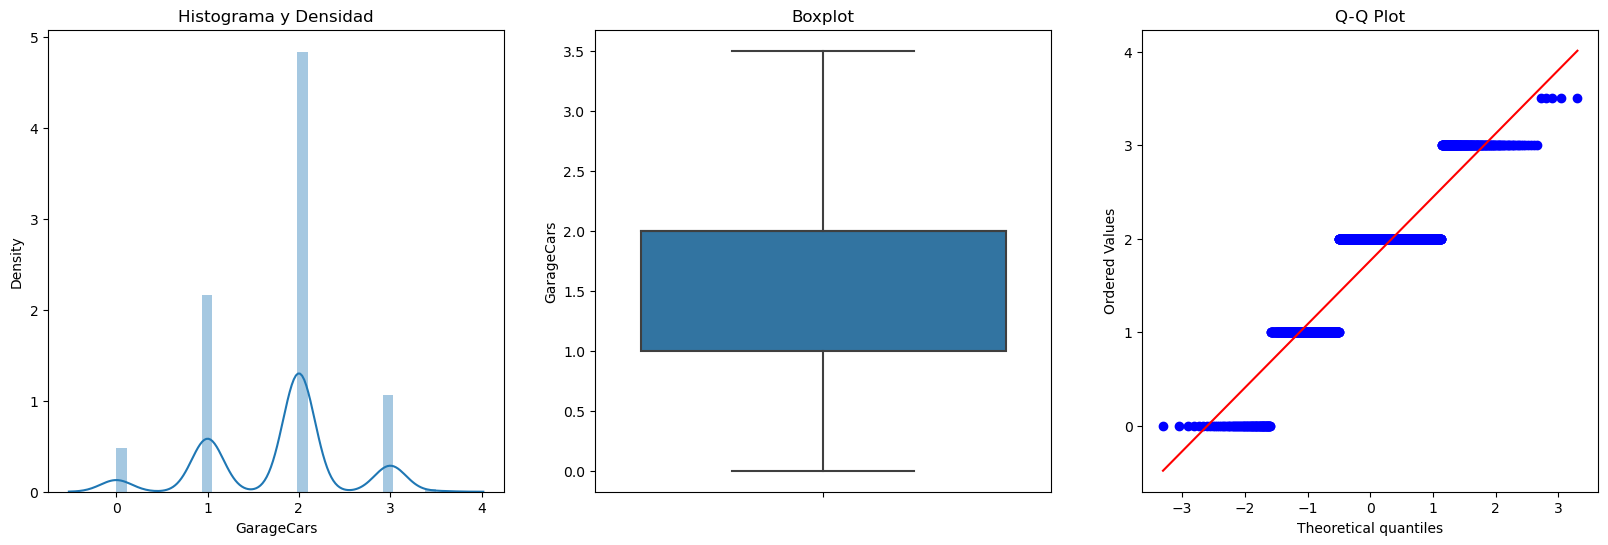

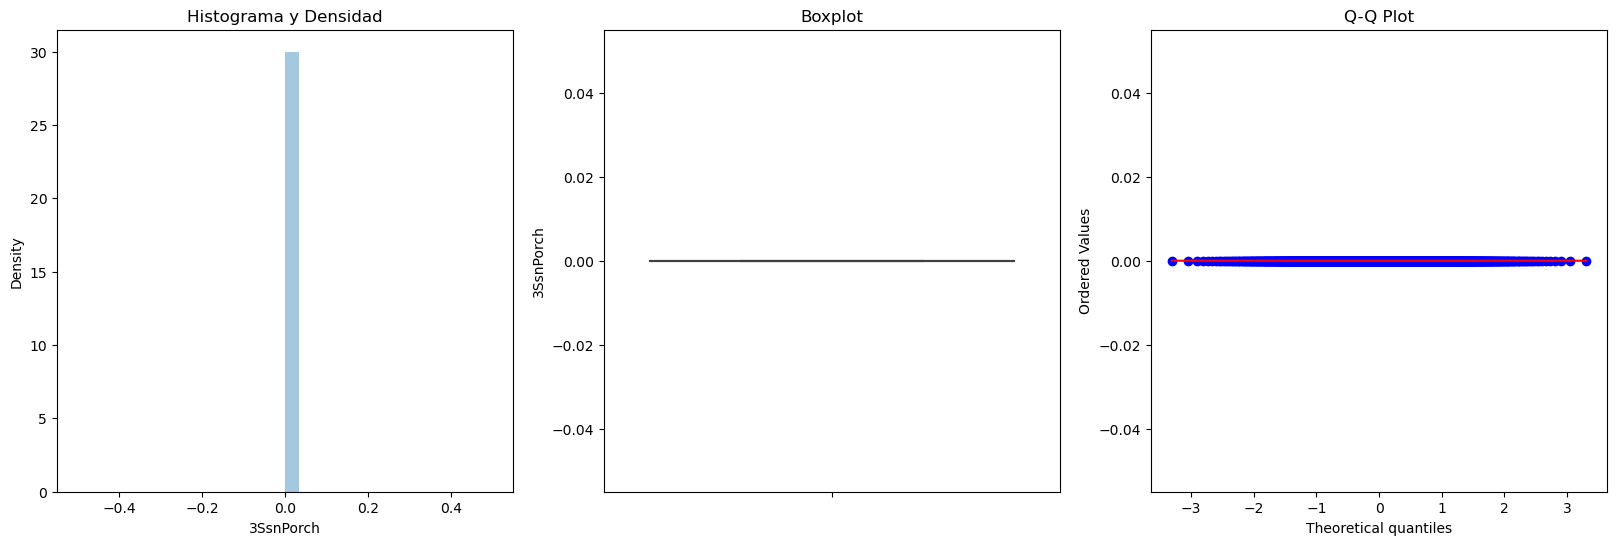

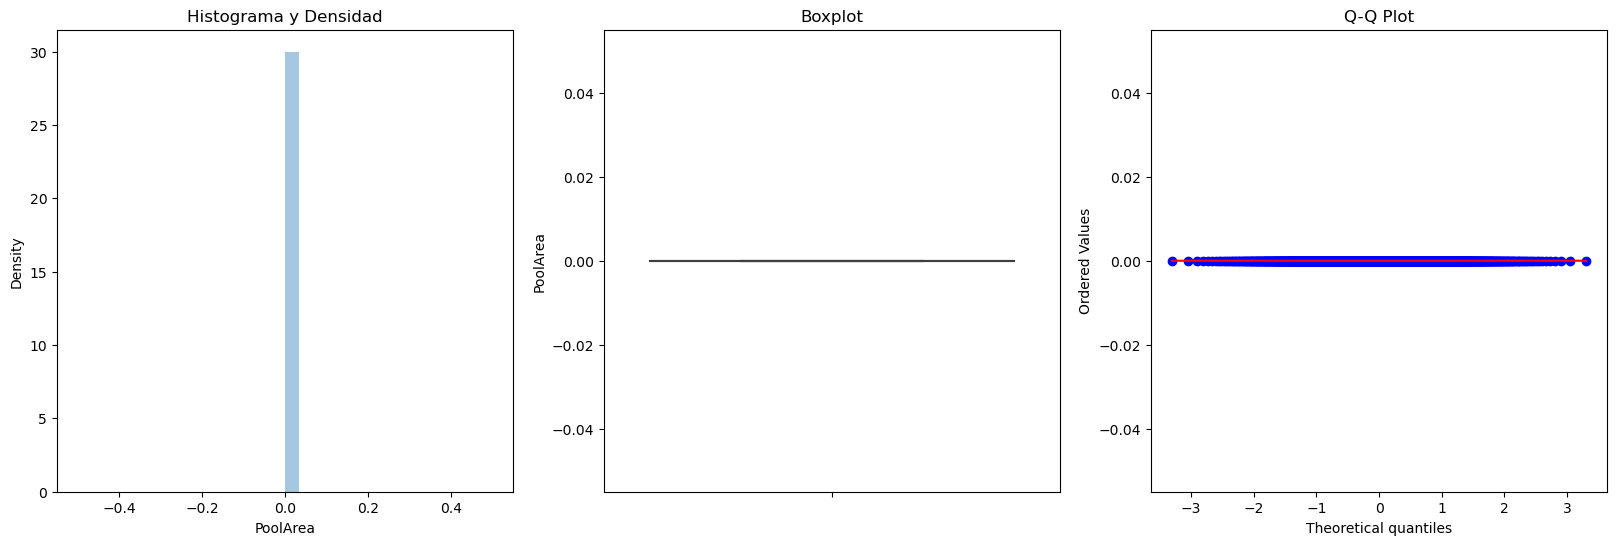

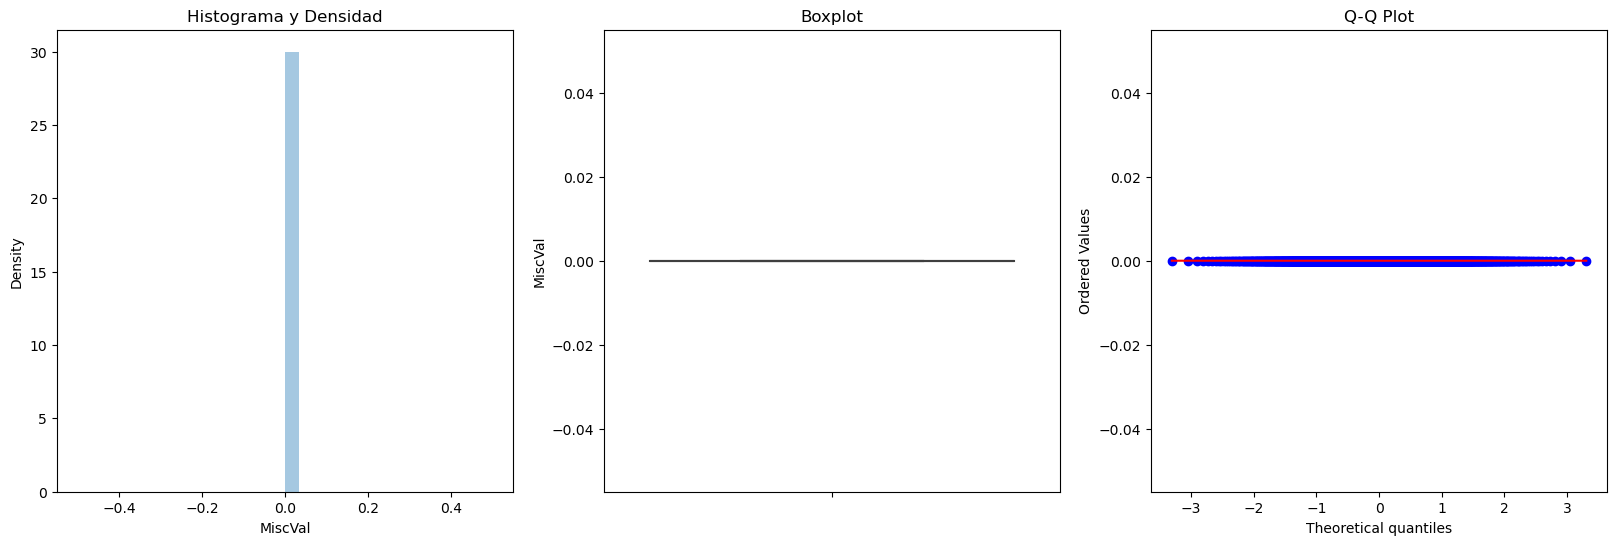

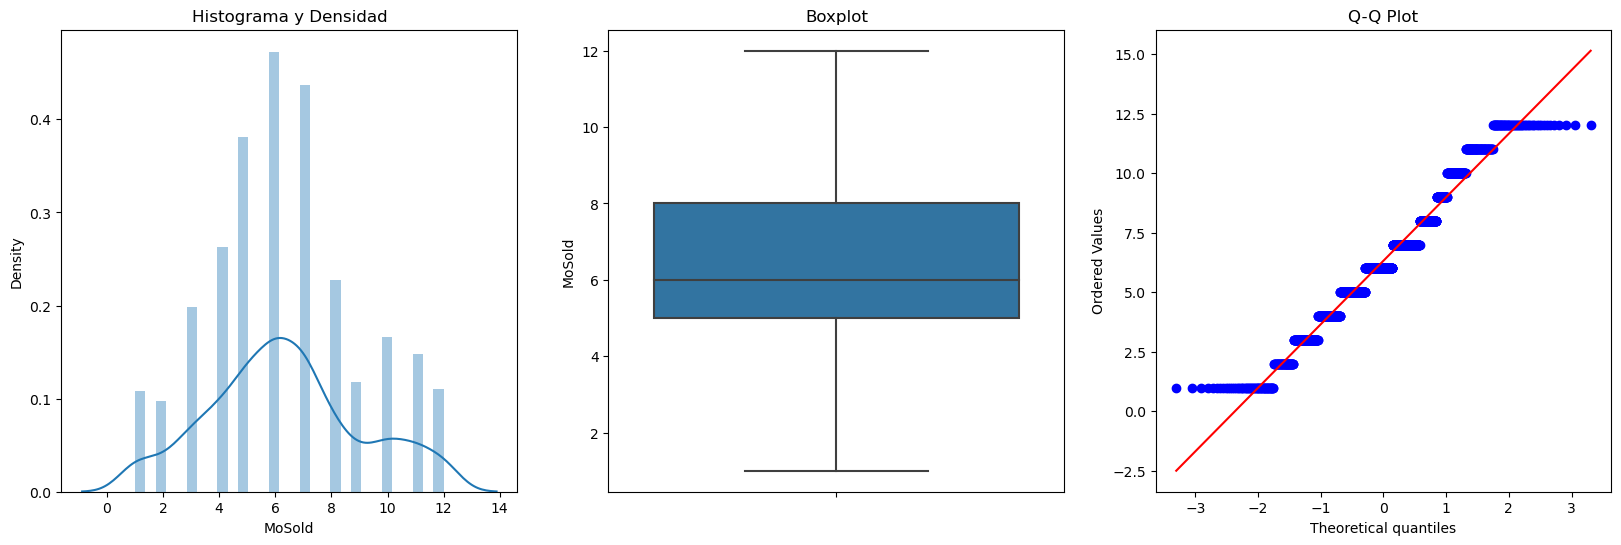

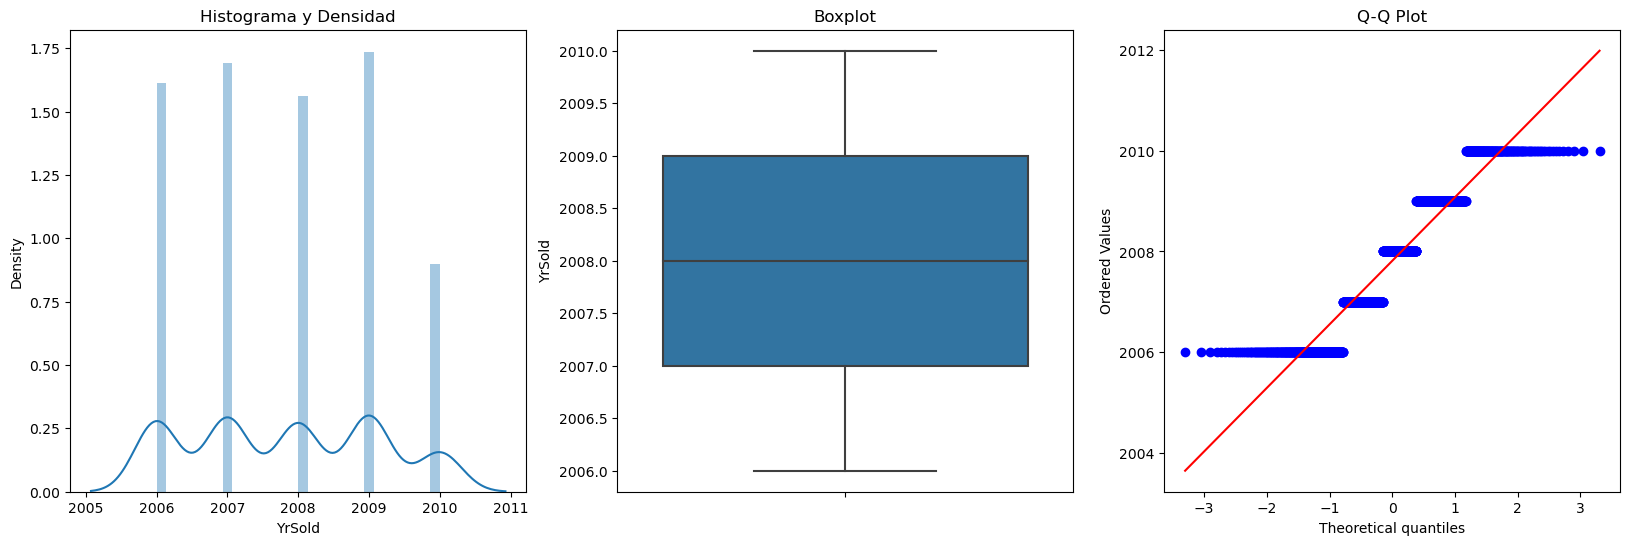

In [40]:
for col in discretas:
    print(f"-----------{col}------------")
    plotDistBoxQQ(df_limitado, col) 

### Conclusion: Debido a que las variables discretas poseen menos datos que las variables continuas. El metodo capping no hizo una gran diferencias en las columnas